In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
dftrain=pd.read_csv('train.csv')
dftrainlog=pd.read_csv('view_log.csv')
dftrainitem=pd.read_csv('item_data.csv')
dftest=pd.read_csv('test.csv')
dftrain.head(3)

,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click
0,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,87862,422,old,0,0
1,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,1
2,70efdf2ec9b086079795c442636b55fb,2018-11-15 00:02:00,71748,259,intermediate,1,0


In [3]:
print('Head of data','\n',
    dftrain.head(3),'\n',
dftrainlog.head(3),'\n',
dftrainitem.head(3))

Head of data 
                       impression_id      impression_time  user_id  app_code  \
0  c4ca4238a0b923820dcc509a6f75849b  2018-11-15 00:00:00    87862       422   
1  45c48cce2e2d7fbdea1afc51c7c6ad26  2018-11-15 00:01:00    63410       467   
2  70efdf2ec9b086079795c442636b55fb  2018-11-15 00:02:00    71748       259   

     os_version  is_4G  is_click  
0           old      0         0  
1        latest      1         1  
2  intermediate      1         0   
            server_time device_type  session_id  user_id  item_id
0  2018-10-15 08:58:00     android      112333     4557    32970
1  2018-10-15 08:58:00     android      503590    74788     7640
2  2018-10-15 08:58:00     android      573960    23628   128855 
    item_id  item_price  category_1  category_2  category_3  product_type
0    26880        4602          11          35          20          3040
1    54939        3513          12          57          85          6822
2    40383         825          17           

In [4]:
df1=(dftrain[dftrain['is_click']==1])
df123=(dftrain[dftrain['is_click']==0])
df2=df123.iloc[:12000,:]
frames=[df1,df2]
dftrain=pd.concat(frames)
dftrain.shape

(22862, 7)

In [5]:
len(df2),len(df1),len(df123)

(12000, 10862, 226747)

## Pie chart

In [6]:
def ShowPieChart(DataFrame,column1,column2):
    proportion=DataFrame.groupby(column1).count()[column2]
    col1=(((proportion)).sort_values(axis=0,ascending=False))
    total=proportion.sum()
    lstProportion=proportion/total
    col2=(((lstProportion*100)).sort_values(axis=0,ascending=False))
    plt.pie(lstProportion, autopct='%1.1f%%', shadow=False, startangle=140)
    plt.axis('equal')
    plt.show()
    dftemp=pd.DataFrame({'Total numer of rows':col1,'Ratio':col2})
    print(dftemp)

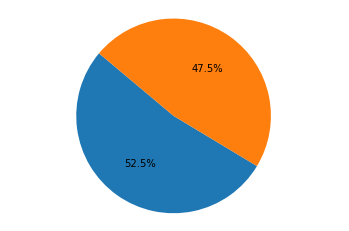

          Total numer of rows      Ratio
is_click                                
0                       12000  52.488846
1                       10862  47.511154


In [7]:
ShowPieChart(dftrain,'is_click','app_code')

In [8]:
dftrain['is_click'].value_counts()

0    12000
1    10862
Name: is_click, dtype: int64

In [9]:
# dftrain.groupby(df1).count()[df2]

## int, float to str dftrain

In [10]:
convert_dict = {'impression_id': str, 
                 'impression_time':str,
                 'user_id':str,
                 'app_code':str,
                 'os_version':str,
                 'is_4G':str,
                 'is_click':str
                }  

dftrain = dftrain.astype(convert_dict)

## int, float to str dftrainlog

In [11]:
convert_dict = {'server_time': str, 
                 'device_type':str,
                 'session_id':str,
                 'user_id':str,
                 'item_id':str
                }
dftrainlog = dftrainlog.astype(convert_dict) 

## int, float to str dftrainitem

In [12]:
convert_dict = {'item_id': str,
                 'item_price':str,
                 'category_1':int,
                 'category_2':int,
                 'category_3':int,
                 'product_type':int
                }
dftrainitem = dftrainitem.astype(convert_dict)

In [13]:
dftrainloggroup=dftrainlog.groupby('user_id')['item_id'].agg([('count', 'count'), ('item_id', ', '.join)])
dftrainloggroup.reset_index('user_id',inplace=True)
dftrainloggroup.head(3)

,user_id,count,item_id
0,0,42,"44459, 44459, 44459, 44459, 44459, 44459, 4022..."
1,1,8,"64835, 27574, 22411, 91179, 126431, 67259, 409..."
2,10,92,"88834, 8241, 59255, 82124, 98271, 26950, 11329..."


In [14]:
dftrainMerged=pd.merge(dftrain,dftrainloggroup[['user_id','count','item_id']],on='user_id',how='left')
dftrainMerged.shape
dftrainMerged.head(4)

,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click,count,item_id
0,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,1,12,"43209, 66370, 43209, 43209, 71877, 43209, 4320..."
1,43ec517d68b6edd3015b3edc9a11367b,2018-11-15 00:06:00,74339,481,old,0,1,61,"100847, 117590, 6131, 78766, 129770, 13924, 11..."
2,42998cf32d552343bc8e460416382dca,2018-11-15 00:42:00,81926,249,latest,0,1,138,"84085, 44104, 18653, 44104, 131433, 4907, 7615..."
3,a9a1d5317a33ae8cef33961c34144f84,2018-11-15 00:57:00,8779,242,latest,1,1,29,"49782, 49782, 45958, 90576, 90576, 107829, 991..."


In [15]:
dftrainMerged['device_type']=dftrainlog['device_type']

In [16]:
dftrainMerged.tail(3)

,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click,count,item_id,device_type
22859,d24e41365a27a6ce4c4b46a5b539f5cb,2018-11-17 20:17:00,38757,5,latest,0,0,70,"91322, 16164, 91322, 91322, 120027, 3500, 1200...",android
22860,5fd28676525f025716fa72429d241209,2018-11-17 20:18:00,84447,250,latest,0,0,6,"38513, 76717, 10517, 10517, 44090, 83521",android
22861,1ae241081fe825621550691f56fe0963,2018-11-17 20:18:00,3480,386,latest,0,0,12,"38513, 38513, 38513, 38513, 38513, 38513, 3851...",android


In [17]:
dftrainMerged.isnull().sum()

impression_id      0
impression_time    0
user_id            0
app_code           0
os_version         0
is_4G              0
is_click           0
count              0
item_id            0
device_type        0
dtype: int64

In [18]:
dftrainMerged=pd.get_dummies(dftrainMerged,columns=['os_version','device_type'])

In [19]:
# new=dftrain['impression_time'].str.split(' ',1,expand=True)
# dftrainMerged['impression_date']=new[0]
# dftrainMerged['impression_time']=new[1]

In [20]:
dftrainMerged=dftrainMerged.rename(columns={'count':'count_item_id'})

In [21]:
dftrainMerged.reindex(sorted(dftrainMerged.columns),axis=1)

,app_code,count_item_id,device_type_android,device_type_iphone,impression_id,impression_time,is_4G,is_click,item_id,os_version_intermediate,os_version_latest,os_version_old,user_id
0,467,12,1,0,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,1,1,"43209, 66370, 43209, 43209, 71877, 43209, 4320...",0,1,0,63410
1,481,61,1,0,43ec517d68b6edd3015b3edc9a11367b,2018-11-15 00:06:00,0,1,"100847, 117590, 6131, 78766, 129770, 13924, 11...",0,0,1,74339
2,249,138,1,0,42998cf32d552343bc8e460416382dca,2018-11-15 00:42:00,0,1,"84085, 44104, 18653, 44104, 131433, 4907, 7615...",0,1,0,81926
3,242,29,1,0,a9a1d5317a33ae8cef33961c34144f84,2018-11-15 00:57:00,1,1,"49782, 49782, 45958, 90576, 90576, 107829, 991...",0,1,0,8779
4,469,72,1,0,5d44ee6f2c3f71b73125876103c8f6c4,2018-11-15 01:02:00,0,1,"38513, 106276, 131415, 116369, 108129, 41909, ...",1,0,0,8636
5,5,61,1,0,1595af6435015c77a7149e92a551338e,2018-11-15 01:11:00,1,1,"77918, 74902, 129279, 99116, 22134, 87519, 875...",0,0,1,13375
6,244,284,1,0,5705e1164a8394aace6018e27d20d237,2018-11-15 02:02:00,0,1,"42413, 9287, 9287, 610, 110411, 14563, 69544, ...",1,0,0,52485
7,244,18,1,0,36a16a2505369e0c922b6ea7a23a56d2,2018-11-15 03:13:00,1,1,"60296, 76404, 76404, 89563, 119030, 48662, 215...",0,1,0,24824
8,151,53,1,0,38ca89564b2259401518960f7a06f94b,2018-11-15 04:02:00,1,1,"33633, 33633, 127900, 12208, 176, 22664, 84482...",0,0,1,82558
9,242,9,1,0,7501e5d4da87ac39d782741cd794002d,2018-11-15 04:30:00,1,1,"89560, 89560, 89560, 119516, 3178, 118262, 333...",0,1,0,56586


In [22]:
def getPriceItem(items):
    print(items)
    item_prices=[]
    exception_item=[]
    for item in items:
        try:
            price=int(dftrainitem[dftrainitem['item_id'] == item]['item_price'])
            item_prices.append(price)
        except:
            item_prices.append(0)
            print("Exception occured at ",item)
            exception_item.append(item)
            continue
    print('item_prices',item_prices)
    avg=np.mean(item_prices)
    minimum=min(item_prices)
    print('minimum',minimum)
    maximum=max(item_prices)
    return avg,minimum,maximum

In [23]:
dftrainMerged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22862 entries, 0 to 22861
Data columns (total 13 columns):
impression_id              22862 non-null object
impression_time            22862 non-null object
user_id                    22862 non-null object
app_code                   22862 non-null object
is_4G                      22862 non-null object
is_click                   22862 non-null object
count_item_id              22862 non-null int64
item_id                    22862 non-null object
os_version_intermediate    22862 non-null uint8
os_version_latest          22862 non-null uint8
os_version_old             22862 non-null uint8
device_type_android        22862 non-null uint8
device_type_iphone         22862 non-null uint8
dtypes: int64(1), object(7), uint8(5)
memory usage: 1.7+ MB


In [24]:
dftrainMerged

,impression_id,impression_time,user_id,app_code,is_4G,is_click,count_item_id,item_id,os_version_intermediate,os_version_latest,os_version_old,device_type_android,device_type_iphone
0,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,1,1,12,"43209, 66370, 43209, 43209, 71877, 43209, 4320...",0,1,0,1,0
1,43ec517d68b6edd3015b3edc9a11367b,2018-11-15 00:06:00,74339,481,0,1,61,"100847, 117590, 6131, 78766, 129770, 13924, 11...",0,0,1,1,0
2,42998cf32d552343bc8e460416382dca,2018-11-15 00:42:00,81926,249,0,1,138,"84085, 44104, 18653, 44104, 131433, 4907, 7615...",0,1,0,1,0
3,a9a1d5317a33ae8cef33961c34144f84,2018-11-15 00:57:00,8779,242,1,1,29,"49782, 49782, 45958, 90576, 90576, 107829, 991...",0,1,0,1,0
4,5d44ee6f2c3f71b73125876103c8f6c4,2018-11-15 01:02:00,8636,469,0,1,72,"38513, 106276, 131415, 116369, 108129, 41909, ...",1,0,0,1,0
5,1595af6435015c77a7149e92a551338e,2018-11-15 01:11:00,13375,5,1,1,61,"77918, 74902, 129279, 99116, 22134, 87519, 875...",0,0,1,1,0
6,5705e1164a8394aace6018e27d20d237,2018-11-15 02:02:00,52485,244,0,1,284,"42413, 9287, 9287, 610, 110411, 14563, 69544, ...",1,0,0,1,0
7,36a16a2505369e0c922b6ea7a23a56d2,2018-11-15 03:13:00,24824,244,1,1,18,"60296, 76404, 76404, 89563, 119030, 48662, 215...",0,1,0,1,0
8,38ca89564b2259401518960f7a06f94b,2018-11-15 04:02:00,82558,151,1,1,53,"33633, 33633, 127900, 12208, 176, 22664, 84482...",0,0,1,1,0
9,7501e5d4da87ac39d782741cd794002d,2018-11-15 04:30:00,56586,242,1,1,9,"89560, 89560, 89560, 119516, 3178, 118262, 333...",0,1,0,1,0


In [25]:
dftrainMerged.to_csv('merged_without_list_compilation.csv')

In [ ]:
lstavg=[]
lstminimum=[]
lstmaximum=[]
counter=0
for index,rows in dftrainMerged.iloc[:,:].iterrows():
    arrSplit=rows['item_id'].split(',')
    items=[str(i.strip()) for i in arrSplit]
    avg,minimum,maximum=getPriceItem(items)
    lstavg.append(avg)
    lstminimum.append(minimum)
    lstmaximum.append(maximum)
    print(counter)
    counter+=1

['43209', '66370', '43209', '43209', '71877', '43209', '43209', '97274', '109074', '58018', '109074', '22064']
item_prices [3421, 14166, 3421, 3421, 3961, 3421, 3421, 2630, 6330, 1888, 6330, 1024]
minimum 1024
0
['100847', '117590', '6131', '78766', '129770', '13924', '115366', '129770', '71838', '16770', '30766', '107155', '26058', '88228', '81804', '5408', '50736', '18398', '7160', '67420', '66811', '25208', '25208', '99522', '18398', '37822', '25208', '25208', '96431', '79371', '68240', '118269', '22623', '46626', '68481', '86831', '41279', '119491', '99522', '110399', '132568', '68979', '76664', '26058', '83107', '89981', '100880', '63307', '14216', '89981', '109202', '76989', '26572', '54546', '86831', '14474', '107958', '7196', '81606', '56512', '25897']
item_prices [2496, 5990, 6998, 4544, 4467, 7616, 2572, 4467, 377, 2060, 778, 12549, 3526, 3078, 14284, 2720, 1280, 18240, 992, 5289, 1216, 1536, 1536, 10854, 18240, 11456, 1536, 1536, 6336, 3136, 10081, 2739, 127840, 953, 6272, 8

item_prices [4096, 1216, 1216, 34, 127360, 83200, 9280, 39660, 1009, 3648, 535, 13248, 17897, 2681, 569, 13824, 4147, 1587, 1272, 13824, 5360, 5360, 8019, 1401, 4020, 6912, 4928, 1843, 1123, 2496, 1123, 14176, 440, 832, 440, 7680, 832, 1459, 2553, 4480, 4416, 1408, 6854, 2873, 3827, 27283, 2432, 352, 3542, 4480, 1681, 4480, 83200, 83200, 36723, 6854, 18816, 83200, 3187, 11260, 4787, 3187, 83200, 627, 3187, 13036, 14656, 364, 9728, 7680, 560, 26009, 6912, 2547, 793, 564, 1946, 505, 2419, 2298, 2298, 6336, 2176, 1145, 2361, 1837, 832, 1401, 14848, 3059, 2227, 1670, 3315, 7174, 6969, 1653, 179, 2688, 2419, 1653, 10227, 633, 179, 28096, 3443, 6227, 2355, 2128, 5440, 480, 352, 1408, 12672, 123520, 10816, 3840, 627, 10816, 1664, 947, 1781, 1781, 1781, 8924, 1781, 2128, 2688, 947, 10816, 5690, 633, 5690, 1657, 5690, 1781, 6145, 6145, 6145, 2073, 6145, 627, 179, 1781, 2688, 5690, 6145, 6145, 1781, 1837, 697, 704, 4026, 1731, 5113, 15155, 1566, 14080, 1529, 2112, 2586, 249, 1529, 1529, 1529, 33

item_prices [3052, 9536, 4025, 377, 2297, 2297, 377, 4025, 3052, 10752, 10752, 10752, 10752, 10752, 249, 10752, 13184, 13184, 13184, 249, 3052, 3052, 10752, 2297, 13184, 13184, 10752, 10752, 3052, 10752, 10752, 1856, 10752, 1856, 3052, 13184, 10752, 10752, 13184, 10752, 249, 1856, 10752, 13184, 10752, 13184, 13184, 10752, 10752, 13184, 10752, 13184, 10752, 4025, 10752, 10752, 13184, 38553, 13184, 10752, 3052, 10752, 3052, 13184, 10752, 13184, 377, 10752, 3052, 11456, 11456, 67372, 10752, 3052, 3283, 10752, 4025, 4025, 10752, 3052, 10752, 24128, 24128, 24128, 24128, 1600, 1600, 1600, 1600, 1600, 1600, 1600, 1600, 13120, 1600, 1600, 1600, 1600, 13184, 1600, 1600, 1600, 3763, 3225, 1600, 3225, 3225, 13001, 3225, 3225, 13001, 3225, 13001, 3225, 3225, 3225, 3225, 140800, 13001, 1600, 1600, 1600, 1600, 3225, 1600, 10752, 3225, 1913, 569, 569, 1600, 3225, 3225, 3763, 3763, 1600, 13001, 1529, 3225, 1459, 13001, 2227, 2116, 1033, 1465, 968]
minimum 249
19
['74618', '30399', '33074', '65448', '7

item_prices [59644, 16512, 4416, 1094, 800, 1216, 5056, 3833, 3840, 947, 10112, 12037, 5920, 10112, 3600, 11072, 12037, 51136, 9561, 2528, 2522, 14176, 40896, 2822, 1248, 11520, 1792, 2822, 1248, 3840, 48000, 1792, 2822, 61430, 1792, 48000, 2099, 1267, 2822, 1792, 2822, 544, 2695]
minimum 544
28
['68615', '33074', '10696', '10696', '99270', '33748', '49723', '73025', '96363', '75754', '73025', '118458', '98110', '81757', '98110', '84704', '105923', '110399', '60507', '110399', '110374']
item_prices [1606, 673, 1248, 1248, 1856, 7562, 691, 633, 82, 1036, 633, 35020, 5107, 48512, 5107, 3833, 1781, 9216, 845, 9216, 42880]
minimum 82
29
['33506', '33506', '33506', '52683', '85108']
item_prices [3176, 3176, 3176, 4602, 19712]
minimum 3176
30
['60507', '60507', '96835', '96835', '49443', '49443', '3113', '3113', '90050', '90050', '44465', '44465', '119516', '119516', '119516', '119516', '103537', '103537', '48661', '120024', '120024', '48661', '119516', '119516', '3295', '3295']
item_prices 

item_prices [192, 2419, 4416, 4416, 4308, 20416, 35392, 8463, 1081, 9856, 1920, 5696, 1920, 1209, 5324, 1024, 1408, 63744, 35020, 35020, 8960, 35020, 10608, 35020, 9536, 18630, 505, 8649, 512, 2455, 4933, 1198, 2304, 1702, 6310, 16576, 6384, 339, 3859, 11251, 5113, 9536, 2995, 384, 6419, 25390, 921, 3061, 2822, 512, 73113, 4416, 3833, 3456, 12105, 2304, 2304, 11392, 192, 518, 2298, 416, 5184]
minimum 192
37
['2329', '100847', '59592', '82316', '77340', '77340', '17251', '17251', '24216', '77340', '71978', '73404', '73404', '73404', '45962', '45962', '99777', '71978', '60336', '60336', '60336', '60336', '60336', '60336', '60336', '59592', '73404', '73404', '73404', '73404', '73404', '73404', '73404', '115644', '73404', '73404', '73404', '77326', '77326', '60336', '77326', '63293', '41188', '132853', '119516', '117704', '37011', '41188', '77326', '72955', '77326', '102223', '41188', '76674', '77340', '72955', '77340', '41188', '77340', '77340', '106025', '2329', '110407', '2329', '9554',

item_prices [1081, 1081, 633, 633, 1081, 3328, 4409, 42880, 3360, 2547, 12348, 1081, 723, 640, 640, 633, 1274, 4736, 1075, 2496, 1024, 42880, 42880, 44499, 133120, 3225, 2336, 2336, 2336, 2336, 42880, 13547, 5440, 13547, 768, 42880, 42880, 2227, 8640, 832, 1307, 1892, 1307, 832, 1166, 1307, 10496, 1433, 2050, 947, 1267, 947, 2050, 8256, 1779, 29440, 1351, 1081, 8920, 1779, 2304, 3827, 768, 957, 957, 2275, 768, 3225, 1081, 2297, 768, 1779, 8960, 1555, 1337, 1555, 1555, 1337, 1576, 53760, 1792, 2297, 1337, 1337, 1555, 1898, 1555, 3444, 13872, 13872, 396, 9683, 4595, 9683, 9683, 13872, 9683, 9683, 3225, 13001, 3225, 3827, 2592, 3827, 3827, 2292, 3827, 9683, 3827, 2873, 9683, 2624, 13872, 13872, 2873, 2873, 4346, 3360, 2336, 2298, 2873, 4736, 800, 1075, 1075, 3579, 2873, 2873, 2873, 2873, 3579, 2873, 2873, 2873, 2873, 2873, 3444, 3444, 2873, 3520, 2592, 3520, 3449, 3449, 3520, 1774, 1856, 1593, 787, 787, 1367, 6336, 2062, 4416, 947, 6272, 2592, 1504, 1081, 10176, 1504, 2592, 1856, 2592, 10

item_prices [783, 672, 672, 768, 768, 768, 768, 672, 1061, 783, 12160, 783, 2368, 13680, 1913, 1913, 93440, 2419, 2361, 3072, 10758, 1856, 10758, 10758, 1049, 2528]
minimum 672
47
['85162', '9209', '85162', '40812', '127408', '84085', '821', '1528', '118262', '124676', '821', '71406', '60773']
item_prices [737, 115200, 737, 1881, 2828, 14656, 4192, 7320, 2067, 960, 4192, 2585, 32771]
minimum 737
48
['64246', '120829', '42173', '17197', '31186', '46813', '31186', '44443', '32749', '21324', '66583', '108533', '15757', '75146', '96869', '55153', '21813', '108427', '115217', '96869', '115386', '65545', '94609', '84085', '30951', '101198', '122236', '122236', '122236', '40383', '40383', '69568', '69568', '69568', '69568', '69568', '69568', '69568', '95623', '102934', '47647', '96869', '94609', '25197', '96869', '46175', '74035', '23356', '84085', '71459', '11161', '71459', '65439', '11161', '15784', '13155', '42173', '64241', '86814', '52280', '52226', '29704', '29704', '110449', '110449', 

item_prices [64000, 1856, 1856, 1856, 1856, 1856, 1856, 91520, 1856, 8192, 1856, 2355, 4108, 2944, 31078, 627, 62400, 28096, 1856, 62400, 28096, 9728, 1342, 1831, 62400, 31078, 535]
minimum 535
53
['127045', '113175', '120286', '120286', '120286', '120286', '120286', '120286', '120286', '108990', '66861', '80461', '59086', '53091', '46179', '29945', '86574', '56797', '86574', '46179', '29945', '86574', '111240', '111584', '44523', '131641', '49463', '37605', '36598', '95004', '38922', '104543', '104543']
item_prices [21696, 8524, 1984, 1984, 1984, 1984, 1984, 1984, 1984, 3744, 1900, 1920, 72960, 29952, 1859, 15043, 5753, 2122, 5753, 1859, 15043, 5753, 5832, 8256, 1017, 19942, 1459, 6203, 1145, 3776, 15360, 2169, 2169]
minimum 1017
54
['114521', '114521', '110337', '776', '93591', '31143', '33633', '38231', '44826']
item_prices [10264, 10264, 737, 19417, 5913, 54681, 2092, 1977, 2073]
minimum 737
55
['93170', '120405', '57819', '49461', '112966', '76404', '54546', '88587', '3500', '4553

item_prices [301, 633, 5354, 8256, 2465, 2534, 3144, 1624, 2534, 19776, 1600, 4608, 1152, 6553, 1587, 345, 345, 1895, 2937, 1895, 2937, 1895, 2701, 2937, 1895, 1120, 2937, 2995, 2937, 2937, 2701, 2937, 4576, 4576, 2067, 4576, 54681, 2545, 1465, 1465, 2944, 59456, 2944, 2944, 59456, 2944, 2944, 4346, 1024, 4346, 4346, 1465, 1152, 1152, 2937, 2448, 5984, 587, 4550, 10816, 1837, 13765, 6142, 2027]
minimum 301
72
['6934', '33633']
item_prices [1344, 2092]
minimum 1344
73
['93266', '81876', '70472', '70472', '93266', '113155', '79975', '113155', '32246', '82763', '79225', '89727', '107311']
item_prices [57536, 6528, 1504, 1504, 57536, 1043, 2412, 1043, 6336, 3840, 301, 425, 43200]
minimum 301
74
['30048', '30048', '42799', '31702', '98816', '34337', '123971', '56503', '7773', '37932', '114223', '31702', '34337', '62904', '56503', '97317', '123971', '98816', '90195', '93001', '37932', '90195', '37932', '90195', '118996', '37932', '24216', '24216', '30048', '65969', '59433', '30048', '65969',

item_prices [53760, 4012, 24960, 21056, 2177, 5178, 8755, 8601, 8601, 8601, 3398, 8755, 8755, 3398, 633, 192, 3136, 8601, 10275, 2240, 192, 6912, 870, 448, 1740, 4147, 7360, 1536, 904, 6873, 1296, 1568, 2304, 1344, 1837, 2496, 11456, 8755, 870, 2388, 4147, 27239, 128, 1568, 1568, 2496, 2496, 1536, 1536, 31360, 2304, 204160, 204160, 1568, 204160, 10816, 2016, 2598, 4147, 2598, 1523, 2304, 3136, 2880, 1568, 23200, 913, 2304, 6336, 633, 633, 1376, 633, 633, 2547, 710, 5728, 1088, 7616, 12480, 892, 5760, 4550, 1203, 892, 6016, 1779, 1657, 633, 633, 633, 5760, 633, 633, 633, 3712, 1240, 16960, 1376, 633, 19094, 1344, 11456, 10297, 2240, 38656, 864, 2112, 5728, 5728, 633, 633, 633, 633, 633, 633, 633, 633, 304000, 892, 892, 12480, 892, 12480, 1756, 22464, 22464, 22464, 22464, 806, 673, 160, 928, 38656, 2331, 2931, 38656, 1606, 3136, 819, 2931, 38656, 819, 38656, 967, 1606, 38656, 1261, 441, 73113, 2547, 2547, 1184, 13766, 5702, 1939, 10944, 3974, 1024, 774, 673, 673, 21203, 2730, 282, 633, 3

item_prices [2810, 1601, 1601, 1601, 1088, 1670, 3116, 2382, 359, 2382, 18240, 5324, 18880, 18439, 18880, 18880, 18880, 10128]
minimum 359
91
['1525', '64220', '4642', '68968', '13260', '68968', '44029', '51651', '78371', '126140', '78389', '111015', '119368', '78389', '126140', '110363', '15757', '84704', '81213', '81213', '117507', '81213', '112881', '10576', '120829', '40523', '68968', '68968', '13260', '68968', '68968', '112881', '42173', '88133', '42173', '88133', '2715', '2715', '104035', '84704', '126885', '70370', '120829', '126885', '48456', '24920', '33633', '13889', '701', '84872', '125501', '122965', '125501', '76224', '11871', '76224', '76224', '13889', '34443', '94121', '3359', '14236', '3359', '76224', '13889', '3359', '3359']
item_prices [2553, 1077, 4435, 3225, 13001, 3225, 224000, 1203, 6336, 10803, 2419, 1440, 4366, 2419, 10803, 2586, 4346, 3833, 140800, 140800, 3450, 140800, 12160, 2665, 3264, 3641, 3225, 3225, 13001, 3225, 3225, 12160, 1728, 384, 1728, 384, 1601, 1

item_prices [6688, 1238, 768, 1728, 6656, 1728, 1587, 2067, 15052, 10624, 13184, 2528, 844, 10624, 1587, 2489, 2969, 1238, 1728, 14656, 14656, 4672, 2874]
minimum 768
101
['27574', '48214', '106866', '27574', '27574', '27574', '90997', '1447', '17814', '89373', '17159', '43279', '17159', '43279', '117244', '11437', '34119', '113074', '43979', '255', '17159', '89373', '43279', '33562', '3570', '104225', '36501', '17159', '17159']
item_prices [1145, 13980, 416, 1145, 1145, 1145, 2099, 17792, 505, 2496, 10432, 2246, 10432, 2246, 3193, 564, 4460, 2867, 1267, 3808, 10432, 2496, 2246, 864, 2233, 1856, 774, 10432, 10432]
minimum 416
102
['114478', '40691', '114478', '114750', '53780', '72711', '72711', '72711', '53780', '53780', '45931']
item_prices [691, 757, 691, 1139, 2419, 5248, 5248, 5248, 2419, 2419, 8256]
minimum 691
103
['23356', '68614', '72619', '15028', '88368', '1741', '119695', '119695', '122397', '122397', '51839', '51839', '51839', '37359', '69585', '8860', '99538', '33842', '1

item_prices [301, 2701, 8960, 2701, 24640, 845, 1025, 1049, 1049, 1049, 24896, 24896, 1049, 716, 2496]
minimum 301
115
['75146', '112124', '82903', '123005', '3836', '120806', '87872', '67175', '83617', '101160', '101160', '40651', '31659', '63844', '114173', '94423', '82916', '82004', '113226', '21519', '53003', '2485', '36058', '111476', '34453', '14997', '56555', '94423', '34453', '115107', '93053', '19899', '130772', '74529', '130072', '5550', '54863', '99609', '124848', '98373', '111620', '54863', '104644', '2485', '114173', '94423', '69406', '69406', '42143', '69089', '78585', '2485', '69406', '2485', '92013', '34453', '25595', '61810', '14997', '105928', '130456', '82004', '61810', '24635', '39848', '53357', '121532', '56555', '49306', '14997', '36039', '29482', '42490']
item_prices [207, 2680, 2720, 1600, 2400, 12032, 1031, 12096, 672, 50560, 50560, 633, 10246, 2342, 131328, 1920, 1224, 505, 19056, 14035, 92160, 2136, 224, 4416, 1945, 1849, 5510, 1920, 1945, 23104, 5760, 25376,

item_prices [7833, 1025, 627, 953, 6080, 1139, 21651, 3840, 12096, 15142, 12096, 4354, 2560, 3840, 1913, 1913, 178688, 3840, 4354, 1884, 3635, 2016, 3513, 52224, 3200, 2645, 178688, 441, 3641, 17936, 806, 11697, 8192, 38208, 2092]
minimum 441
123
['28621', '28621', '90904', '28621', '49723', '5754', '5754', '129770', '28621', '49723', '44465', '58020', '99789', '52562', '33074', '60603', '41294', '76840', '34687', '44788', '125338', '90125', '115714', '77340', '77340', '126697', '48248', '17268', '9714', '76156', '60603', '117090', '22047', '24039', '14219', '24039', '99010', '99010', '24039', '107282', '53195', '126580', '53250', '71139', '40608', '79225', '109202', '32222', '72684', '108596', '32222', '10115', '110337', '89232', '92576', '103097', '21060', '42209', '32222']
item_prices [5248, 5248, 91301, 5248, 691, 20800, 20800, 4467, 5248, 691, 24192, 320, 2643, 38067, 673, 5228, 4588, 619, 1653, 28211, 8640, 3686, 4224, 408, 408, 3477, 366, 4352, 16512, 627, 5228, 9683, 5056, 6758

item_prices [26201, 15838, 26201, 4601, 5702, 2483, 449, 63744, 11200, 5702, 2707, 2489, 2707, 24064, 17856, 35379, 6976, 2371, 5824, 95360, 2707, 947, 832, 1843, 69568, 41472, 8256, 83136, 97280, 2165, 17510, 928, 35200, 3176, 6256, 633, 2041, 1451, 8256, 8920, 21219, 12928, 86400, 6912, 23616, 9536, 4044, 24064, 2707, 825, 126891, 1313, 2707, 1451, 1203, 8242, 774, 2665, 4467, 4467, 7843, 64204, 2560, 3717, 2149, 160, 37056, 7712, 64204, 8242, 1139, 2419, 2419]
minimum 160
130
['12328', '112130', '33864', '33864', '113504', '80423', '3836', '123005', '68332', '27646', '27646', '781', '104074', '40207', '12467', '40917', '94817', '64753', '54796', '49603', '49603', '49603', '68332', '781', '68332', '68332', '92211', '74731', '43342', '27646', '119667', '66141', '88199', '23601', '74731', '119667', '11097', '119667', '66141', '88199', '92211', '113504', '37362', '93157', '113504', '118944', '93157', '84621', '84621', '84621', '49603', '92211', '12854', '128065', '70443', '102828', '140

Exception occured at  63773
Exception occured at  63773
item_prices [5836, 3001, 3001, 23552, 2931, 2931, 6336, 896, 761, 896, 29312, 26432, 1126, 3008, 467, 1664, 1664, 3123, 0, 44160, 5248, 1657, 6041, 1216, 761, 806, 761, 806, 467, 1657, 806, 806, 467, 2048, 467, 448, 1664, 1664, 24480, 333, 0, 3123, 1216, 344, 79206, 761, 761, 806, 1716, 1716, 1716, 1716, 1716, 1716, 1529, 2874, 10176, 1716, 5120, 1716, 1716, 1716, 40896, 1716, 5120, 1716, 2874, 5120, 1529, 1716, 1716, 1716, 1716, 1716, 816, 816, 1716, 4416, 35020, 5120, 2707, 3853, 4480, 1536, 602, 4006, 1472, 1555]
minimum 0
138
['118458', '118458', '118458', '83926', '114921', '4305', '59980', '55290']
item_prices [35020, 35020, 35020, 284, 3520, 787, 62528, 23424]
minimum 284
139
['54452', '61805', '103394', '42631', '120452', '20755', '20755', '42631', '131627', '72955', '64835', '425', '72955', '37894', '72120', '72120', '2121', '17268', '102445', '54995']
item_prices [288, 403, 384, 9984, 1081, 2489, 2489, 9984, 11260, 2344,

item_prices [1529, 384, 384, 2190, 384, 384, 3840, 30272, 3840, 4354, 2304, 2344, 301, 1670, 384, 384, 249, 320, 153, 2112, 2112, 63744, 1670, 2190, 1670, 1670, 627, 1670, 627, 1670, 1670, 24896, 1408, 1670, 15296, 2707, 6336, 1670, 1670, 1670, 1856, 1907, 2393, 1893, 2432, 816, 816, 126, 852, 2822, 126, 58880, 3379, 3072, 627, 1670, 10368, 1907, 1670, 633, 2489, 4560, 2873, 3974, 4560, 4560]
minimum 126
151
['27574', '44686', '72955']
item_prices [1145, 182144, 2344]
minimum 1145
152
['776', '93128', '776', '93128']
item_prices [19417, 4160, 19417, 4160]
minimum 4160
153
['106200', '106200', '102866']
item_prices [2027, 2027, 3712]
minimum 2027
154
['108274', '4035', '68971', '127900', '1843', '88989', '80304', '132741', '132741', '59591', '16781', '80304', '24142', '32975', '73683', '132741', '32975', '132741', '88090']
item_prices [3264, 24256, 652, 3520, 1568, 31008, 1440, 2227, 2227, 2016, 5280, 1440, 979, 1273, 8663, 2227, 1273, 2227, 16156]
minimum 652
155
['120524', '113971', '

item_prices [7616, 7616, 7616, 6336, 6336, 6336, 6336, 6336, 6336, 2457, 2457, 2457, 2457, 2457, 2457, 5113, 5113, 14342, 6080, 192, 192, 12736, 192, 1209, 192, 3520, 2457, 192, 140800, 140800, 140800, 3968, 3104, 737, 128, 2116, 737, 128, 1408, 1408, 2995, 928, 928, 3507, 1408, 6048, 6048, 3507, 3507, 3507, 24896, 1977, 953, 24640, 1403, 14342, 14342, 1273, 1273, 7993, 2432, 2586, 20243, 409, 14342, 1273, 2432, 1403, 1408, 1273, 14342, 2432, 2432, 940, 940, 1337, 6400, 6400, 6400, 6400, 6400, 6400, 6400, 6400, 6400, 6400, 6400, 3738, 3738, 40640, 500544, 40640]
minimum 128
168
['113905', '77164', '77164', '127900', '77164', '77164', '77164', '77680', '77164', '33970', '109653', '82856', '77563', '82856', '12863', '77563', '77563', '13410', '13410', '64567', '119897', '119897', '48539', '19899', '12407', '43600', '2454', '49515', '1367', '41351', '94186', '2454', '27320', '2454']
item_prices [53760, 1465, 1465, 3520, 1465, 1465, 1465, 8108, 1465, 2946, 6336, 13440, 1856, 13440, 735, 18

item_prices [5760, 7430, 5760, 1255, 5760, 806, 2361, 5760, 2361, 2361, 2361, 2361, 806, 2361, 2361, 2361, 2361, 2361, 2361, 2361, 19712, 1504, 2361, 2432, 2432, 4399, 5644, 2899, 921, 1140, 13870, 10176, 13870, 1958, 10496, 5178, 1587, 4399, 3712, 7142, 1587, 13120, 10496, 3712, 819, 819, 19358, 2259, 1689, 17856, 1689, 7413, 17856, 377, 18688, 2336, 2407, 2336, 1587, 5625, 262, 10496, 16576]
minimum 262
179
['18967', '18967', '18967', '91322', '123888', '124769', '66907', '103586', '89557', '40131', '22112', '103189', '35978', '116073', '125725', '25948', '79525', '36210', '96197', '16891', '121586', '26512']
item_prices [14117, 14117, 14117, 816, 2240, 2489, 10752, 1036, 5625, 5990, 1465, 12294, 5056, 4181, 2675, 3398, 13600, 806, 748, 5758, 1785, 22400]
minimum 748
180
['1041', '120780', '40482', '23251', '60120', '61517', '61517', '1041', '99721', '99721', '1041', '95361', '1041', '1041', '95361', '95361', '1041', '40529', '40529']
item_prices [3193, 1077, 6976, 126, 10176, 4204, 

Exception occured at  72294
Exception occured at  103132
item_prices [92160, 6688, 4915, 4915, 2547, 451, 2419, 2419, 451, 2419, 6688, 3833, 1081, 22336, 6688, 307, 451, 43712, 973, 973, 22528, 2976, 7534, 3744, 7534, 7534, 7534, 3744, 7534, 3648, 973, 973, 3744, 3744, 43712, 43712, 43712, 4659, 1376, 1276, 22528, 3744, 7534, 22528, 22528, 30272, 973, 1907, 451, 22528, 7534, 11456, 1856, 2701, 451, 8952, 2701, 3187, 11456, 19456, 19456, 96, 451, 14656, 451, 22528, 1753, 1920, 5990, 4787, 2992, 2992, 8640, 8640, 1702, 6969, 677, 1139, 7344, 39660, 6854, 5990, 5990, 5990, 65552, 5990, 800, 109670, 5990, 2547, 800, 451, 2419, 451, 1587, 2419, 4602, 3193, 18560, 2880, 451, 1036, 425, 2419, 0, 1536, 449, 16889, 2553, 451, 33177, 825, 1081, 8920, 0, 1152, 25792, 4346, 6272, 2067, 5958, 928, 2547, 2528, 3974, 3974, 15061, 425, 1126, 3513, 3708, 3513, 451, 7843, 6048, 1904, 6048, 1904, 1109, 737, 1913, 13680, 6048, 13680, 178688, 6048, 23443, 737, 1904, 6048, 889, 2496, 2496, 7040, 4145, 1884,

item_prices [3513, 3513, 3513, 3513, 3513, 10816, 3840, 3513, 2092, 6998, 6998, 2457, 796, 2176, 1024, 1075, 800, 800, 800, 800, 800, 800, 4992, 710, 800, 2547, 729, 729, 19094, 5324, 8345, 425, 1628, 1628, 647, 8960, 1837, 1354, 2873, 2873, 2873, 2873, 16512, 16512, 16512, 5702, 3840]
minimum 425
202
['44686', '44686', '44686', '12604', '95672', '131056', '62604', '131056', '78332', '44686', '117580', '44686', '22249', '14855', '89577', '44686', '44686', '14855', '72252', '16475', '79675', '79675', '79675', '79675', '79675', '79675', '79675', '79675', '79675', '79675', '79675', '84606', '84606', '16475', '124676', '84606', '16475', '16475', '16475', '93170', '86270', '67058', '47421', '40299', '86398', '3744', '3744', '3744', '3744', '86398', '70159', '70159', '70159', '19576', '19576', '19576']
item_prices [182144, 182144, 182144, 2167, 2803, 4700, 24380, 4700, 7776, 182144, 10816, 182144, 2880, 78156, 37590, 182144, 182144, 78156, 6080, 16018, 2503, 2503, 2503, 2503, 2503, 2503, 250

item_prices [8896, 15360, 26496, 12153, 960, 4480, 3096, 3161, 1248, 12153, 160, 1728, 3386, 8035, 627, 2292]
minimum 160
208
['120524', '79527', '27574', '2839', '84085', '84085', '84085', '111805']
item_prices [2237, 6336, 1145, 697, 14656, 14656, 14656, 3974]
minimum 697
209
['25660', '73305', '25660', '103039', '15034', '73305', '15034', '64821', '73227', '73305', '25660', '15034', '122231', '17230', '24587', '73227', '15385', '109551', '73227', '73305', '120032', '122231', '54225', '15034', '120051', '73227', '73305', '73305', '73305', '49628', '7103']
item_prices [953, 51776, 953, 1139, 2508, 51776, 2508, 25344, 683, 51776, 953, 2508, 7360, 6080, 851, 683, 15360, 3456, 683, 51776, 8006, 7360, 441, 2508, 86919, 683, 51776, 51776, 51776, 1664, 1792]
minimum 441
210
['40447', '51833', '115892', '14344', '16809', '16809', '6131', '6131', '103182', '81530', '81530', '115660', '41333', '72549', '72549', '72549', '72549', '72549', '72549', '41333', '61034', '72549', '41333', '72549', '1

item_prices [512, 9031, 7603, 9031, 12464, 12464, 301, 3717, 1601, 2432, 7033, 18796, 18796, 6080, 5696, 2475, 2432, 5696, 5696, 13184, 5696, 652, 2534, 1145, 23, 66649, 1145, 3507, 1145, 268, 17920, 2281, 480, 17920, 889, 1145, 95, 17920, 17920, 2099, 2099, 2099, 2099, 2099, 2099, 4032, 282, 1203, 53145, 1203, 2099, 1203, 2914, 5958, 5958, 480, 182144, 3840, 1075, 800, 11504]
minimum 23
214
['108691', '80771', '80771', '80771', '80771', '1528', '2121', '49461', '116073', '123283', '113905', '108691', '30152', '126451', '2121', '88587', '1741', '24153', '80236', '79527', '3500', '89373', '72120', '119516', '425', '425', '119516', '88425', '119516', '11871', '30152', '73972', '73972', '3923', '106866', '106866', '106866', '122000', '11986', '122000', '104487', '10379', '118458', '118458', '118458', '24920', '80771', '112966', '21931', '129671', '119508', '103158', '118639', '13552', '107170', '119508', '49461', '55912', '119508', '118458', '73972', '107170', '1528', '1528', '1528', '272

item_prices [816, 816, 816, 26752, 2908, 816, 6400, 816, 816, 816, 816, 816, 816, 816, 10329, 4346, 4346, 1081, 5760, 761, 6272, 10329, 4346, 10329, 4346, 2586, 2586, 7320, 53760, 5760, 4346, 10329, 10329, 10329, 4346, 7320, 2586, 4346, 4346, 4346, 4346, 4346, 4346, 4346, 4346, 4346, 2586, 2586, 1907, 2586, 1907, 14342, 14342, 2361, 1763, 2060, 9184, 2867, 1180, 21632, 6272, 79360, 5760, 12620, 16844, 2361, 2816, 697, 2816, 697, 12672, 697, 697, 17856, 1324, 2586, 4250, 7320, 11697, 7320, 1280, 1280, 17216, 9100, 17216, 2361, 1763, 825, 4550, 2816, 30400, 41760, 41760, 1382, 41760, 11697, 1280, 1280, 7320, 474, 474, 1280]
minimum 474
222
['55912', '104035', '104035', '104035', '31143', '104035', '104035', '104035', '104035', '103783', '8860', '8860', '96517', '46626', '30086', '70126', '70126', '70126', '70126', '73412', '51809', '63892', '51809', '73412', '51809', '115748', '51809', '51809', '63892', '115748', '51809', '51809', '51809', '63892', '115748', '51809', '51809', '15757', '5

item_prices [2822, 1600, 3444, 10329, 6272, 10329, 10329, 6272, 10329, 30080, 4346, 4346, 4346, 4346, 1900, 4346, 1900, 1600, 23552, 3477, 2336, 2336, 13872, 13872, 13872, 2336, 6272, 4346, 1900, 4346, 1920, 864, 28134, 1036, 28134, 2227, 10329, 10329, 1900, 3904, 1895, 1900, 6272, 4346, 1900, 825, 377]
minimum 377
228
['7826', '7826', '75535', '114478', '110690', '112089', '110690', '73386', '7826', '95249', '89420', '77778', '77778', '84242', '88031', '103664', '52745', '57182', '88031', '88031', '38079', '57182', '52745', '78524', '33257', '78524', '78524', '52745', '26079', '48841', '55551', '94881', '52745', '52745', '89420', '20856']
item_prices [2099, 2099, 8718, 691, 3539, 58816, 3539, 1792, 2099, 377, 11456, 3001, 3001, 11456, 1331, 10816, 3840, 33689, 1331, 1331, 627, 33689, 3840, 2035, 57536, 2035, 2035, 3840, 52032, 1831, 2693, 119296, 3840, 3840, 11456, 2502]
minimum 377
229
['110575', '106345', '8860', '8860', '62579', '8860', '106345', '8860', '115633', '8928', '106345',

item_prices [115200, 6688, 50361, 36608, 50361, 50361, 940, 5178, 36608, 2822, 778, 2822, 36608, 1280, 6272, 6841, 3520, 960, 940, 889, 576, 2874, 6336, 1784, 960, 12096, 1209, 1025, 3264, 1209, 22467, 31232, 19558, 179, 2944, 2944, 2227, 3187, 1025, 3264, 18176, 1728, 3264, 3264, 1856, 1728, 2944, 2944, 2944, 2944, 5593, 960, 31232, 595, 2227, 2944, 595, 2112, 8256, 1779, 8953, 1670, 1728, 1155, 1155, 2665, 1155, 1155, 1779, 2344, 2553, 940, 1670, 1155, 1155, 5120, 1728, 627, 627, 1382, 3596, 1155, 19712, 1155, 89536, 4672, 1248, 1155, 2355, 627, 627, 15040, 2016, 1670, 1670, 4560, 1811, 4560, 2016, 3744, 3328, 4672]
minimum 179
239
['55096', '98690', '73211', '100596', '110293', '110562', '110293', '30152', '25346', '25346', '94926', '93243', '25346', '41656', '55096', '130778', '12639', '94414', '31143', '112256', '22064', '41342', '120316', '52957', '49308', '125529', '110374', '30152', '128995', '128208', '45997', '74219']
item_prices [7557, 7776, 2190, 12614, 13120, 563, 13120, 2

item_prices [928, 5184, 1440, 768, 1504, 12464, 3256, 512, 10880, 505, 18280, 10880, 4262, 3840, 27239, 10880, 10880, 18280, 10880, 2880, 89, 3200, 8192, 3905, 15872, 22476, 2880, 505, 1145, 79552, 2592, 3283, 1216, 1216, 5702, 2688, 1216, 3776, 3136, 3385, 2553, 2547, 2547, 2553, 2553, 2553, 67372, 27239, 31820, 800, 34873, 5305, 4032, 5305, 2553, 2547, 2547, 2547, 1216, 67372, 1216, 1216, 1216, 908, 128, 152, 152, 4596, 4596, 4596, 8960, 3225, 3444, 2547, 2547, 4480, 4480, 953, 953, 3840, 2483, 2396, 2730, 1728, 332, 559, 559, 1740, 3532, 4953, 633, 6976, 2176, 2176, 1621, 1152, 1152, 1088, 4787, 23680, 23680, 23680, 4793, 4467, 1209, 1209, 26150, 1013, 1728, 10240, 1370, 1722, 889, 889, 889, 889, 889, 1216, 1216, 1209, 2547, 2547, 2547, 2547, 84160, 921, 84160, 1305, 1024, 256, 2027, 2361, 8242, 5228, 2585, 2483, 2483, 24960, 7216, 2868, 1606, 1441, 2150, 62657, 3970, 94422, 2419, 313, 96, 953, 953, 505, 6201, 1621, 2240, 4651, 1612, 18057, 1459, 633, 1070, 1070, 633, 1070, 11456, 2

item_prices [13184, 13184, 13184, 5775, 5775, 4204, 5775, 5775, 5775, 4204, 2336, 2336, 2336, 2336, 2298, 4467, 37427, 37427, 4467, 37427, 1472, 1472, 58307, 4467, 3648, 63744, 3648, 23270, 1139, 10816, 7562, 4467, 123520, 4467, 1659, 1659, 1576, 3176, 627, 627, 54681, 2730, 2304, 115, 844, 83200, 844, 627, 627, 4467, 627, 627, 1139, 58307, 2016, 627, 2355, 8128, 2355, 8128, 8128, 2355, 58880, 10803, 1139]
minimum 115
257
['48265', '1874', '1874', '48265', '31084', '88425', '97220', '11871', '121443', '27870', '11871', '123325', '95756', '68444', '95756', '89373', '78243', '17159']
item_prices [757, 224, 224, 757, 2995, 8192, 2624, 2547, 2009, 8896, 2547, 826, 1354, 1907, 1354, 2496, 15923, 10432]
minimum 224
258
['72120', '3707', '3707', '45687', '104673', '104673', '54986', '54986', '54986', '54986', '54986', '40207', '40207', '40207', '40207', '54986', '81213', '106866', '31935', '106866', '106866', '100477', '106866', '31935', '57819', '31935', '53195', '53195', '33633', '110969', 

item_prices [6998, 2528, 12348, 460, 5747, 1139, 448, 448, 757, 3340, 768, 5056, 3833, 2304, 3283, 1145, 505, 2839, 2839, 2292, 6688, 2839, 1792, 2839, 2839, 6336, 6336, 627, 6336, 2304, 205344, 47936, 6336, 205344, 5702, 441, 9216, 2067, 1895, 5120, 587, 22528, 377, 13376, 11697, 2432, 4480, 4480]
minimum 377
268
['66583', '56473', '114478', '40691', '92340', '126866', '126866', '50448', '78773', '19057', '19057', '78773', '91850', '43791', '91850', '57819', '112256', '127704', '92961', '78238', '17810', '17405', '4800', '70788', '67602', '4800', '56690', '116661', '6198', '55606', '17810', '75754', '81141', '75754', '109653', '103564', '83521', '76224', '83521', '124769', '33970', '124769', '124769', '107929', '36553', '76224', '39708']
item_prices [133120, 7296, 691, 757, 1996, 12675, 12675, 25536, 11008, 1088, 1088, 11008, 7616, 1792, 7616, 1512, 1248, 8160, 569, 3258, 3705, 9393, 1440, 1728, 960, 1440, 5654, 832, 537, 2547, 3705, 1036, 40864, 1036, 6336, 1013, 178688, 4354, 178688

item_prices [425, 25536, 6336, 121, 25536, 6336, 25536, 1123, 2227, 1388, 2304, 4032, 2001, 2368, 2001, 2816, 1728, 124800, 5836, 2259, 5836, 124800, 2259, 2259, 2259, 2027, 2259, 1576, 624, 8952, 2471, 66649, 66649, 912, 66649, 2457, 1294, 17665, 2304, 1049, 7660, 697, 8896, 2496, 8451, 5068, 952, 5760, 5760, 21056, 34496, 2547, 2010, 14848, 2190, 2393, 249]
minimum 121
275
['94926', '85672', '89328', '89328', '89328', '67479', '109453', '10379', '60237', '124956', '116464', '60237', '8541', '79225', '79225', '79225']
item_prices [1441, 1600, 64000, 64000, 64000, 124800, 1681, 1238, 1785, 6272, 1925, 1785, 33177, 301, 301, 301]
minimum 301
276
['43978', '69123', '72649', '8399', '88729', '122977', '117580', '72649', '122977', '95107', '45087', '45087', '45087', '48145', '24696', '36907', '45087', '127880', '35195', '35195', '45087', '11986', '11986', '24256', '64835', '45653', '42032', '42032', '122291', '45087']
item_prices [12017, 560, 633, 1088, 69, 13036, 10816, 633, 13036, 505, 1

item_prices [9100, 7127, 416, 1216, 864, 6310, 160, 2048, 2937, 2816, 3187, 10944, 8896, 2753, 6752, 2937, 1593, 6310, 9600, 9600, 7232, 7232, 1600, 825, 11840, 416, 2528, 2528, 4354, 3176, 3360, 691, 4354, 30272, 5228, 4354, 30272, 4354, 19712, 2880, 2880, 30272, 627, 5228, 633, 716, 5888, 122944, 3577, 5888, 2880, 8006, 1140, 3512, 1140, 2880, 1152, 563, 2297, 4467, 3825, 1593, 4480, 10816, 15557, 992, 13120, 19200, 10816, 45600, 633, 9721, 1768, 6336, 3526, 1664, 960, 79360, 4467, 4354, 4354, 7232, 7232, 19712, 19712, 1025, 10112, 1036, 28736, 15616, 1504, 1367, 320, 4341, 18496, 4331, 4331, 4331, 4629, 6073, 162462, 162462, 1920, 6073, 2099, 2848, 54016, 19712, 3174, 4629, 15296, 332, 1140, 2848, 633, 1576, 1576, 1408, 1408, 3174, 2099, 2099, 10176, 426, 1152, 12017, 627, 2937, 10443, 1593, 1576, 1733, 1733, 5690, 5958, 3744, 17152, 19456, 20275, 1536, 2304, 1267, 889, 3131, 1893, 800, 3131, 1491, 1893, 15296, 5228, 4020, 673, 15296, 2099, 2432, 2873, 7557, 6819, 2937, 1593, 633, 6

item_prices [9401, 301, 1088, 2816, 9984, 3449, 6336, 1601, 4352, 1900, 24640, 576, 2227, 928, 2227, 2227, 928, 928, 697, 2227, 627, 4492, 17152, 17152, 3328, 2560, 2067, 2560, 1601, 425, 249, 425, 425, 425, 2665, 2067, 24896, 2344, 844, 14400, 44736, 2092, 27520, 819, 8960, 2067, 2067, 1601, 4915, 2873, 1024, 9984, 1024, 5376, 425, 5376, 7320, 425, 967, 249, 3443]
minimum 249
287
['79527', '84704', '64835', '108691', '55096', '48533', '48533', '48533', '48533', '19885', '48533', '48533', '55503', '22012', '48533', '39126']
item_prices [6336, 3833, 8960, 3187, 7557, 2382, 2382, 2382, 2382, 1733, 2382, 2382, 12985, 1280, 2382, 24896]
minimum 1280
288
['66263', '64835', '66263', '64835', '4907', '51528', '21373', '126096', '126096', '109011', '87438', '70159', '106918', '128995', '110293', '66601', '106918', '125409', '38758']
item_prices [1849, 8960, 1849, 8960, 1881, 864, 8601, 27520, 27520, 1184, 12153, 2522, 1081, 23424, 13120, 185, 1081, 569, 4339]
minimum 185
289
['100481', '113905

item_prices [505, 505, 1862, 505, 505, 42880, 64000, 13708, 1728, 8870, 1728, 1728, 63936, 13708, 2534, 2586, 8870, 1728, 1728, 7616, 1728, 835, 22912, 294, 2355, 3136, 633, 1376, 633, 10803, 4915, 30080, 30080, 1033, 3712, 1779, 1779, 1862, 1779, 1779, 1862, 992, 1862, 1376, 1779, 2675, 1862, 1779, 505, 505, 505, 505, 505, 3505, 1401, 1593, 1651, 3187, 3187, 9201, 1862, 8960, 15747, 569, 992, 992, 3148, 20672, 1273, 960, 2680, 192, 627, 960, 1398, 2240, 2675, 1600, 2004, 179878, 58307, 58307, 1920, 24814, 825, 14720, 20416, 2560, 14720, 20672, 3884, 2240, 2240, 633, 889, 1228, 5184, 1177, 889, 889, 889, 889, 40800, 992, 18416, 8467, 992, 1228, 505, 505, 505, 505, 8198, 1856, 8198, 1145, 8198, 8198, 1856, 1856, 8198, 1856, 8198, 44736, 1155, 5056, 1024, 1913, 1024, 505, 1913, 1155, 4480, 1496, 4300, 598, 371, 1913, 8198, 8378, 44736, 12448, 4300, 3187, 4473, 4473, 4473, 1856, 1856, 8378, 598, 8198, 1155, 1856, 598, 2560, 889, 889, 3289, 992, 2332, 3776, 1155, 3776, 1155, 2332, 3289, 59

item_prices [8256, 8256, 1280, 1280, 1152, 1280, 960, 334, 334, 2426, 960, 10432, 6912, 7680, 11226, 771, 793, 334, 5107, 2680, 2177, 883, 4915, 6969, 28204, 28204, 36352, 3974, 9280, 2822, 5440, 25472, 25472, 25472, 2645, 28204, 28204, 4016, 1653, 2240, 1401, 1515, 201, 5004, 2645, 288, 5666, 33216, 7557, 697, 6627, 16768, 3705, 4153, 3955, 29376, 14118, 2108, 352, 249, 9408, 10088, 10088, 10088, 25472, 28204, 6592, 6592, 5299, 3744, 25472, 2560, 2547, 2496, 448, 5644, 10088, 10214, 2816, 755, 10214, 10214, 755, 1380, 889, 889, 1380, 889, 2547, 2645, 2016, 1868, 1013, 8000, 3110, 272, 1145, 1145, 2560, 2560, 2560, 173984, 173984, 173984, 114048, 173984, 1408, 2547, 6272, 6272, 1681, 1945, 1255, 1497, 3193, 121, 1497, 505, 1889, 7552, 10624, 2336, 13872, 1369, 2528, 1653, 4224, 1440, 640, 3833, 1017, 2645, 1566, 1889, 2298, 2547, 960, 61760, 1308, 2937, 2336, 2828, 5440, 114048, 1308, 1369, 2645, 3110, 2645, 2645, 1267, 1920, 1369, 3110, 3110, 1401, 2108, 832, 3110, 2874, 2645, 5702, 2

item_prices [1593, 3833, 80, 80, 10176, 5929, 10528, 22579, 29731, 80, 10176, 2547, 25280, 3648, 6124, 2432, 1523, 10880, 806, 441, 441, 800, 288, 288, 3744, 1146, 520, 190400, 768, 1824, 3833, 377, 11456, 1824, 768, 520, 11456, 1077, 4352, 838, 8192, 1907, 3833, 3833, 1440, 1824, 3513, 93568, 2365, 7372, 14016, 2092, 3001, 9411, 3648, 6336, 27443, 3513, 10240]
minimum 80
305
['87438', '52699', '47256', '16164', '27574', '47256', '33748', '84704', '109719', '8508', '83751', '72120', '41184', '54627', '119516', '84704', '119516', '39126', '425', '83521', '42881', '54456', '104035', '31143', '48770', '90711', '82271', '25011', '113730', '5946', '87454', '119043', '91285', '3457', '25011', '113739', '82271', '48770', '92130', '97467', '113730', '22239', '90711', '104037', '27870', '125501', '125501', '105243', '42049', '63980', '31143', '48770']
item_prices [12153, 899, 2056, 1123, 1145, 2056, 7562, 3833, 1913, 25728, 3717, 13184, 1367, 80, 1856, 3833, 1856, 24896, 1025, 178688, 5376, 480

item_prices [5639, 1273, 1273, 1273, 1273, 1273, 2560, 1273, 1273, 6969, 3386, 1536, 7616, 192, 18604, 787, 19840, 9472, 3520, 1273, 1408, 3712, 8140, 384, 408, 3712, 408, 2810, 2810, 2810, 2810, 3136, 2810, 2810, 825, 1529, 2810, 2810, 1273, 1017, 825, 1017, 825, 3046, 2592, 2650, 380, 59564, 380, 380, 825, 825, 1081, 1344, 1785, 13440, 24264, 2585, 21705, 2547, 2224, 1011, 14528, 14528, 928, 928, 14528, 14528, 1025, 1529, 1529, 9216, 15040, 14528, 2810, 697, 11697, 14016, 2278, 2278, 11697, 14528, 9472, 14528, 14528, 1280]
minimum 192
313
['21137', '21137', '124252', '124252']
item_prices [8896, 8896, 9932, 9932]
minimum 8896
314
['47246', '82316', '71978', '45246', '113905', '16697', '108129', '89734', '16697', '77113', '117590', '124080', '102443', '63293', '18818', '72824', '85162', '77113', '109289', '11891', '72120', '46731', '54546', '69123', '69123', '71978', '51412', '104607', '51113', '39824', '52416', '27938', '84602', '91344', '121033', '51113', '27792', '129548', '26909',

item_prices [2457, 5178, 1238, 1238, 2496, 1238, 825, 301, 36864, 3187, 8000, 8243, 8000, 1504, 1504, 8243, 36864, 36864, 18624, 37612, 36864, 14656]
minimum 301
322
['44296', '2839', '75754', '26847', '63220', '108475']
item_prices [3801, 697, 1036, 10771, 1267, 864]
minimum 697
323
['21279']
item_prices [6912]
minimum 6912
324
['99981', '112158', '99981', '112158', '65763', '64835', '65763', '65763', '65763', '65763', '85823', '65763', '65865', '65865', '65865', '15733', '95863', '82236', '82236', '64835', '64034', '112206', '112206', '33170', '110170', '65865', '33170', '112206', '68918', '122386', '82192', '106866', '112206', '112464', '112206', '68918', '33170', '82070', '68918', '63293', '21137', '112464', '18560', '66820', '47641', '85886', '60507', '119491', '14587', '19865', '47641', '2060', '84846', '76224', '76224', '119491', '33616', '107446', '45903', '20605', '61555', '61555', '33633', '9514', '108596', '80239']
item_prices [1504, 1267, 1504, 1267, 5655, 8960, 5655, 5655,

item_prices [384, 2190, 384, 2190, 3225, 10297, 800, 5702, 12558, 6336, 5702, 8663, 8663, 8663, 5760, 5178, 972, 24896, 972]
minimum 384
330
['51864', '93128', '7496', '93128', '52536', '52536', '83108', '52536', '88587', '52536', '93128', '105006', '44523', '44523', '59503', '72604', '120429', '78997', '64998', '93128', '93128', '44686', '72527', '104487', '60336', '125926', '83523', '112881', '112881', '97128', '96547', '96547', '96547', '96547', '81213', '96547', '118421', '55584', '128988', '80304', '114444', '91870', '53195', '130772', '22472', '47232', '47232', '8365', '47232', '47232', '26913', '129602', '11581', '127503', '88090', '126843', '47232', '61679', '125052', '127027', '122039', '34006', '37817', '37817', '12031', '12031', '101662', '24142', '32975', '92818', '32975', '38353', '63154', '68971', '132741', '80304', '80304', '124997', '68971', '42881', '56744', '10186', '6102', '44686', '108465', '130261', '37817', '37817', '37817', '37817', '115048', '72527', '129279', '

item_prices [80640, 4596, 4596, 1465, 560, 7833, 19712, 8242, 20480, 22400, 19712, 1408, 3072, 20480, 928, 6330, 4467, 4467, 22400, 22400, 24896, 3225, 22400, 4467, 4596, 9201, 2828, 1774, 26816, 6336, 5913, 6336, 3744, 6272, 19219, 19219, 24896, 19219, 23485, 19219, 10329, 19219, 19219, 27840, 2585, 10816, 10816, 19219, 17856, 5702, 5702, 9201, 2803, 17856, 17856, 17856, 6336, 5690, 20480, 72960, 20480, 20480, 3187, 6336, 6336, 3187, 2803, 20480, 13382, 13382, 13382, 13382, 9932, 3187, 826, 6246, 2227, 58880, 4044, 1011, 960, 86272, 5120, 8960, 2803, 4467, 1856, 1856, 9216, 1893, 1576, 284, 6272, 848, 16000, 185, 3187, 4467, 1024, 2873, 1465, 24960, 24960, 14592, 63360, 284, 29132, 633, 6330, 2636, 6330, 20480, 3444, 11697, 1728, 29132, 45260, 29132, 6330, 21219, 4467, 29132, 7168, 377, 3444, 6330, 4467, 1843, 3009, 3009, 4044, 168616, 1465, 6330, 3053, 3974]
minimum 185
333
['79225', '45918', '58968', '30606', '5055', '25762', '58968', '34531', '34531', '55726', '111520', '128964', '

item_prices [2050, 3712, 12672, 2585, 2050, 2585, 2585, 2585, 2585, 2688, 5817, 2688, 2585, 2688, 2585, 2688, 26560, 2585, 2050, 2050, 2050, 5817, 2585, 2050, 2050, 2050, 2585, 22400, 1856, 1856, 54681]
minimum 1856
348
['12966', '78735', '42881', '113066', '105243', '5089', '90997', '90997', '125373', '480', '90997', '90997', '74738', '110479', '74738', '5819', '69214', '79411', '4561']
item_prices [6574, 95155, 5376, 1593, 4826, 5702, 2099, 2099, 3001, 1267, 2099, 2099, 5376, 1398, 5376, 5059, 3507, 2227, 5080]
minimum 1267
349
['25346', '9714', '54796', '36229', '83108', '82549', '41656', '25346', '123850', '39234', '81964', '103311', '103311', '123850', '36229', '54796', '36229', '54796', '71406', '73745', '82236', '112881', '130934', '71574', '25346', '22064', '85403', '104263', '64188', '69339', '69997', '74081', '24256', '64188', '74081', '34497', '82236', '125331', '101303']
item_prices [2726, 16512, 37696, 859, 40243, 11980, 12558, 2726, 7360, 1889, 265, 2361, 2361, 7360, 859,

item_prices [5248, 5248, 91301, 5248, 691, 20800, 20800, 4467, 5248, 691, 24192, 320, 2643, 38067, 673, 5228, 4588, 619, 1653, 28211, 8640, 3686, 4224, 408, 408, 3477, 366, 4352, 16512, 627, 5228, 9683, 5056, 6758, 1931, 6758, 167040, 167040, 6758, 58816, 3008, 15838, 2169, 619, 1593, 301, 1529, 2048, 3276, 2393, 2048, 2188, 737, 58880, 3853, 21696, 4485, 3443, 2048]
minimum 301
364
['38580', '131718', '129827', '35064', '15055', '35064', '60868', '121836', '60423', '70735', '60423', '70735', '58320', '125331', '120047', '125331', '125331', '60423', '60423', '126939', '125331', '125331', '43222', '37336', '44465', '83926', '78603', '10576', '62099', '121836', '48259', '37862', '124441', '120689', '111319', '71399', '56420', '113209', '79917', '125331', '94817', '83926', '45714', '90568', '13260', '107252', '38580', '121836', '37336', '120271', '120271', '15771', '15771', '2022', '78603', '44233', '78665', '41338', '41338', '51648', '108784', '106451', '106451', '37336', '41338', '37336

item_prices [1376, 204, 633, 59648, 15296, 109025, 7680, 10752, 3264, 1795, 10752, 207, 2041, 947, 21696, 38067, 819, 819, 1408, 5113, 819, 4416, 819, 9193, 13184, 6336, 73158, 6336, 1049, 6336, 6272, 3955, 22848, 1049, 865, 91648, 91648, 1836, 24268, 2547, 4921, 640, 1836, 5888, 4921, 640, 4224, 147, 928, 14400, 967, 3974, 3974, 4211, 967, 889, 3974, 1401, 313600, 2129, 29824, 29376, 3974, 967, 313600, 3974, 1587, 928, 1587, 819, 1836, 3974, 4921, 54681, 313600, 1836, 3974, 313600, 313600, 8976, 4851, 4851, 627, 844, 2229, 512, 3187, 5728, 2924, 4838, 3059, 3059, 54681, 54681, 54681, 13184, 313600, 13184, 313600, 819, 54681, 4851, 4851, 14176, 6336, 6768, 4473, 1913, 1913, 10491]
minimum 147
373
['68615', '80771', '80771', '57957', '38389', '80771', '80771', '80771', '38231', '9401', '48962', '80771']
item_prices [1606, 11697, 11697, 25808, 1280, 11697, 11697, 11697, 1977, 1139, 7861, 11697]
minimum 1139
374
['110374', '110374', '110374', '89373', '113282', '22665', '72485', '114485',

item_prices [19712, 12017, 1024, 2496, 563, 12160, 8256, 1688, 13184, 20160, 20160, 1913, 1913, 6336, 6336, 6336, 20160, 7488, 1913, 9536, 10816, 10803, 1447, 3827, 3827, 5702, 5836, 2240, 7557, 8960, 3225, 1664]
minimum 563
386
['39190', '83108', '8365', '83108', '83108', '44097', '18841', '74081', '83108', '110374', '18841', '25184', '25184', '18841', '18841', '110374', '18841', '110374', '18841', '110374', '110374', '118273', '83108', '92175', '131809', '92175', '12464', '95408', '74081', '54627', '79023', '79023', '79023', '86127', '90412', '76440', '14399', '90412', '74081', '90412', '11393', '90412', '12464', '95408', '74081', '14399', '83108', '83108', '3031', '25346', '104487', '90412', '120423', '83108', '83108', '83108', '120423', '2831', '2831', '83705', '102717', '83108', '86831', '86831', '83108', '126120', '83108', '83108', '83108', '118273', '83108', '86831', '118273', '83108', '83108', '83705', '83705', '118273', '118273', '126120', '126120', '123850', '123850', '39487'

item_prices [737, 737, 11456, 960, 2931, 3520, 230, 20428, 131744, 1792, 12464, 321, 371, 96704, 1216, 3315, 377, 2547, 2496, 166, 133120, 1401, 133120, 133120, 133120, 19712, 10368, 3072, 4473, 2233, 13872, 768, 153, 1401, 3449, 2880, 3449, 7680, 5312, 960, 13680, 131744, 425, 2560, 5836, 3315, 13760, 17108, 11013, 11013, 560, 5990, 2016, 11013, 4784, 2656, 38336, 4409, 19712, 27545, 2496, 27545, 6796, 1856, 4723, 15769, 12736, 1702, 4864, 448, 11013, 2874, 7680, 27545, 12736, 13760, 1715, 7600, 7600, 4416, 4416, 15769, 15769, 4409, 1088, 569, 677, 2227, 63744, 12348, 2496, 29312, 1856, 12992, 384, 1856, 7557, 7557, 2492, 2810, 12672, 7600, 3449, 321, 633, 8960, 4145, 1088, 1013, 1075, 6656, 313, 7557, 384, 1529, 10816, 6624, 2165, 3705, 83200, 1013, 768, 7673, 768, 3840, 1440, 425, 1036, 677, 1036, 3072, 10368, 3072, 4550, 979, 14035, 25344, 1395, 677, 37664, 4550, 4550, 28288, 5107, 64, 3104, 2476, 4239, 5324, 10752, 9955, 377, 25344, 1721, 51, 25344, 26688, 627, 9216, 864, 15840, 5

item_prices [8832, 3480, 3827, 691, 4473, 4473, 4550, 4139, 12480, 2641, 12480, 12480, 2641, 12480, 12480, 892, 934, 12480, 1081, 12480, 4467, 691, 3398, 1907, 1081, 892, 825, 31616, 1126, 5832, 256, 19136, 2099, 2048, 5832, 800, 967, 4467, 66258, 4467, 5832, 2099, 408, 29952, 65472, 44160, 2586, 1167, 1273, 1273, 44160, 3187, 36416, 1273, 1273, 10048, 5402, 2419, 403, 23616, 313, 396, 2355, 6272, 22528, 3744, 22528, 3744]
minimum 256
403
['91109', '91109', '91109', '91109', '91109', '91109', '91109', '91109', '39878', '91109', '120259', '9646', '82871', '99955', '91109', '91109', '35963', '92470', '34523', '92470', '88834', '92470', '26780', '96897', '91109', '91109', '71459', '2706']
item_prices [46656, 46656, 46656, 46656, 46656, 46656, 46656, 46656, 48330, 46656, 825, 12800, 12096, 4016, 46656, 46656, 22528, 4020, 9472, 4020, 10944, 4020, 1273, 54912, 46656, 46656, 2547, 6393]
minimum 825
404
['87438', '52723', '87438', '101662', '99213', '119174', '40094', '56002', '93264', '56963

item_prices [2995, 2816, 38656, 1576, 5184, 1126, 1126, 5184, 94080, 1126, 5184, 5184, 5184, 5184, 24064, 1126, 5184, 5184, 1029, 8256, 16793, 1408, 2547, 3193, 4416, 704, 3974, 7808, 25536, 800, 1029, 569, 1356, 5294, 5294, 5294, 4800, 2547, 5294, 5294, 4800, 2560, 5294, 1029, 4608, 4608, 1029, 4608, 1029, 4608, 1651, 4608, 627, 4608, 627, 8006, 5184, 5184, 24064, 5184, 5184, 1029, 4608, 4608, 4608, 1273, 2995, 5184, 5294, 4608, 5294, 5294, 1025, 505, 3091, 5184, 5184, 5184, 7557, 633, 4416, 249, 3174, 313, 3008, 3008, 3008, 6998, 2144, 313, 313, 633, 633, 6976, 313, 313, 33216, 33216, 33216, 313, 33216, 33216, 33216, 33216, 15604, 33216, 2553, 6976, 313, 313, 6976, 33216, 33216, 33216, 15296, 15296, 3008, 15296, 2336, 10176, 4672, 1337, 14981, 1280, 825, 3136, 2041, 12017, 816, 33216, 15296, 15296, 3008, 14981, 33216, 15296, 33216, 33216, 15296, 14981, 15296, 3008, 15296, 15296, 15296, 33216, 33216, 33216, 14981, 15296, 3717, 960, 13376, 313, 24640, 313, 33216, 33216, 27545, 15296, 1

item_prices [40243, 40243, 40243, 602, 9193, 73158, 16576, 1536, 4346, 8960, 16576, 96704, 256, 569, 256, 1139, 3552, 3552, 1145, 24256, 1139, 1344, 1113, 1113, 2361, 2361, 1763, 2361, 13184, 3833, 3833, 2361, 2361, 560, 1763, 2828, 5178, 2547, 2361, 13376, 6589, 441, 2073, 5632, 24627, 4480, 18179, 4608, 547, 8920, 768, 30016, 1152, 768, 2163, 1224, 2073, 2073, 1728, 3904, 3904, 7616, 12558, 12558, 12558, 1152, 9920, 11648, 11648, 23040, 5184, 15040, 8478, 19148, 19148, 1395, 8478, 2726, 2073, 2707, 6145, 1600, 1728, 1600]
minimum 256
423
['71406', '71406']
item_prices [2585, 2585]
minimum 2585
424
['53133', '44033', '49203', '49203', '49203', '44033', '44033', '101763', '120162', '44033', '68968', '22997', '79982', '91322', '9240', '9240', '58767', '90761', '67440', '83119', '116970', '110401', '51839', '6824', '6747', '109074', '45690', '9240', '57952', '4757', '109074', '45690', '109074', '129671', '53133', '77467', '27562', '95106', '90663', '60603', '103311', '120162', '112249', 

item_prices [182144, 1025, 182144, 182144, 182144, 11224, 1958, 1958, 1958, 1907, 1958, 1958, 8652, 1958, 1958, 8652, 1958, 1601, 9728, 1280, 1958, 1958, 1958, 1958, 1958, 1958, 8652, 10064, 1958, 1958, 6784, 1056, 10064, 1587, 1958, 1958, 1958, 1958, 6272, 6272, 9472, 484, 9472, 9472, 2924, 2924, 1280, 9472, 2752, 9472, 18432, 7171, 25187, 107188, 1465, 6272, 6272, 6272, 6272, 36608, 6272, 3813, 953, 953, 3813, 23794, 3813, 23794, 3813, 10137, 10137, 7459, 10137, 460, 460, 460]
minimum 460
435
['114478', '40691', '114478', '114750', '53780', '72711', '72711', '72711', '53780', '53780', '45931']
item_prices [691, 757, 691, 1139, 2419, 5248, 5248, 5248, 2419, 2419, 8256]
minimum 691
436
['1528', '130934', '130934', '54627', '121033', '53037', '12208', '7700', '6992', '71399', '90597', '101299', '76156', '101299', '130934', '130934', '130934', '2121', '42209']
item_prices [7320, 839, 839, 80, 3444, 31068, 2822, 2476, 57600, 2580, 4596, 3827, 627, 3827, 839, 839, 839, 249, 3443]
minimum 8

item_prices [12153, 1081, 12153, 512, 12464, 4416, 2092, 1081, 3801, 6272, 2304, 3532, 3776, 3187, 13113, 723, 50560, 19008, 2177, 7680, 68054, 4416, 9964, 696, 696, 15680, 37568, 6587, 1387, 1387, 7284, 870, 3525, 2937, 25920, 2937, 7284, 10176, 4416, 15680, 1387, 37568, 25920, 4416, 870, 6272, 17536, 93568, 1728, 1728, 9472, 147, 1779, 93568, 147, 31737, 2227, 15232, 93568, 672, 1273, 7538, 1123, 44736, 44736, 7557, 2476, 8380, 23616, 4025, 2297, 2297, 1735, 1529, 4787, 4787, 23680, 17216, 6272, 16512, 4416, 627, 627, 3110, 3072, 7557, 3072, 2547, 19296, 3450, 2547, 3450, 2547, 2547, 2545, 2937, 3525, 870, 25920, 839, 1856, 54681, 44736, 313, 44736, 2240, 6310, 2707, 691, 691, 4012, 757, 3072, 12153, 2144, 5056, 2476, 2072, 1238, 1734, 313, 2476, 44736, 1913, 1913, 1913, 1895, 2419, 9920, 82560, 4544, 13305, 5702, 128, 128, 128, 128, 128, 128, 128, 128, 128, 5126, 2995, 4792, 2995, 1920, 3579, 5702, 2132, 9187, 1209, 56224, 3283, 7174, 7360, 14440, 12672, 3072, 27136, 7320, 9187, 107

item_prices [20428, 3788, 832, 1313, 313, 4595, 2598, 2048, 748, 3840, 3840, 3264, 2048, 2048, 2048, 4915, 4915, 2048, 2048, 4915, 2048, 972, 2547, 2547, 1088, 633, 133120, 677, 13516, 4409, 1594, 27520, 58816, 133120, 691, 15667, 1699, 6336, 7557, 2592, 7557, 14976, 1081, 6963, 24288, 1504, 3117, 633, 2598, 633, 19072, 14080, 3168, 3168, 956, 956, 956, 15232, 956, 4480, 2547, 4090, 4090, 4090, 2560, 2560, 3136, 4409, 6656, 6656, 29336, 24192, 800, 835, 1798, 1555, 17510, 4377, 4090, 2822, 1164, 505, 19072, 4090, 19072, 19072, 3353, 29336, 4016, 12348, 5760, 6627, 5760, 4016, 892, 12892, 23270, 6656, 2227, 1587, 8601, 7557, 761, 7557, 80, 2114, 633, 17216, 17216, 2496, 12348, 2528, 2528, 7936, 2547, 1036, 4090, 17216, 7478, 37817, 1895, 37817, 53973, 37817, 2560, 3187, 40642, 3776, 1025, 2496, 5690, 5690, 5690, 1657, 1548, 1657, 1657, 1657, 5690, 5690, 633, 83200, 2165, 2165, 1555, 6998, 17216, 17216, 17216, 17216, 83200, 1587, 83200, 218, 3552, 4716, 1331, 911, 6336, 2739, 1958, 22400

item_prices [1244, 1907, 4467, 3187, 1025, 2508, 14976, 14976, 825, 2016, 6140, 6140, 6140, 633, 633, 5369, 6140, 2016, 825, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 47360, 1401, 1401, 11136, 47360, 47360, 2496, 8352, 1025, 2508, 1025, 1025, 1025, 14592, 19180, 60928, 4089, 1025, 2547, 2304, 2695, 633, 3955, 10112, 633, 2547, 3579, 3579, 563, 4480, 1907, 10112, 3955, 3579, 2547, 2547, 10112, 2822, 967, 967, 1324, 7040, 3187, 897, 7833, 7833, 3579, 2231, 8288, 1337, 892, 1753, 1337, 1856, 1856, 1337, 1856, 8288, 90880, 1856, 249, 90880, 1856, 1856, 90880, 90880, 1337, 90880, 90880, 2183, 31936, 90880, 1337, 12675, 845]
minimum 249
461
['99270', '73965', '73965', '79225', '127900', '61874', '61874', '61874', '39077', '53661', '64835', '15047', '108274', '3500', '43826', '76816', '38817', '38817', '38817', '45153', '39483', '48145', '48145', '110337', '76840', '29779', '16228', '69123', '45821', '56790', '124401', '66583', '39017', '105006', '45675', '125926', '88131', '29779', '11

item_prices [42880, 3040, 14208, 5120, 9984, 1465, 1172, 1172, 1280, 3040, 780, 960, 953, 953, 1267, 12892, 4729, 953, 953, 576, 1267, 1267, 12892, 2873, 31936, 27712, 2873, 8006, 5696]
minimum 576
468
['31093', '31093', '5663', '116073', '88989', '88989', '9714', '9714', '56145', '9714', '34482', '34482', '105319', '34482', '118687', '81989', '118687', '112305', '23501', '23501', '81989', '81989', '81989', '53279', '81989', '81989', '81989', '34482', '34482', '34482', '76156', '76156', '110126', '13552', '76156', '90332', '64241', '118587', '64241', '76156', '76156', '45388', '76156', '64241', '13552', '76156', '76156', '64241', '32223', '64241', '13552', '76156', '13552', '76156', '64241', '13552', '13552', '76156', '64241', '13552', '13552', '76156', '64241', '118587', '64241', '64241', '64241', '13552', '76156', '64241', '64241', '13552', '64241', '64241', '13552', '13552', '64241', '76156', '76156', '64241', '13552', '13552', '76156', '64241', '64241', '64241', '94435', '64241', '

item_prices [1024, 1468, 1075, 6841, 2368, 1344, 2067, 685, 19136, 1670, 1849, 1849, 1849, 21760, 4020, 10195, 2547, 50, 7478, 16677, 7478, 4416, 4416, 11328, 127840, 127840, 127840, 8663, 37836, 1203, 4416, 4416, 3479, 456, 6796, 4416, 456, 1529, 2344, 2344, 6796, 333, 284, 127840, 12096, 153, 2190, 8960, 2560, 2553, 2560, 22988, 1344, 1344, 3328, 1977, 18179, 1577, 1577, 1577, 1577, 1577, 1577]
minimum 50
474
['12134', '42173', '44167', '115048', '42173', '115048', '112399', '73745', '73745', '73745', '73745', '58320', '103675', '14562', '52607', '52607', '52607', '55356', '105744', '107282', '107282', '107282', '55393', '55393', '3500', '99554', '106866', '106866', '73745', '73745', '68275', '52607', '126865', '39126', '32862', '116055', '21668', '73524', '69288', '33802', '103675', '103675', '12134', '12134', '122586', '110363', '118262', '119830', '91870', '119508', '103311', '103311', '103311', '12134', '12134', '12134', '32862', '127603', '106879', '126929', '103311', '13552', '

item_prices [1529, 1529, 7561, 2464, 1529, 2547, 2822, 3833, 1025, 3264, 3264, 409, 44, 44, 625, 1025, 3200, 3200, 3200, 3200, 13440, 2880, 7104, 7372, 1888, 838, 1601, 31820, 19200, 31820, 19200, 7200, 1721, 845, 3253, 5696, 1361, 5696, 1361, 1190, 6272, 800, 3187, 1152, 2344, 4550, 8952, 2484, 1728, 7168, 569, 288, 3123, 22336, 3123, 288, 3123, 36691, 5376, 36691, 3123, 576, 5696, 1361, 576, 1190, 953, 6246, 1907, 844, 1664, 14976, 10816, 1702, 19648, 2361, 2361, 576, 30656, 756, 83136, 756, 14169, 576, 576, 2361, 2361, 1907, 5958, 1907, 1504, 1907, 1907, 1361, 1361, 960, 5696, 5696, 1907, 1856, 5126, 2496, 1856, 2553, 3296, 2390, 2390, 23353, 1792, 1792, 23353, 23353, 83, 1459, 1408, 336, 3187, 5069, 396, 1676, 1785, 8038, 547, 761, 20486, 2099, 2873, 1024, 5696, 2361, 2361]
minimum 44
480
['99270', '5989']
item_prices [1856, 1024]
minimum 1024
481
['109653', '10726', '63063', '10726', '8860']
item_prices [6336, 2496, 9920, 2496, 844]
minimum 844
482
['31884']
item_prices [1920]
min

item_prices [928, 1313, 5990, 1792, 153, 1728, 2681, 80, 21734, 8128, 1907, 1907, 1856, 2227, 806, 1081, 1238, 953, 4147, 4147, 109670, 7216, 13872, 677, 2336, 1376, 1895, 4025, 24640, 1025, 3520, 6336, 1576, 15040, 11504, 633, 9216, 1024, 1465, 60416, 1895, 2592, 889]
minimum 80
491
['8479', '108072', '48430', '72299', '17990', '112683', '129794', '77347', '112683', '112683', '112683', '112683', '112683', '42540', '112683', '112683', '112683', '112683', '112683', '112683', '112683', '112683', '72633', '72633', '112683', '7057', '115884', '115884', '115884', '49583', '89313', '63136', '109510', '111762', '112683', '115884', '85108', '124368', '29704', '1526', '62425', '92357', '20383', '123413', '14906', '109807', '38330', '109807', '109807', '68614', '129064', '4401', '30098', '1835', '125118', '18631', '60823', '107266', '20753', '18631', '112683', '112683', '112683', '69681', '69681', '77164', '13869', '99003', '18631', '18631', '42540', '20383', '20383', '120468', '58996', '57819',

item_prices [1689, 46, 2476, 5760, 5875, 3520, 31334, 31334, 13760, 480, 33216, 80, 80, 160, 512, 947, 1657, 397, 1555, 301, 58816, 31334, 947, 1600, 928, 1600, 1600, 2828, 2828, 2828, 9920, 2828, 1075, 1075, 1075, 1052, 1075, 40243, 1555, 602, 2067, 5875, 2828, 3833, 2693, 480, 480, 480, 691, 1209, 3225, 1123, 6336, 480, 480, 2112, 2828, 1367, 4128, 3456, 64000, 537, 1728, 19094, 16531, 30400, 1837, 5356, 2873, 2937, 1781, 4139, 5440, 2732, 2419, 3542, 2880, 3328, 996, 4473, 52992, 652, 1077, 3833, 1238, 3209, 3209, 2112, 864, 377, 30119, 2227, 230, 3769, 1401, 1401, 1401, 3769, 3168, 3717, 12672, 2931, 8960, 1238, 2828, 2828, 960, 5765, 2400, 768, 2240, 6574, 1203, 1895, 1895, 333, 3769, 3769, 6574, 6574, 301, 3769, 3769, 1203, 1203, 1017, 870, 410, 16825, 13158, 13158, 2291, 24256, 3825, 5177, 28, 819, 819, 25088, 3833, 3833, 819, 1907, 2344, 3840, 8736, 3328, 2867, 947, 30133, 793, 1728, 2496, 2880, 20019, 2693, 480, 3520, 1333, 1907, 3833, 2592, 3833, 2432, 2752, 7561, 2592, 3191,

item_prices [109670, 1376, 1017, 408, 3127, 1139, 1958, 26688, 3214, 6912, 428, 2048, 14176, 3127, 9523, 14656, 3776, 59648, 1006, 953, 2736, 1145, 408, 1465, 1017, 1376, 10816, 3127, 408, 4160, 149, 10816, 672, 851, 851, 1465, 851, 10816, 1721, 1209, 5696, 1971, 3450, 1216, 1216, 2297, 1216, 2297, 1216, 5299, 2547, 1523, 1843, 3840, 5440, 2645, 1401, 1566, 2547, 3344, 4320, 4672, 7557, 24256, 4025, 21760, 1653, 1216, 1216, 1216, 1216, 633, 91382, 43929, 10816, 14656, 2237, 10816, 1239, 10816, 408, 10816, 10816, 23552, 1958, 8192, 1958, 6912, 428, 26688, 23552, 8192, 1958, 870, 160, 428, 428, 160, 672, 23552, 23552, 23552, 23552, 23552, 23552, 23552, 23552, 23552, 23552, 23552, 23552, 23552, 23552, 23552, 23552, 23552, 23552, 23552, 23552, 23552, 23552, 10816, 23552, 23552, 23552, 1904, 1904, 1267, 5184, 2432, 29779, 851, 3450, 1267, 704, 1088, 3379, 8870, 13248, 23552, 5690, 23552, 10816, 10816, 10816, 10816, 10816, 10816, 10816, 23552, 23552, 10816, 23552, 93568, 23552, 13760, 3841, 

item_prices [7808, 7808, 10499, 7808, 2496, 121, 2496, 1571, 13184, 14528, 1856, 2112, 959, 1856, 14208, 1856, 5587, 83136, 5587, 3712, 51788, 2476, 1367, 1651, 1367, 6336, 6246, 1367, 1367, 1367, 1367, 6310, 11840, 2810, 2810, 505, 1075, 1367, 11840, 896, 5702, 3968, 62976, 2328, 21696, 9600, 4473, 896, 2344, 4416, 4416, 1139, 2816, 377, 1344, 62976, 1906, 32320, 13184, 499, 499, 1856, 1049, 21696, 14208, 1075, 3801, 4416, 608, 1856, 1337, 633, 119289, 1898, 1898, 78156, 1898, 1555, 1898, 1898, 19200, 4621, 2400, 1898, 1651, 1459, 13312, 702, 7562, 30720, 30720, 1209, 256, 5113, 1248, 7126, 633, 3225, 1280, 13001, 3225, 13001, 16512, 702, 3225, 13001, 3225, 13001, 6080, 15872, 2105, 2067, 723, 439, 5702, 702, 7562, 3225, 702, 9120, 2112, 1856, 10214, 896, 1856, 3225, 896, 4480, 5113, 3225, 256, 1856, 7562, 1360, 2304, 6272, 928, 1360, 691, 102304, 2764, 1273, 786, 11392, 786, 2246, 11392, 13001, 5178, 1856, 5702, 5702, 307, 5702, 307, 13001, 13001, 3225, 3840, 816, 1670, 1670, 3840, 9

item_prices [8256, 3840, 1555, 1898, 1555, 185, 2344, 608, 7294, 7294, 62976, 1036, 1779, 1779, 819, 2457, 8256, 8736, 62976, 1017, 8256, 13184, 1761, 1761, 480, 1761, 7294, 8256, 24256, 58816, 3520, 3552, 3520, 3552, 451, 451, 3552, 3552, 8736, 7616, 8256, 1094, 1094, 1094, 160, 60416, 1785, 1785, 2016, 37632, 43712, 37632, 3008, 14755, 3193, 806]
minimum 160
522
['38922', '10533', '4785', '10533', '50323', '32827', '64220', '64220', '76720', '50323', '65439', '50136', '64220', '38922', '38922', '50323', '50323', '30172', '38922', '76720', '71459', '76720', '71459', '50136', '71459', '38922', '71459', '71459', '50323', '120433', '64220', '50136', '50136', '58746', '71459', '71459', '71459', '50136', '15784', '50136', '58746', '50136', '110138', '65439', '71459', '66853', '15784', '65439', '65439', '66853', '65439', '65439', '65439', '65439', '108873', '78780', '38922', '49259', '3500', '109453', '129147', '68968', '64220', '129147', '433', '93053', '433', '129147', '132853', '33472', 

item_prices [207, 24814, 207, 4480, 1408, 11212, 6745, 777, 17152, 2465, 2465, 12096, 131744, 207, 24814, 207, 207, 1849, 207, 207, 207, 2688, 207, 1594, 8640, 1408, 16576, 16576, 3571, 14272, 9088, 207, 207, 1273, 1594, 320, 8025, 320, 430, 4723, 5747, 3059, 16576, 1594, 320, 207, 4595, 1140, 35200, 2822, 761, 1273, 320, 5817, 22336, 35200, 27417, 1273, 2614, 8640, 5817, 960, 563, 1594, 320, 1594, 2393, 320, 1024, 13363, 4409, 5299, 320, 207, 1753, 8832, 21888, 26432, 4352, 5817, 5113, 4723, 207, 320, 23472, 320, 320, 207, 320, 1753, 1088, 2874, 3187, 69, 13036, 29312, 430, 3827, 4409, 13363, 7014, 4480, 825, 819, 737, 19008, 896, 896, 896, 26496, 24153, 2483, 285, 94422, 3896, 1763, 36314, 9536, 448, 7660, 29312, 35200, 35200, 2150, 2150, 1280, 4473, 3833, 10336, 2553, 24640, 896, 6048, 1077, 1548, 3335, 37155, 6048, 12609, 2246, 1641, 1641, 1641, 1641, 1641, 2393, 5120, 27545, 18790, 1081, 2150, 2150, 825, 4473, 2393, 2526, 569, 737, 2432, 1248, 22291, 377, 1431, 131507, 13440, 3776

Exception occured at  72294
Exception occured at  72294
item_prices [13440, 13440, 569, 5068, 2496, 13872, 13872, 484, 4440, 27400, 763, 864, 13872, 13872, 13872, 3686, 256, 2336, 13872, 1920, 864, 256, 484, 2336, 883, 883, 14016, 256, 47180, 4440, 4026, 0, 5702, 2483, 1536, 800, 0, 10816, 1657, 3776, 35200, 256, 2867, 2004, 2016, 282, 9862, 10240, 1465, 1984, 1403, 3104, 441, 4147, 5280, 14016, 127129, 336, 19200, 1536, 185, 256, 1612, 4954, 2464, 1260, 2073, 6145, 3776, 6145, 3136, 42880, 42880, 10752, 2528, 2547, 864, 22467, 54685, 8242, 10803, 3520, 6145, 6145, 1856, 3520, 1395, 979, 979, 736, 1209, 736, 3430, 10752, 2528, 484, 2547, 2547, 2547, 13440, 2547, 2073]
minimum 0
540
['42282', '42282', '108939', '108939', '12467', '108939', '108939', '122965', '83751', '83751', '122965', '105593', '91213', '75364', '62222', '68468', '117710', '65888', '117710', '65888', '117710', '99280', '117710', '118262', '48334', '114497', '20399', '105243', '11297', '32769', '7747', '745', '72897', 

item_prices [7320, 33177, 24640, 21137, 2759, 2344, 2067, 121, 1984, 8921, 505, 505, 505, 6336, 505, 2880, 505, 505, 121, 121, 505, 505, 505, 2759, 6336, 505, 505, 505, 505, 832, 1238, 3827, 505, 505, 505, 2759, 19008, 24896, 505, 1792, 2759, 1395, 33177, 121, 121, 1856, 505, 10803, 505, 505, 6336, 107520, 2393, 10803, 1779, 10803, 3193, 10803, 6451, 505, 182144, 12558, 12558, 12558, 12558, 12558, 928, 12558, 12558, 12558, 1889, 3800, 1888, 1888, 1795, 1856, 2489, 2489, 10803, 2489, 2240, 505, 505, 209, 97280, 209, 1209, 1209, 505, 505, 2496, 6272, 6272, 1209, 209, 97280, 1209, 505, 209, 97280, 1209, 1209, 505, 505, 12076, 505, 256, 1209]
minimum 121
550
['93631', '90974', '90974', '258', '258', '65965', '1907', '39606', '7153', '21974', '76323', '20950', '38257', '103713', '38257', '113905', '113818', '74044', '126147', '74044', '120121', '81213', '34278', '893', '112881', '76156', '74068', '79086', '79086', '79086', '72853', '79086', '79086', '51668', '51668', '47250', '40299', '4725

item_prices [6080, 1209, 6080, 1313, 1920, 3065, 12609, 313, 2110, 8760, 2110, 947, 947, 947, 947, 3264, 2355, 2355, 2355, 2355, 2110, 2016, 2355, 947, 7161, 2016, 2937, 2355, 7557, 2176, 2292, 3968, 3968, 3968, 37590, 960, 2297, 640, 787, 3601, 787, 27400, 152960, 1434, 19334, 10816, 1785, 1255, 2464, 484, 2067, 1459, 1459, 10816, 1459, 1459, 1536, 2553, 2393, 2393, 2177, 576, 1584, 576, 42880, 576, 10816, 288, 576, 288, 576, 42880, 576, 288, 1536, 288, 1536, 288, 576, 288, 576, 1459, 2177, 11264, 2553, 2067, 1459, 11264, 576, 576, 1459, 2067, 480, 8960, 3225, 1670, 1459, 576, 288]
minimum 288
558
['2715', '2715', '2715', '2715', '120286', '33074', '6131', '32168', '64683', '52518', '52518', '130606', '40307', '52518', '99746', '52518', '79527', '89727', '83521', '31143', '64835', '92499', '80239']
item_prices [1601, 1601, 1601, 1601, 1984, 673, 6998, 4832, 2425, 1638, 1638, 1888, 22336, 1638, 1094, 1638, 6336, 425, 178688, 54681, 8960, 8960, 2873]
minimum 425
559
['49723', '54594', '

item_prices [12153, 883, 3558, 3558, 1689, 883, 3558, 883, 3558, 3558, 883, 13760, 633, 49647, 7294, 3096, 19456, 7294, 3558, 3558, 3558, 3558, 723, 21696, 147091, 21056, 1689, 1689, 2681, 1593, 17216, 19136, 19136, 17216, 33216, 33216, 1785, 313, 19136, 384, 2190, 2190, 2190, 2190, 384, 2190, 2190, 2190, 800, 1536, 5289, 182144, 2112, 2112, 1628, 1628, 2112, 1628, 182144, 182144, 1628, 2112, 384, 384, 6841, 6624, 6624, 6624, 23104, 4147, 4297, 10112, 18156, 4020, 10240, 2048, 253, 2624, 2880, 1152, 14080, 15513, 30412, 622, 6117, 64, 11913, 4025, 1312, 1036, 10112, 1152, 2298, 17216, 8270, 2888, 2128, 4692, 1856, 1856, 11859, 3833, 182144, 23424, 622, 2448, 3520, 2041, 2041, 2041, 1856, 6117, 3945, 1480, 58368, 192, 3392, 2344, 1856, 64, 64, 832, 64, 832, 182144, 40128, 9050, 64, 64, 832, 832, 9050, 182144, 64, 64, 64, 64, 64, 5603, 2707, 8192, 64640, 2099, 2681, 2099, 275, 64, 182144, 1576, 4992, 147091, 3174, 182144, 3276, 7776, 7557, 716, 2944, 716, 602, 1061, 1029, 17856, 3328, 10

item_prices [2547, 42880, 6841, 2092, 2092, 32640, 1555, 32640, 5324, 3386, 32640, 32640, 32640, 4326, 22528, 22528, 22528, 3400, 3744, 3744, 3400, 425, 301, 9593, 1601, 768, 1081, 1696, 3744, 3744, 839, 3744, 3744, 7557, 22528, 2496, 4354, 1337]
minimum 301
568
['17268', '425', '70965', '118262', '81804', '112558', '48214', '118262', '118262', '20179', '3500', '114702', '3031', '110293', '81197', '30812', '53512', '30812', '46626', '121027', '65054', '65054', '65286', '65286', '106410', '30469', '87695', '68079', '64247', '64247', '64247', '50408', '50408', '50408', '50408', '12208', '117613', '61261', '123286', '61261', '20699']
item_prices [4352, 1025, 3744, 2067, 14284, 1273, 13980, 2067, 2067, 93568, 5178, 23552, 928, 13120, 1464, 25344, 10599, 25344, 953, 4480, 2560, 2560, 60416, 60416, 17856, 1843, 4160, 27400, 5655, 5655, 5655, 7843, 7843, 7843, 7843, 2822, 2176, 1721, 2099, 1721, 912]
minimum 912
569
['2839', '19966', '68839', '85108', '85108', '19966', '131433', '68839', '707

item_prices [14284, 2092, 14284, 6841, 7180, 2298, 5568, 2873, 2937, 2937, 2937, 4672, 2176, 12614, 1077, 2176, 2176, 1523, 2227, 2227, 2368, 33216, 2227, 2227, 432, 2227, 602, 2471, 1716, 3968, 8887, 2227, 8887, 602, 8887, 483, 8887, 2553, 2547, 2227, 2227, 29779, 12017, 6841, 6841, 12017, 2432, 352, 352, 352, 352, 352, 3450, 24896, 3450, 352, 352, 352, 27400, 152960, 5120, 8960, 3840, 2105, 1267, 16483, 2545, 11504]
minimum 352
572
['119516', '106182', '44465', '30048', '45690', '110363', '93947', '68968', '7589']
item_prices [1856, 20480, 24192, 2496, 889, 2586, 4416, 3225, 1577]
minimum 889
573
['110337', '1741', '52280', '52068', '26384', '60572', '48145', '8860', '35963', '69585', '69585', '69585', '69585', '69585', '70965', '35963', '105243', '84085', '106544', '69585', '128782', '69585', '69585', '69585', '110337', '24133', '2569', '60568', '124385', '69585', '69585', '69585', '69585', '70965', '33748', '110662', '69585', '127755', '69585', '69585', '34687', '69585', '69585', '

item_prices [7488, 1036, 33177, 2937, 1768, 1768, 6854, 384, 816, 384, 12960, 1036, 1984, 780, 44096, 5068, 448, 448, 6080, 3129, 3129, 4788, 897, 897, 897, 3225, 7843]
minimum 384
583
['43978', '43978', '43978', '45687']
item_prices [12017, 12017, 12017, 2297]
minimum 2297
584
['23095', '81639', '35370', '35370', '125195', '125195', '106496', '106496', '54319', '83201', '97945', '54319', '101580', '54319', '54319', '54319', '126843', '46444', '75733', '23641', '60668', '17268', '109979', '125195', '106496', '125195', '125195', '106496', '125195', '125195', '125195', '17625', '22664', '106496', '106496', '125195', '106496', '56201', '97945', '23641', '92422', '101742', '101742', '101742', '126564', '101742', '126564', '131415', '125195', '54319', '90376', '109664', '125195', '125195', '112089', '112089', '131415', '17625', '68968', '68968', '131415', '101742', '131415', '101742', '13172', '89617', '89617', '16164', '69317', '13172', '13172', '99365', '21833', '52760', '64738', '64738',

item_prices [51, 51, 1601, 69120, 816, 4467, 26368, 28998, 28998, 1817, 2995, 2355, 2355, 729, 1126, 25024, 2131, 19136, 19136, 857, 3536, 11520, 9193, 7296, 313, 313, 29963, 10281, 9193, 1577, 1159, 1313, 2745, 2624, 28998]
minimum 51
591
['46774', '46774', '10379', '10379', '84085', '84085', '20944', '20944', '20944', '20944', '45537', '20944', '20944', '20944', '20944', '20944', '20944', '46774', '44686', '44686', '55606', '44686', '55606', '55606', '44686', '55606', '19425', '19425', '122353', '110557', '110557', '110557', '110557', '122353', '31935', '110557', '54456', '95464', '110557', '54456', '110557', '54456', '110557', '44296', '110557', '44686', '75754', '19425', '19425', '110557', '13644', '16627', '13552', '13552', '107446', '104036', '104036', '104036', '26551', '26551', '104036', '104036', '38091', '52854', '26551', '26551', '60979']
item_prices [2361, 2361, 1238, 1238, 14656, 14656, 2393, 2393, 2393, 2393, 10752, 2393, 2393, 2393, 2393, 2393, 2393, 2361, 182144, 182144

item_prices [20428, 7534, 20428, 4993, 1795, 4993, 4346, 22528, 7534, 7534, 14089, 14089, 20428, 22528, 22528, 22528, 22528, 7534, 22528, 3744, 22528, 22528, 3744, 22528, 22528, 3002, 3744, 3744, 22528, 20428, 928, 1795, 973, 1472, 1504, 3257, 3000, 10758, 3257, 864, 10758, 32576, 10758, 10758, 16960, 3225, 633, 697, 3225, 4467, 6330, 4467, 6330, 2240, 973, 7534, 7534, 3744, 7027, 7027, 301, 960, 6400, 6400, 4838, 755, 755, 755, 3833, 5990, 99840, 3187, 3187, 3187, 8755, 3187, 3187, 3187, 3187, 307, 7027, 3225, 652, 652, 8755, 652, 3187, 1926, 1926, 1984, 2227, 1984, 2016, 1984, 1984, 2092, 755, 1792, 3193, 40864, 7562, 1984, 947, 755, 755, 6720, 3187, 6720, 1984, 1984, 1094, 6336, 2344, 8256, 3146, 797, 2297, 2586, 2586, 22528, 2586, 26144, 3117, 3136, 96, 425, 425, 8448, 425, 2586, 633, 2586, 7942, 2586, 1856, 2112, 864, 640, 2586, 15974, 2560, 12736]
minimum 96
605
['108687', '108687', '45690', '43978', '2121', '107792', '73972', '106200', '10696', '72120', '2121', '106866']
item_pr

item_prices [147, 1376, 2176, 14080, 908, 4499, 3744, 22528, 4659, 3744, 5990, 3744, 1555, 16576, 15744, 23485, 1754, 16704, 1520, 1754, 4147, 27400, 10264, 604, 152960, 19334, 3328, 3601, 24665, 960, 3601, 1006, 896, 4346, 2419, 2419, 896, 1313, 17280, 17280, 806, 11260, 1313, 17280, 2227, 3283, 637, 1139, 6336, 30656, 10615, 2496, 3507, 16576, 3833, 1152, 1152, 1176, 2868, 16972, 1075, 4346, 816, 416, 768, 1216, 416, 416, 416, 1386, 2105, 2726, 2726, 2726, 2011, 2726, 8064, 2816, 1075, 1920, 4416, 15744, 15744, 1280, 15744, 7084, 806, 1313, 1664, 806, 4416, 1280, 691, 3717, 640, 332, 1856, 1601, 1601, 672, 672, 3916, 4774, 627, 6272, 2726, 1889, 5312, 1889, 2726, 944, 4774, 3916, 3916, 2496, 672, 8064, 2496, 8064, 2496, 2496, 416, 2496, 672, 22947, 627, 2496, 816, 3737, 5376, 816, 1913, 3686, 3520, 2344]
minimum 147
613
['65238', '88587', '72120', '68824', '33576', '65238', '39481', '39481', '95954', '92615', '14399', '25346', '46877', '65238', '65238', '65238', '95980', '4847', '101

item_prices [947, 24896, 24896, 768, 27520, 2816, 967, 736, 58880, 4090, 10608, 4090, 723, 5512, 5512, 11020, 1792, 8920, 2393, 979, 2336, 47712, 5512, 953, 4090, 4090, 10608, 4090, 10608, 4090, 3970, 2073, 2822, 1033, 2073, 1280, 37696, 1792, 5512, 11020]
minimum 723
621
['104152', '55963', '90617', '90617', '8850', '50045', '17268', '105227', '89207', '24133', '17252', '45876', '72955', '17252', '17252', '17252', '119516', '20715', '48757', '83000', '120024', '121771', '118262', '121771', '37926', '17252', '54638', '8878', '66246', '25537', '43720', '9891', '40124', '64625', '37926', '64625', '79782', '119393', '79782', '25339', '8490', '131432', '79931', '33859', '33489', '33001', '105856', '71224', '105856', '83839', '44822', '127456', '17588', '21130', '103886', '114676', '4482', '39126', '86329', '89703', '32582', '124676', '92047', '92047', '115237', '92047', '100807', '86195', '71406', '124676', '1923', '83000', '24084', '14693', '92047', '48214', '22039', '31143', '31636', '30

item_prices [3008, 2534, 2534, 2534, 140800, 672, 3827, 1600, 1600, 1408, 1267, 5178, 1843, 7600, 7600, 7600, 1843, 7557, 33177, 1408, 7557, 1913, 825, 3827]
minimum 672
629
['109932', '109932', '99566', '99566', '121050', '84704', '118428', '12541', '32139', '11986', '11986', '119508', '111582', '63356', '63356', '15193', '123269', '15193', '123269', '124703', '16877', '123269', '80303', '116305', '35374', '123269', '42881', '65163', '121050', '77960', '41583', '41583', '77960', '41583', '41583', '41583', '41583', '41583', '116305', '116305', '56923', '41583', '41583', '41583', '41583', '41583', '41583', '41583', '41583', '57496', '93536', '80430', '93536', '121050', '84174', '28857', '114618', '41583', '40599', '2121', '2121', '98565']
item_prices [2880, 2880, 633, 633, 9193, 3833, 27484, 25536, 2419, 2873, 2873, 30080, 28684, 4204, 4204, 595, 1273, 595, 1273, 1670, 19366, 1273, 1395, 4153, 2496, 1273, 5376, 26368, 9193, 1593, 28998, 28998, 1593, 28998, 28998, 28998, 28998, 28998, 41

item_prices [13568, 6994, 4467, 6976, 890, 21196, 59520, 10816, 54336, 1261, 1536, 3783, 2165, 5294, 2169, 2169, 61312, 3783, 3394, 1305, 10552, 27520, 20723, 20800, 20800, 890, 633, 13568, 960, 21952, 1414, 633, 890, 890, 21196, 890, 13568, 13568, 13568, 6976, 13568, 6976, 13568, 6976, 13568, 6976, 21952, 13568, 8921, 890, 13568, 633, 823, 633, 823, 633, 13568, 13568, 6976, 1414, 823, 6976, 8601, 823, 6976, 1248, 6432, 13568, 21952, 823, 823, 6976, 21952, 6976, 13568, 823, 6976, 633, 1140, 11968, 633, 13568, 890, 883, 890, 890, 890, 6976, 14656, 13568, 6976, 11968, 13568, 6976, 823, 21952, 6976, 633, 5160, 8601, 6976, 21952, 633, 65280, 890, 6976, 6976, 13568, 890, 13568, 6976, 6976, 21952, 1536, 8601, 2016, 65280, 4320, 7040, 13440, 14656, 3744, 22528, 3744, 6976, 307, 22528, 6976, 6976, 6976, 1414, 40243, 64101, 8736, 890, 13440, 1779, 2419, 1064, 1064, 2419, 1064, 1779, 1064, 1779, 1064, 1395, 14656, 1395, 441, 127129, 75744, 72960, 3189, 737, 1568, 29440, 5324, 4601, 4601, 1621, 1

item_prices [1216, 816, 5177, 101760, 101760, 1216, 5177, 7557, 2822, 7993, 7993, 2822, 4608, 2822, 5177, 7993, 2822, 4608, 2822, 7993, 26, 7993, 7993, 1017, 3833, 4608, 2822, 2496, 4608, 4608, 2822, 26, 4608, 2822, 2822, 2105, 3717, 7993, 416, 301, 3187, 10816, 10816, 8619, 10304, 10304, 1216, 1216, 23, 10816, 2630, 2630, 2105, 2560, 2560, 796, 1787, 796, 2560, 796, 22988, 27456, 796, 2560, 22988, 2553, 22988, 2560, 22988, 22988, 2560, 796, 12096, 1850, 224, 627, 22988, 2560, 2560, 22988, 5056, 22988, 2560, 22988, 22988, 22988, 1216, 12096, 1787, 6368, 1787, 17516, 1216, 2041, 2547, 672, 1216, 3187, 6400, 6400, 2508, 2508, 6400, 2508, 3129, 3225, 24640, 1120, 24640, 24640, 1120, 24640, 22988, 10816, 2560, 17516, 1184, 22988, 22988, 2560, 22988, 22988, 2560, 24640, 4608, 7993, 11697, 3225, 2822, 7993, 816, 2553, 1216, 22988, 1184, 22988, 10628, 5632, 10628, 10628, 2560, 22988, 1376, 22988, 796, 2560, 22988, 8512, 22988, 22988, 2560, 22988, 1184, 22988, 22988, 2560, 1184, 22988, 22988, 

item_prices [3136, 3136, 4118, 4118, 1601, 1601, 672, 672, 766, 766, 672, 672, 2496, 2496, 121, 121, 6336, 6336, 6336, 6336, 3827, 3827, 109075, 109075, 5644, 5644, 5644, 5644, 766, 766, 1576, 1576, 12985, 12985, 2547, 2547, 10880, 10880, 4160, 4160, 9536, 9536, 4160, 4160, 1644, 1644, 22336, 22336, 3827, 3827, 1689, 1689, 7557, 7557, 7557, 7557, 24064, 24064, 7557, 7557, 1382, 1024, 1024, 1382, 4160, 4160, 1145, 1145, 2016, 2016, 4544, 2016, 2016, 4544, 4160, 4160, 4160, 4160, 2227, 2227, 218, 2227, 2227, 2227, 2227, 218, 2496, 2496, 218, 218, 218, 218, 218, 218, 218, 766, 218, 766, 1856, 1856, 92160, 92160, 128, 128, 1337, 1337, 128, 2227, 128, 2227, 29779, 29779, 218, 23, 23, 218, 633, 633, 633, 633, 7283, 7283, 768, 768, 761, 761, 761, 761, 1337, 1280, 1280, 1337, 766, 766, 1337, 1337, 2016, 2016, 1843, 1843, 2227, 2227, 218, 218, 345, 345, 249, 249, 2615, 2615, 7040, 7040, 3776, 3776, 761, 761, 1337, 1337, 1081, 1081, 14774, 14774, 3776, 3776, 345, 345, 425, 425, 345, 345, 2233, 2

item_prices [15360, 15360, 15360, 15360, 8649, 15360, 899, 2227, 425, 4346, 4346, 92160, 2432, 20832, 4346, 15360, 15360, 10432, 7488, 3065, 58816, 58816, 2496, 844, 6272, 819, 425, 4346, 1081, 1081, 10329, 6272, 1081, 1081, 3904, 3904, 7616, 24806, 3904, 3904, 7616, 819, 2050, 1081, 23424, 6272, 1900, 4346, 2176, 6272, 6272, 4346, 2227, 58880, 2393, 425, 52992, 1900, 52992, 52992, 4346, 11504, 92160, 249]
minimum 249
665
['20950', '95005', '20950', '95005', '41656', '42009', '69755', '17268', '17268', '123888', '17268', '17268', '17268', '17268', '111376', '111376', '17268', '2121']
item_prices [2810, 11264, 2810, 11264, 12558, 5056, 62976, 4352, 4352, 2240, 4352, 4352, 4352, 4352, 288, 288, 4352, 249]
minimum 249
666
['84820', '101179', '41245', '41245', '70975', '122358', '77494', '41245', '39306', '41245', '20853', '54179', '54179', '41245', '41245', '41245', '59632', '62069', '62069']
item_prices [27776, 1920, 3577, 3577, 13376, 9523, 1555, 3577, 576, 3577, 8960, 1900, 1900, 3577,

item_prices [91929, 737, 737, 737, 737, 63936, 737, 63936, 14515, 1600, 7296, 7296, 1459, 1459, 2432, 4354, 1376, 5107, 1716, 339, 5107, 9486, 9486, 9486, 2432, 6796, 4595, 4595, 4595, 576, 576, 2870, 672, 4147, 1459, 1459, 1459, 672, 10816, 1459, 1459, 1459, 1459, 595, 8960, 8960, 1702, 1024, 8960, 37590, 10816, 8960, 1459, 2560, 2931, 14236, 8960, 8960, 8960, 1681, 1401, 1459, 1401, 1401, 377, 2547, 416, 6624, 2547, 4800, 2547, 9955, 2547, 495, 313, 1587, 10816, 1459, 633, 2304, 2547, 2304, 2489, 2547, 2489, 2874, 2874, 960, 2874, 960, 2874, 1856, 1856, 182144, 953, 839, 5702, 25408, 2874, 25408, 339, 1459, 1459, 8640, 8640, 896, 10752, 2393, 1459, 1459, 1779, 182144, 1895, 1895, 313, 2227, 2342, 1593, 57203, 2342, 3686, 1856, 912, 912, 3686, 3686, 912, 912, 10752, 10752, 17728, 2231, 2231, 1895, 10816, 10816, 10816, 10816, 2489, 2304, 1856, 912, 912, 912, 4672, 11598, 11598, 4928, 947, 11598, 313, 313, 2092, 26496, 5913, 1657, 5913, 1907, 182144, 1895, 1895, 1895, 1895, 333, 1895, 3

item_prices [2880, 166, 166, 5702, 8000, 8000, 22467, 627, 1241, 474, 3840, 3840, 3840, 3840, 12960, 12960, 23552, 3840, 3840]
minimum 166
682
['117580', '117580', '117580', '117580', '60796', '34180', '60796', '60796', '117580', '60796', '60796', '60796', '60796', '60796', '60796', '60796', '60796', '60796', '64835', '64835', '64835', '66263', '42269', '60796', '11057', '60796', '64835', '8734', '118262', '64835', '8860', '64835', '31636', '42209']
item_prices [10816, 10816, 10816, 10816, 3584, 2976, 3584, 3584, 10816, 3584, 3584, 3584, 3584, 3584, 3584, 3584, 3584, 3584, 8960, 8960, 8960, 1849, 1459, 3584, 3225, 3584, 8960, 1464, 2067, 8960, 844, 8960, 2526, 3443]
minimum 844
683
['53780', '100631', '99789', '100631', '100631', '44296', '15763', '99789']
item_prices [2419, 1593, 2643, 1593, 1593, 3801, 564, 2643]
minimum 564
684
['56392', '104310', '42305', '38811', '104310', '109886', '108902', '109886', '55503', '99789', '24216', '47611', '47611', '22012', '24216', '109886', '10890

item_prices [8960, 8960, 8960, 8960, 14256, 1664, 14656, 6336, 9600, 9600, 2298, 4473, 5241, 2976, 697, 9659, 2298, 3520, 18224, 3117, 9659, 18224, 9659, 2298, 2976, 8960, 9659, 3526, 12549, 2298, 2298, 9659, 9659, 1999, 7320, 2496, 1824, 4499, 9659, 9659, 9659, 9659, 9659, 960, 3526, 9659, 2298, 9659, 2298, 224, 33216, 12022, 4473, 35020, 14284, 7557, 3174, 325696, 1785, 16256, 2701, 8960, 2688, 16704, 14208, 3526, 3526, 1273, 1273, 1913, 1273, 5440, 28663, 28663, 3526, 2496, 2496, 2062, 3744, 1824, 6336, 10432, 2496, 4352, 2099, 604, 1273, 1017, 1408, 10816, 2598, 2368, 1025, 1025, 1025, 1025, 7561, 6496, 1408, 3603, 889, 6912, 6912, 101625, 7616, 1209, 1408, 8448, 1423, 384, 2465, 10816, 4416, 7200, 1408, 4416, 4792, 5126, 4792, 16512, 889, 16512, 16512, 9408, 7296, 7296, 505, 1427, 1427, 2172, 4561, 23360, 8192, 1856, 1576, 2822, 10368, 2828, 7616, 320, 5472, 889, 320, 5248, 320, 2764, 5472, 6272, 6272, 6272, 627, 1248, 17152, 1907, 17152, 2227, 5248, 2764, 5472, 2373, 2373, 1907, 

item_prices [19712, 19712, 9600, 9600, 301, 301, 7320, 7320, 7320, 7320, 492, 2868, 492, 2868, 10752, 10752, 19712, 19712, 729, 729, 819, 819, 30272, 30272, 30272, 19776, 30272, 19776, 2496, 2496, 595, 595, 595, 1408, 595, 1408, 2298, 2298, 2432, 2432, 2432, 2432, 2298, 2432, 2298, 2432, 19712, 19712, 3833, 3833, 1523, 1523, 1408, 1408, 284, 284, 2547, 2547, 8192, 8192, 819, 819, 1529, 1529, 204, 204, 1529, 1529, 819, 819, 1913, 1913, 1913, 1913, 1529, 1529, 819, 819, 6336, 6336, 2056, 2056, 2534, 13363, 13363, 2534, 6272, 1408, 6272, 1408, 204, 204, 19712, 19712, 1856, 1856, 249, 249, 3225, 3225, 1164, 1164, 3225, 3225, 608, 608, 6336, 6336, 1913, 1913, 627, 627, 1913, 1913, 19712, 19712, 10368, 19712, 19712, 10368, 19712, 19712, 608, 608, 608, 819, 608, 819, 313, 29779, 313, 29779, 2873, 2873, 1529, 1529, 2880, 2880, 819, 819, 819, 819, 819, 819, 1913, 1913, 4787, 4787, 8960, 8960, 4787, 4787, 4787, 4787, 5376, 5376, 29779, 29779, 3225, 3225, 6336, 6336, 2624, 54681, 2624, 54681, 819

item_prices [4354, 207, 677, 133120, 1123, 15360, 1123, 1856, 1856, 4602, 44736, 4602, 33216, 441, 1761, 268, 441, 166, 166, 29120, 8896, 2630, 7557, 1913, 1763, 1763, 1601, 8896, 12160, 2586, 1081, 3974, 66258, 140800, 2560, 140800, 66258, 140800, 12160, 8998, 946, 1555, 42022, 633, 524, 524, 2112, 16531, 16531, 1313, 1971, 4871, 6080, 3127, 6336, 5606, 1313, 1313, 1313, 96, 63872, 3193, 16896, 1152]
minimum 96
698
['9932', '32333', '32333', '9932', '46602', '9932', '9932', '61871', '46602', '9932', '86069', '108438', '58996', '58996', '75164', '75164', '58996', '99563', '73203', '99563', '82971', '108691', '108691', '132568', '102394', '102394']
item_prices [288, 3040, 3040, 288, 36691, 288, 288, 24268, 36691, 288, 3827, 4652, 1313, 1313, 3398, 3398, 1313, 5958, 6799, 5958, 889, 3187, 3187, 1811, 20160, 20160]
minimum 288
699
['26512', '65054', '63299', '99741', '116385', '59592', '18525', '17268', '48214', '81804', '110407', '55606', '89232']
item_prices [22400, 2560, 928, 2822, 204

item_prices [1049, 6592, 2560, 14656, 14656, 8960, 794, 288, 288, 1868, 1907, 2125, 2752, 1459, 8960, 8960, 2128, 1644, 2128, 2128, 966, 2553, 4352, 816, 14656, 512, 1088, 1504, 2880, 1344, 42880, 677, 1907, 2237, 8256, 979, 10112, 2528, 1593, 28480, 1593, 1529, 1529, 15494, 1779, 25840, 3080, 5753, 1779, 1779, 2471, 1228, 737, 371, 533, 1344, 288, 3968, 19094, 10771, 1459, 4019, 259, 1529, 1228, 2128, 2291, 42880, 2128, 1529, 1529, 1779, 2496, 1779, 1779, 2534, 1529, 1228, 1228, 1779, 19094, 13017, 13017, 13017, 1779, 3628, 25840, 3628, 1779, 1779, 1779, 1893, 2067, 2067, 2496, 14528, 2067, 12889, 1139, 1763, 806, 19094, 90880, 90880, 90880, 10803, 90880, 7488, 90880, 90880, 90880, 90880, 90880, 90880, 90880, 90880, 90880, 90880, 90880, 90880, 90880, 90880, 90880, 90880, 90880, 24371, 2134, 4416, 27347, 794, 12348, 1408, 1408, 1408, 1424]
minimum 259
712
['60507', '425', '35793', '35793', '33226', '126885', '74629', '36704', '62005', '62005', '112966', '58320', '58320', '48539']
item_

item_prices [8960, 8960, 8960, 8960, 14256, 1664, 14656, 6336, 9600, 9600, 2298, 4473, 5241, 2976, 697, 9659, 2298, 3520, 18224, 3117, 9659, 18224, 9659, 2298, 2976, 8960, 9659, 3526, 12549, 2298, 2298, 9659, 9659, 1999, 7320, 2496, 1824, 4499, 9659, 9659, 9659, 9659, 9659, 960, 3526, 9659, 2298, 9659, 2298, 224, 33216, 12022, 4473, 35020, 14284, 7557, 3174, 325696, 1785, 16256, 2701, 8960, 2688, 16704, 14208, 3526, 3526, 1273, 1273, 1913, 1273, 5440, 28663, 28663, 3526, 2496, 2496, 2062, 3744, 1824, 6336, 10432, 2496, 4352, 2099, 604, 1273, 1017, 1408, 10816, 2598, 2368, 1025, 1025, 1025, 1025, 7561, 6496, 1408, 3603, 889, 6912, 6912, 101625, 7616, 1209, 1408, 8448, 1423, 384, 2465, 10816, 4416, 7200, 1408, 4416, 4792, 5126, 4792, 16512, 889, 16512, 16512, 9408, 7296, 7296, 505, 1427, 1427, 2172, 4561, 23360, 8192, 1856, 1576, 2822, 10368, 2828, 7616, 320, 5472, 889, 320, 5248, 320, 2764, 5472, 6272, 6272, 6272, 627, 1248, 17152, 1907, 17152, 2227, 5248, 2764, 5472, 2373, 2373, 1907, 

item_prices [2016, 4320, 2016, 2016, 22976, 552, 2413, 18816, 18816, 1907, 18816, 18816, 18816, 18816, 3648, 2700, 2700, 2700, 2700, 2700, 2700, 2700, 2700, 3648, 2700, 2700, 18816, 115, 259, 3366, 3366, 3366, 3366, 1223, 672, 320, 627, 3366, 3520, 2035, 29376, 6816, 1395, 3366, 2298, 889, 912, 1651, 6816, 5040, 206, 2298, 206, 1696, 115, 3366, 3366, 14592, 22277, 28480, 14592, 2080, 2528, 5888, 5888, 2080, 2080, 4115, 2528, 3756, 4832, 2188, 3507, 3756, 1859, 704, 1651, 3507, 2278, 30016, 209024, 3238, 1401, 1913, 2016, 2278, 627, 3968, 608, 2868, 15360, 792, 2080, 2080, 5299, 2528, 2080, 2528, 2080, 2528, 2528, 12096, 4115, 1459, 2080, 9113, 4115, 4115, 2188, 792, 792, 2080, 2298, 6766, 633, 2720, 2080, 2080, 2720, 2528, 5888, 2080, 2080, 2080, 2080, 2080, 2080, 2080, 2432, 2432, 1895, 1895, 1895, 1895]
minimum 115
722
['1646', '111899', '118049', '44003', '117651', '103394', '33052', '33052', '33052', '22441', '109337', '32613', '14872', '46933', '29231', '109337', '61555', '61555',

item_prices [1267, 1459, 76, 1504, 819, 4181, 1702, 1459, 1459, 76, 10783, 1504, 505, 2227, 505, 2355, 602, 182144, 7488, 889, 1664, 1025, 825, 1702, 1702, 1702, 1702, 2560, 474, 1702, 1702, 3712, 1702, 1025, 1702, 1025, 2001, 2001, 2009]
minimum 76
731
['13937', '41909', '25813', '45690', '6131', '12288', '85819', '85819', '12288', '8541', '12288', '12514', '51113', '12514', '37601', '42930', '37601', '13953', '45690', '128861', '128861', '128861', '128861', '16809', '45690', '92183', '6934', '45690', '126580', '24216', '55503', '132568', '45690', '41604', '2580', '110399', '110399', '2580', '69611']
item_prices [4440, 1011, 460, 889, 6998, 3708, 2292, 2292, 3708, 33177, 3708, 825, 1024, 825, 4975, 12348, 4975, 2298, 889, 6249, 6249, 6249, 6249, 640, 889, 6246, 1344, 889, 15838, 1576, 12985, 1811, 889, 1459, 5120, 9216, 9216, 5120, 1747]
minimum 460
732
['3500', '11871', '31935']
item_prices [5178, 2547, 2547]
minimum 2547
733
['122124', '62953', '118872', '118872', '113587', '20754',

item_prices [4145, 9984, 15123, 9984, 5824, 34240, 10752, 10752, 207, 207, 1849, 633, 5824, 7616, 505, 1536, 15557, 972, 3884, 3571, 5702, 6336, 947, 569, 37760, 3187, 37760, 15360, 7040, 7040, 2432, 960, 31820, 31820, 43139, 207, 6521, 5056, 6521, 6521, 3833, 5056, 5056, 6521, 1792, 15123, 1792, 9984, 21651, 21651, 576, 24192, 24192, 3897, 3897, 7942, 201, 1088, 5824, 4416, 384, 384, 47936, 1536, 845, 1601, 384, 37760, 1024, 15557, 10816, 885, 633, 2108, 1856, 3686, 6687, 768, 768, 5056, 973, 3833, 3833, 1401, 9984, 82560, 800, 12736, 633, 3480, 3827, 5178, 9984, 9984, 21651, 7296, 9984, 9984, 21651, 15360, 24192, 24192, 6400, 408, 5056, 5056, 5056, 2547, 17510, 17510, 3840, 627, 3916, 1024, 9667, 885, 3897, 10752, 10752, 8316, 6854, 4416, 4416, 4416, 9984, 37760, 4416, 37760, 24192, 633, 3520, 5056, 31820, 31820, 31820, 3480, 1088, 2688, 819, 4787, 7296, 2709, 2728, 7296, 633, 4073, 339, 339, 7616, 1267, 947, 2292, 2292, 2292, 1664, 41856, 8572, 3117, 4800, 1601, 339, 4073, 4787, 819

item_prices [9193, 53760, 9193, 9193, 30720, 27520, 301, 1413, 12017, 9193, 9193, 4416, 7360, 301, 2688, 1024, 1977, 1977, 1152]
minimum 301
748
['61487', '61487', '33864', '61487', '61487', '66263', '120405', '66263', '108691', '61487', '81693', '85891', '81693', '108691', '61487', '61487', '23668', '113168', '76404', '27255', '36098', '37122', '425', '51864', '17250', '65515', '60194', '100847', '61487', '29402', '29402', '120017', '8119', '19570', '89179', '115048', '47093', '2715', '92340', '66832', '51113', '102225', '79561', '117066', '110997', '127408', '127408', '117580', '115048', '22684', '22684', '105850', '85891', '115048', '73887', '100738', '70491', '117704', '95249', '75327', '54861', '54861', '54861', '3923', '54861', '75327', '75327', '75327', '27893', '117580', '120221', '16803', '103211', '124348', '115048', '115048', '108691', '53861', '71406', '105850', '2715', '117580', '117580', '11986', '98036', '119968', '119968', '117580', '120017', '104655', '95283', '425', '

item_prices [4787, 8448, 3712, 2899, 1779, 3712, 1779, 12240, 7616, 602, 7200, 602, 4016, 2073, 7360, 1971, 3712, 3712, 3712, 2073, 2073, 1216, 704, 1504, 10803, 2496, 1155, 1177, 1670, 1504, 1670, 960, 31008, 1177, 13980, 627, 844, 1177, 16000, 1036, 1036, 1036, 3955, 3955, 3955, 7235, 3955, 12646, 12646, 953, 12646, 12646, 6336, 377, 377, 2585, 32771, 953, 27520, 5696, 5696, 953, 5696, 5696, 53056, 5574, 4297, 8601, 8601, 5056]
minimum 377
754
['14969', '15650', '71744', '35370', '15650', '50360', '20944', '75146', '129505', '20944', '20944', '68783', '29363', '19596', '19596', '47863', '75857', '54214', '117902', '28417', '10019', '88640', '39824', '2569', '21613', '75153', '57912', '14969', '71744', '4907', '15650', '21324', '61487', '61487', '20623', '55096', '71744', '131293', '28417', '93207', '54546', '20944', '20944', '85819', '39824', '125926', '124385', '55970', '78394', '29854', '18149', '97727', '18149', '97727', '18149', '53497', '79371', '52518', '6573', '71744', '20944'

item_prices [19712, 19712, 9600, 9600, 301, 301, 7320, 7320, 7320, 7320, 492, 2868, 492, 2868, 10752, 10752, 19712, 19712, 729, 729, 819, 819, 30272, 30272, 30272, 19776, 30272, 19776, 2496, 2496, 595, 595, 595, 1408, 595, 1408, 2298, 2298, 2432, 2432, 2432, 2432, 2298, 2432, 2298, 2432, 19712, 19712, 3833, 3833, 1523, 1523, 1408, 1408, 284, 284, 2547, 2547, 8192, 8192, 819, 819, 1529, 1529, 204, 204, 1529, 1529, 819, 819, 1913, 1913, 1913, 1913, 1529, 1529, 819, 819, 6336, 6336, 2056, 2056, 2534, 13363, 13363, 2534, 6272, 1408, 6272, 1408, 204, 204, 19712, 19712, 1856, 1856, 249, 249, 3225, 3225, 1164, 1164, 3225, 3225, 608, 608, 6336, 6336, 1913, 1913, 627, 627, 1913, 1913, 19712, 19712, 10368, 19712, 19712, 10368, 19712, 19712, 608, 608, 608, 819, 608, 819, 313, 29779, 313, 29779, 2873, 2873, 1529, 1529, 2880, 2880, 819, 819, 819, 819, 819, 819, 1913, 1913, 4787, 4787, 8960, 8960, 4787, 4787, 4787, 4787, 5376, 5376, 29779, 29779, 3225, 3225, 6336, 6336, 2624, 54681, 2624, 54681, 819

Exception occured at  103132
item_prices [40243, 40243, 40243, 602, 870, 870, 4409, 74944, 6336, 5248, 58816, 7872, 3400, 3400, 3400, 5696, 22435, 384, 5168, 212, 44736, 212, 7872, 3400, 10599, 2144, 2931, 5183, 2304, 10599, 2304, 10599, 3400, 10599, 301, 9600, 4416, 640, 4416, 2297, 627, 98703, 627, 4416, 43392, 2448, 732, 9472, 17536, 182144, 152, 12736, 152, 2048, 50284, 512, 40243, 40243, 40243, 3712, 3712, 1920, 15494, 15494, 9472, 15494, 9472, 15494, 3400, 2851, 4608, 4608, 115328, 6336, 115328, 4608, 4608, 115328, 6336, 4608, 3030, 2170, 7872, 384, 3400, 851, 5168, 3400, 3400, 4857, 7616, 230, 212, 212, 1996, 192, 1996, 7872, 1600, 1600, 5126, 1600, 2688, 1600, 7872, 35481, 3400, 3400, 4608, 6336, 115328, 115328, 6336, 6336, 115328, 3400, 26112, 1909, 26112, 149178, 7872, 3328, 2553, 27400, 723, 723, 53760, 3400, 3400, 1600, 1600, 1600, 1600, 1600, 3400, 3400, 3400, 2662, 8625, 2662, 3072, 2662, 8625, 2662, 8625, 2662, 9536, 947, 947, 1011, 1155, 819, 819, 1011, 819, 243, 10310,

item_prices [4451, 40243, 18176, 40243, 40243, 224, 4147, 15360, 40243, 42880, 4147, 6963, 6963, 4147, 4147, 42880, 4147, 42880, 4147, 42880, 42880, 602, 40243, 63360, 1267, 63360, 720, 16793, 15360, 80, 1721, 1721, 1721, 2067, 4608, 12614, 77337, 4608, 15360, 4608, 8064, 4608, 720, 16793, 15360, 77337, 40243, 40243, 928, 2726, 7478, 4608, 6912, 40243, 40243, 40243, 6912, 17536, 17536, 5168, 1408, 40243, 8920, 8920, 40243, 7200, 40243, 40243, 40243, 602, 40243, 8920, 602, 40243, 40243, 5168, 5168, 602, 602, 7200, 7200, 7360, 7360, 4243, 4243, 10560, 602, 602, 40243, 7200, 7200, 40243, 7200, 5168, 602, 602, 5168, 5168, 5168, 7200, 602, 5168, 2726, 5168, 2726, 12558, 56320, 602, 40243, 6080, 928, 18560, 4608, 10560, 10560, 2828, 3520, 17536, 602, 633, 40243, 6912, 1209, 17536, 17536, 147, 17536, 5168, 15494, 15494, 40243, 40243, 602, 633, 178688, 1943, 1943, 3257, 3257, 14089, 800, 1267, 16793, 16793, 16793, 12558, 1280, 18560, 2194, 49016, 12558, 8920, 8920, 8920, 8920, 8920, 2745, 8920

item_prices [153, 2190, 20672, 20672, 2144, 22528, 6073, 46656, 816]
minimum 153
775
['29599', '49461', '28108', '79233', '74932', '113481', '55278', '113481', '114478', '114478', '72527', '127241', '97191', '69096', '43440', '74932', '55278', '3500', '109653', '16164', '122000', '39095', '3500', '33633', '122000', '117710', '47256', '47256', '85722', '33633', '3359', '120343', '57795', '51855', '29748', '49723', '10115', '49723', '10115', '5754', '49723']
item_prices [2144, 1907, 538, 3955, 58307, 2496, 1907, 2496, 691, 691, 17280, 633, 2874, 2176, 49792, 58307, 1907, 5178, 6336, 1123, 858, 2874, 5178, 2092, 858, 4401, 2056, 2056, 23552, 2092, 30272, 1856, 2016, 633, 99840, 691, 2188, 691, 2188, 20800, 691]
minimum 538
776
['40039', '109297', '70768', '88998', '40039', '125684', '70768', '22495', '70768', '120468']
item_prices [92160, 13305, 3136, 2393, 92160, 425, 3136, 15296, 3136, 5440]
minimum 425
777
['30354', '83050', '104035', '20950']
item_prices [3283, 6208, 819, 2810]
minimu

item_prices [3833, 576, 8896, 2112, 737, 441, 737, 737, 737, 12992, 37696, 550, 883, 37696, 1843, 37632, 1843, 844, 1843, 1843, 1843, 2067, 1843, 1818, 7562, 7562, 2041, 2041, 37696, 550, 550, 550, 550, 134, 1843, 1843, 66258, 3072, 2688, 2432, 2547, 13980, 2918, 2092, 9216, 118, 118, 1628, 1184, 2496, 115, 625, 118, 118, 852, 2073, 5120, 3717, 118, 8952]
minimum 115
783
['56560', '39095', '88479', '15034', '95500', '73227', '14928', '14928', '124676', '14928', '73227']
item_prices [127744, 2874, 1913, 2508, 7937, 683, 13735, 13735, 960, 13735, 683]
minimum 683
784
['55912', '176', '55912', '98959', '3835', '98959', '176', '73386', '176', '176', '9714', '110374', '110374', '77918', '776', '105728', '39265', '48533', '15028', '102416', '105728', '106200', '130161', '54546', '54546', '54546', '44551', '54546', '54546', '65735', '54546', '33230', '114286', '54546', '123400', '46308', '46308', '8748', '8748', '97827', '55606', '55606', '55606', '110407', '68783', '68783', '68783', '1694', 

item_prices [53760, 53760, 5849, 1465, 3520, 7616, 3264, 6969, 6969, 1728, 11404, 1273, 53760, 889, 53760, 819, 1025, 10803, 11404, 819, 345, 1920, 3520, 505, 3136, 3136, 3136, 3136, 1440, 5440, 140800, 5440, 22467, 5056, 256, 1017, 5184, 5184, 1139, 4784, 256, 22467, 140800, 256, 27283, 19712, 531, 2336, 18176, 1024, 2560, 27283, 96704, 21056, 14848, 1920, 928, 2336, 5849, 5849, 6656, 22467, 5849, 531, 531, 11532, 2873, 6656, 63744, 6841, 2944, 2496, 345, 4784, 11532, 2496, 1907, 22467, 531, 928, 1601, 80, 10816, 10816, 1529, 422, 3406, 9536, 569, 10816, 1145, 6656, 979, 6656, 345, 1958, 3187, 5849, 2720, 37632, 793, 5753, 928, 53973, 53973, 1529, 10816, 4784, 4784, 793, 2944, 3264, 301, 1594, 207, 3264, 1594, 2336, 2336, 2336, 793, 10112, 22348, 11532, 2298, 2298, 619, 4016, 53973, 7680, 5849, 5696, 10624, 2336, 2336, 2336, 25344, 806, 4480, 2298, 619, 4480, 8896, 345, 2496, 2496, 2496, 5849, 5849, 15838, 27283, 7680, 7478, 832, 7344, 10816, 619, 6912, 2969, 83200, 1657, 2560, 3717, 

item_prices [8256, 697, 2816, 13824, 6912, 4346, 835, 1209, 697, 633, 604, 2583, 604, 5305, 627, 2583, 384, 3225, 4181, 9517, 2767, 7833, 7833, 4793, 9600, 4793, 4793, 9600, 4560, 564, 637, 633, 1715, 33216, 7534, 1856, 18176, 29336, 973, 2586, 973, 3539, 15360, 1606, 627, 10368, 627, 1094, 1024, 1632, 1670, 8242, 3193, 2822, 19712, 19456, 1075, 2457, 2227, 15872, 1670, 14440, 1856, 7557, 2496, 121, 704, 1632, 2067, 7344, 7344, 1792, 2132, 7344, 7344, 1792, 1670, 633, 669, 1792, 15872, 2067, 19584, 1913, 2067, 2067, 1601, 29440, 6720, 928, 12614, 2726, 29440, 928, 1601, 6720, 928, 29440, 697, 697, 2067, 2585, 2132, 2880, 7344, 704, 704, 1795, 10758, 1795, 2067, 2067, 6151, 1446, 2067, 1913, 2067, 19584, 2067, 2615, 1856, 39168, 11750, 1856, 3072, 11750, 3072, 864, 708, 1838, 2432, 708, 708, 473, 1280, 11750, 708, 2048, 3456, 473, 23763, 2048, 723, 1795, 10758, 1025, 384, 10758, 7557, 839, 3187, 3187, 697, 3136, 3520, 816, 1088, 2739, 2553, 10816, 10368, 7937, 816, 512, 2614, 512, 72960

item_prices [4409, 6336, 1401, 1715, 1715, 2496, 1849, 3398, 14131, 2259, 14361, 3146, 14361, 544, 14361, 14361, 22400, 22400, 967, 3827, 1497, 1497, 716, 1497, 64204, 284, 1523, 14656, 6400, 4896, 12032, 30963, 1779, 14796, 2496, 2496, 14656, 2259, 2803, 2259, 11325, 11325, 4096, 11325, 11325, 2259, 1843, 1843, 6841, 24192, 1843, 1843, 1843, 1843, 33216, 2496, 1536, 1768, 1768, 2259, 2259, 544, 14176, 1536, 1536, 2305, 1996, 928, 2726, 2726, 2816, 732, 2726, 17536, 5728, 5728, 2355, 793, 10816, 425, 1895, 65216, 22400, 1760, 5011, 40864, 12558, 4346, 10771, 33216, 39424, 889, 39424, 889, 5728, 6163, 5728, 5728, 5728, 2816, 3513, 1152, 3513, 6163, 6163, 1504, 4774, 1895, 2585, 2585, 3801, 256, 256, 1344, 2336, 2484, 2937, 2227, 12960, 1895, 2227, 2701, 13120, 2585, 6145, 1529, 2822, 4416, 4096, 953, 2073, 25670, 1459, 9216, 47093, 3225, 3225, 2496, 2183, 1996, 928, 3833, 11697]
minimum 256
815
['126140', '24216', '51227', '124080', '117710', '11986', '11986', '11986', '11986', '115313'

item_prices [1025, 1025, 1025, 1025, 1025, 1025, 1025, 1025, 1856, 1856, 12017, 12017, 153, 153, 6547, 6547, 28736, 28736, 9728, 9728, 460, 460, 9728, 9728, 460, 460, 10816, 10816, 80, 80, 2643, 2643, 1536, 1536, 460, 460, 5088, 5088, 6841, 6841, 3187, 3187, 1259, 1259, 1259, 1259, 1082, 1082, 889, 889, 1025, 1025, 1259, 1259, 1836, 1836, 889, 889, 1025, 1025, 2508, 2508, 38336, 38336, 640, 640, 26880, 26880, 1259, 1259, 889, 1836, 889, 1836, 1244, 1244, 320, 320, 12153, 12153, 889, 889, 889, 889, 1600, 1600, 889, 889, 889, 889, 320, 320, 1856, 1856, 10816, 10816, 3717, 3717, 121, 121, 2508, 2508, 1025, 1025, 1025, 1025, 12017, 12017, 2508, 2508, 2508, 2508, 121, 121, 1238, 1238, 1238, 1238, 505, 505, 505, 505, 505, 505, 505, 505, 1856, 1856, 2496, 2496, 1856, 1856, 2496, 2496, 2368, 2368, 505, 505, 2227, 2227, 12017, 12017, 2067, 2067, 3187, 3187, 3187, 3187, 3187, 3187, 3187, 3187, 3187, 3187, 3187, 3187, 12017, 12017, 377, 377, 12017, 12017, 12017, 12017, 12017, 12017, 12017, 12017,

item_prices [2645, 488, 604, 82560, 3264, 3264, 24256, 3264, 3264, 24256, 24256, 24256, 1077, 1077, 652, 1077, 652, 1077, 652, 15308, 256, 256, 3520, 256, 3520, 256, 3520, 3520, 1568, 1568, 1209, 6796, 4153, 1465, 1145, 1465, 1465, 1465, 1145, 1145, 1145, 3225, 3225, 3225, 633, 633, 633, 633, 2227, 31008, 2227, 2227, 2227, 2227, 2227, 2227, 31008, 31008, 2227, 2227, 2227, 31008, 31008, 2227, 2227, 31008, 31008, 31008, 31008, 31008, 31008, 2419, 2419, 182144, 2419, 182144, 182144, 2419, 182144, 182144, 182144, 2419, 182144, 2419, 2419, 2419, 182144, 2419, 2419, 2419, 182144, 182144, 182144, 182144, 569, 1280, 569, 1280, 569, 1280, 1280, 1280, 1280, 1280, 569, 569, 1280, 1280, 569, 1280, 569, 569, 569, 1280, 569, 569, 3040, 960, 1806, 313, 19868, 2720, 2720, 2560, 182144, 3040, 953, 2873, 8758, 4147, 4147, 8758, 1267, 1267, 2873, 8758, 8758, 8758, 8758, 2873, 2873, 2873, 5696, 2873, 5696, 8758, 2873, 5696, 576, 960, 12892, 2874, 960, 51776]
minimum 256
834
['5032', '123637', '3209', '123

item_prices [737, 9193, 737, 5107, 737, 140800, 140800, 0, 737, 737, 5305, 27033, 4026, 33216, 1622, 6105, 1622, 17856, 12672, 2816, 2816, 33216, 1657, 1657, 27033, 3717, 27033, 1657, 1987, 3507, 280, 5305, 1856, 280, 2368, 27033, 3897, 576, 3897, 7342, 3897, 17222, 3897, 2365, 3897, 5728, 3776, 5728, 5728, 1017, 3513, 8025, 8025, 2384, 1370, 4185, 6848, 5178, 3587, 313, 2016, 4560, 4560, 2365, 1920, 2365, 3717, 4185, 26240, 4185, 3450, 313, 4608, 37664, 6336, 8870, 6336, 2950, 8870, 2950, 8870, 6336, 8870, 570, 714, 570, 12441, 6336, 19417, 24192, 3587, 6766, 384, 24192, 5580, 2688, 5580, 7680, 1300, 1946, 384, 384, 7760, 2688, 7760, 7320, 78688, 7320, 3513, 384, 377, 3136, 377, 29779, 512, 29779, 1898, 29779, 2432, 8921, 4354, 11697, 284, 1601, 10803, 1529, 1659, 10803, 29779, 1209, 300, 576, 1600, 2560, 147, 1094, 147, 60055, 2384, 4426, 4913, 41472, 2292, 2292, 57, 1146, 41280, 2703, 6278, 2803, 2410, 8064, 15360, 8064, 2816, 8064, 2508, 29779, 2048, 300, 7562, 7760, 8160, 2803, 62

item_prices [1344, 1344, 204032, 633, 2496, 34745, 160, 160, 6451, 13824, 2240, 21504, 1146, 24192, 1146, 1716, 160, 160, 287936, 40896, 6451, 12544, 1849, 4172, 1331, 5305, 1081, 2508, 570, 1849, 4800, 1094, 78, 1081, 54336, 4172, 80, 4172, 1849, 4172, 1094, 1094, 4172, 1094, 1849, 2099, 12544, 4172, 4172, 1094, 4172, 1094, 1081, 54336, 704, 1849, 1094, 1094, 4172, 1094, 54336, 78, 12544, 4800, 1094, 1849, 10944, 8128, 8128, 1424, 3450, 1036, 93235, 6687, 6687, 6687, 1036, 1152, 1849, 12544, 12544, 12544, 12544, 54336, 54336, 54336, 54336, 54336, 4979, 54336, 12544, 12544, 4800, 12544, 1849, 12544, 12544, 12544, 54336, 12544, 12544, 12544, 54336, 1081, 4172, 704, 4172, 889, 889, 889, 3686, 889, 1025, 54336, 54336, 102400, 2343, 570, 570, 570, 1094, 704, 570, 6739, 4043, 6272, 5305, 4172, 570, 570, 570, 570, 570, 570, 5702, 1849, 4172, 5702, 1094, 1849, 24640, 4006, 570, 570, 4006, 4006, 24640, 12544, 12544, 570, 1094, 54336, 1094, 570, 1094, 570, 570, 570, 54336, 2620, 704, 570, 570, 

item_prices [2560, 3564, 13209, 889, 1342, 3564, 1273, 1273, 576, 889, 3686, 2092, 2092, 6841, 1056, 2092, 1280, 10496, 6969, 627, 1280, 627, 627, 13209, 3072, 12017, 1907, 627, 627, 12736, 6635, 12736, 10880, 425, 3283, 3283, 5178, 633, 6888, 3155, 3283, 3008, 1025, 1077, 1670, 1670, 1670, 1077, 1077, 21964, 1670, 7603, 768, 2060, 1498, 5708, 15104, 1498, 2419, 1498, 480, 2298, 2835, 1670, 2835, 800, 2835, 6400, 19296, 19296, 2298, 5094, 627, 19296, 2496, 2547, 6400]
minimum 425
861
['113758', '51387', '8516', '34420', '34420', '113758', '20399']
item_prices [14464, 601, 26848, 4473, 4473, 14464, 3174]
minimum 601
862
['75146', '14991', '50360', '48193', '70670', '127241', '33676', '43937', '43937', '44164', '28034', '43937', '81394', '81394', '43937', '28034', '10379', '10379', '43937', '75754', '33676', '2677', '32883', '33676', '33676', '98228', '98228', '75754', '98228', '102443', '102443', '127408', '75754', '81141', '106763', '31914', '6595', '31914', '106763', '31914', '81141',

item_prices [8960, 8960, 8960, 8960, 14256, 1664, 14656, 6336, 9600, 9600, 2298, 4473, 5241, 2976, 697, 9659, 2298, 3520, 18224, 3117, 9659, 18224, 9659, 2298, 2976, 8960, 9659, 3526, 12549, 2298, 2298, 9659, 9659, 1999, 7320, 2496, 1824, 4499, 9659, 9659, 9659, 9659, 9659, 960, 3526, 9659, 2298, 9659, 2298, 224, 33216, 12022, 4473, 35020, 14284, 7557, 3174, 325696, 1785, 16256, 2701, 8960, 2688, 16704, 14208, 3526, 3526, 1273, 1273, 1913, 1273, 5440, 28663, 28663, 3526, 2496, 2496, 2062, 3744, 1824, 6336, 10432, 2496, 4352, 2099, 604, 1273, 1017, 1408, 10816, 2598, 2368, 1025, 1025, 1025, 1025, 7561, 6496, 1408, 3603, 889, 6912, 6912, 101625, 7616, 1209, 1408, 8448, 1423, 384, 2465, 10816, 4416, 7200, 1408, 4416, 4792, 5126, 4792, 16512, 889, 16512, 16512, 9408, 7296, 7296, 505, 1427, 1427, 2172, 4561, 23360, 8192, 1856, 1576, 2822, 10368, 2828, 7616, 320, 5472, 889, 320, 5248, 320, 2764, 5472, 6272, 6272, 6272, 627, 1248, 17152, 1907, 17152, 2227, 5248, 2764, 5472, 2373, 2373, 1907, 

item_prices [5702, 6688, 748, 2880, 2880, 3136, 31424, 3193, 748, 953, 13964, 7372, 1011, 13964, 13964, 7372, 3193, 52864, 1025, 13964, 31424, 31424, 6688, 1920, 1145, 5178, 1145, 547, 1218, 448, 748, 768, 748, 1218, 5603, 5603, 547, 24084, 1218, 547, 4076, 5603, 3507, 5603, 352, 5603, 1440, 5603, 352, 1218, 547, 547, 1218, 18179, 18179, 1984, 6336, 1984, 768, 21651, 6343, 6400, 6400, 3827, 2547, 24084, 5603, 5603, 5603, 5603, 448, 24084, 5603, 5603, 1218, 5603, 2471, 5603, 448, 2471, 2471, 5603, 5603, 2240, 5603, 3827]
minimum 352
884
['127900', '22863', '6291', '425', '99270', '7631', '107253', '99270', '99270', '99270', '99270', '108413', '94930', '51352', '27574', '75845', '30050', '67832', '90576', '112248', '111678', '76720', '84078', '99270', '99270', '51570', '64567', '109653', '112873', '54546', '54546', '112248', '112248', '112248', '112248', '59238', '33570', '56254', '65071', '72425', '72425', '21931', '127900', '45537', '119516', '100106', '100106', '10475', '113446', '617

item_prices [22912, 22912, 512, 7296, 441, 883, 896, 1689, 7040, 2188, 800, 15552, 7833, 25600, 6912, 800, 800, 6912, 6092, 7347, 2560, 3808, 1068, 3358, 454, 9280, 9280, 4928, 5376, 5376, 5958, 4928, 1907, 5376, 4928, 3808, 4193, 3532, 7296, 1267, 7296, 480, 288, 576, 1408, 33472, 4928, 4928, 4928, 5376, 1602, 2880, 9984, 243, 3808, 1600, 18931, 2073, 128, 18931, 1267, 3808]
minimum 128
894
['103394', '103394', '103394', '56298']
item_prices [384, 384, 384, 32000]
minimum 384
895
['114129']
item_prices [2816]
minimum 2816
896
['54753', '101434', '101434', '101434', '32288', '100101', '82535', '122839', '109479']
item_prices [824, 863, 863, 863, 12838, 1600, 2752, 6092, 7628]
minimum 824
897
['111899', '31186', '53593', '99981', '40691', '40651', '119341', '53593', '2483', '71459', '114129', '82476', '54627', '66737', '117986', '107829', '94195', '51227', '17605', '56699', '58781', '54212', '8048', '59872', '41955', '5891', '40691', '78603', '425', '21391', '111899', '74935', '25846', 

item_prices [2240, 2240, 1913, 960, 2067, 3744, 2092, 3283, 2092, 2240, 2092, 960, 2067, 1512, 1075, 1075, 627, 627]
minimum 627
908
['38580', '82476', '42173', '78603', '42173', '42173', '24842', '68186', '86137', '86137', '55745', '18940', '68186', '72361', '1096', '79986', '111230', '86137', '45590', '12188', '83044', '83044', '8479', '68228', '8479', '115824', '110219', '8703', '113227', '55831', '69683', '10214', '91143', '15194', '58996', '114645', '37284', '61152', '80029', '4762', '132297', '125965', '57459', '130859', '21174', '130859', '61152', '125965', '86137', '8703', '99563', '68186', '68186', '132445', '83044', '11350', '68228', '33315', '12864', '114645', '58996', '106970', '81950', '31935', '28562', '53063', '115644', '71706', '69361', '71706', '8860', '61467', '88777', '72955', '113905', '72955']
item_prices [1795, 2816, 1728, 24640, 1728, 1728, 1408, 538, 1858, 1858, 832, 1408, 538, 18227, 1267, 4416, 2027, 1858, 1977, 7219, 633, 633, 1330, 1209, 1330, 1203, 5765, 11

item_prices [11724, 3712, 11724, 7955, 11724, 8377, 11724, 92160, 14176, 13184, 9600, 2432, 1523, 1523, 5120, 4602, 288, 288, 1971, 288, 7360, 7360, 2726, 7360, 2726, 2816, 2726, 5312, 2726, 12558, 4439, 12558, 12558, 12558, 5312, 12558, 12558, 12558, 12558, 5312, 1523, 1523, 1523, 1523, 2726, 12558, 2726, 12558, 2726, 22988, 512, 4390, 33408, 2726, 10310, 2726, 7360, 12558, 2726, 2726, 12558, 2726, 5312, 6080, 5312, 5376, 7360, 12558, 7360, 4439, 7360, 6451, 27129, 6451, 27129, 6888, 2665, 3916, 12558, 2726, 3916, 1036, 1036, 4439, 4439, 5195, 896, 5195, 6080, 3916, 12558, 2726, 2407, 9472, 2726, 12558, 3712, 147, 147, 4774, 794, 29542, 6272, 1787, 1787, 29542, 864, 2163, 1523, 1523, 93568, 93568]
minimum 147
924
['75754', '8860', '32475', '113644', '59680', '32475', '59680', '54546', '74529', '8860', '8860', '103097']
item_prices [1036, 844, 563, 1267, 3579, 563, 3579, 14176, 4723, 844, 844, 21696]
minimum 563
925
['91322', '91322', '55100', '122692']
item_prices [816, 816, 166, 2099

item_prices [4467, 2572, 53760, 2586, 691, 33216, 18176, 18176, 2419, 2419, 11430, 2419, 2419, 2419, 2419, 825, 2419, 160572, 15296, 25840, 3400, 33216, 33216, 33216, 2419, 5178, 889, 6246, 6246, 6246, 889, 3833, 4800, 4800, 1465, 4800, 4800, 6246, 889, 3400, 3400, 3400, 889, 3400, 889, 5702, 1593, 4147, 4147, 6246, 2630, 889, 6246, 19417, 3400, 313, 6246, 889, 889, 889, 889, 889, 6246, 6246, 313, 8242, 1792, 425, 6246, 6246, 30337, 30337, 6246, 6246, 9779, 889, 6246, 3686, 3400, 3686, 889, 6246, 3686, 3686, 3686, 6246, 3264, 889, 6246, 6246, 1516, 54681, 6246, 889, 39424, 6246, 3686, 11776, 6246, 1516, 1516, 3400, 889, 1516, 1900, 889, 8256, 806, 2592, 1424, 1424, 1424, 889, 3328]
minimum 313
934
['117338', '69648', '20331', '116661', '29486', '116661']
item_prices [9472, 1395, 4601, 832, 1753, 832]
minimum 832
935
['35540', '81932', '35540', '110510', '35540', '15289', '35540', '40039', '54546', '72120', '31638', '64034', '27585', '27585', '9122', '112496', '69734', '69734', '52896',

item_prices [20428, 7534, 20428, 4993, 1795, 4993, 4346, 22528, 7534, 7534, 14089, 14089, 20428, 22528, 22528, 22528, 22528, 7534, 22528, 3744, 22528, 22528, 3744, 22528, 22528, 3002, 3744, 3744, 22528, 20428, 928, 1795, 973, 1472, 1504, 3257, 3000, 10758, 3257, 864, 10758, 32576, 10758, 10758, 16960, 3225, 633, 697, 3225, 4467, 6330, 4467, 6330, 2240, 973, 7534, 7534, 3744, 7027, 7027, 301, 960, 6400, 6400, 4838, 755, 755, 755, 3833, 5990, 99840, 3187, 3187, 3187, 8755, 3187, 3187, 3187, 3187, 307, 7027, 3225, 652, 652, 8755, 652, 3187, 1926, 1926, 1984, 2227, 1984, 2016, 1984, 1984, 2092, 755, 1792, 3193, 40864, 7562, 1984, 947, 755, 755, 6720, 3187, 6720, 1984, 1984, 1094, 6336, 2344, 8256, 3146, 797, 2297, 2586, 2586, 22528, 2586, 26144, 3117, 3136, 96, 425, 425, 8448, 425, 2586, 633, 2586, 7942, 2586, 1856, 2112, 864, 640, 2586, 15974, 2560, 12736]
minimum 96
943
['82309', '30868', '87079', '29945', '34099', '98928', '98928', '34099', '34099', '34099', '34099', '31644', '74753', '

item_prices [41283, 627, 41283, 204, 41283, 2246, 774, 2165, 1273, 15747, 5621, 4026, 3840, 761, 384, 2643, 6998, 2547, 768, 160, 16512, 761, 2547, 774, 1273, 1273, 134784, 2720, 2297, 33177, 2361, 790, 12960, 953, 2297, 1273, 2547, 627, 761, 2067, 26201, 9955, 3096, 13760, 26201, 26201, 26201, 9955, 1520, 46784, 2937, 1907, 2278, 249, 30016, 627, 1209, 704, 58880, 5440, 3200, 832, 26201, 1664, 58880, 58880, 3200, 4785, 14720, 4785, 16646, 1612, 2643, 310, 1248, 2240, 13539, 56160]
minimum 160
955
['85162', '85162', '425', '27574', '27574', '27574', '27574', '27574', '5819', '85162', '85162', '27574', '90997', '27574', '27574', '27574', '48747', '119874', '27574', '105243', '27574', '27574', '27574', '126140', '23666', '117986', '120405', '8860', '82086', '82086', '120405', '82161', '8860', '32155', '61555', '79527', '104035', '81213', '17197', '2580', '67695', '110399', '51503', '109202', '94782', '19831', '51489', '90399', '92', '6131', '31636', '92576', '19831', '9765', '43678', '54

item_prices [4435, 18304, 8896, 1728, 1728, 7616, 6080, 1600, 2899, 18176, 5504, 1728, 5178, 973, 2771, 892, 1261, 18176, 4793, 704, 4793, 3539, 265, 13632, 13632, 13632, 13632, 179, 7833, 892, 2771, 1408, 2880, 1568, 29440, 627, 1568, 2547, 2770, 627, 2592, 2592, 1025, 1025, 2592, 14695, 1849, 3104, 3897, 1025, 2547, 2496, 1849, 1408, 47936, 1408, 11859, 8064, 7616, 2361, 14528, 14528, 1621, 37696, 288, 3385, 2336, 3776, 13190, 3187, 14528, 2586, 25036, 40864, 313, 3853, 5990, 224000, 953, 2592, 953, 2873, 953, 64000, 5440, 7040, 1568, 2361, 29440, 7040, 4224, 7040, 6796, 1145, 29440, 4416, 1145]
minimum 179
960
['14613', '14613', '52723', '50254', '29587', '129547', '8577', '58754', '93674', '8577', '58754', '48681', '48681', '52074', '8577', '65286', '65286', '24920', '71978', '71978', '119174', '71978', '65286', '71978', '65286', '71978', '46492', '89810', '65286', '58754', '65286', '8577', '77511', '8577', '17704', '65286', '110337', '77473', '36658', '17704', '17704', '45785', '6

item_prices [3753, 1376, 36448, 10880, 6393, 6393, 2220, 114560, 26112, 3708, 9360, 9360, 2061, 2534, 1996, 768, 2534, 2496, 2496, 1907, 29606, 29606, 29606, 8064, 480, 1829, 2880, 1829, 1829, 371, 1274, 1274, 44096, 1895, 13184, 21056, 1761, 2553, 1913, 2496, 4416, 827, 413, 413, 413, 49152, 1145, 4416, 2483, 413, 960, 819, 819, 1077, 7294, 4416, 10512, 28928, 7680, 1984, 2062, 44096]
minimum 371
973
['776', '110374', '53095', '53095', '110374', '53095', '53095', '53095', '53095', '53095', '5279', '53095', '53095', '24920', '126461', '126461', '118262', '118262', '52683', '61555', '53095', '79527']
item_prices [19417, 42880, 5113, 5113, 42880, 5113, 5113, 5113, 5113, 5113, 3096, 5113, 5113, 2553, 2343, 2343, 2067, 2067, 4602, 44736, 5113, 6336]
minimum 2067
974
['1269', '120176', '103996', '61516', '30794', '84158', '61516', '121725', '120176', '24216', '47611', '47611', '131105', '131105', '120176', '47611', '120176', '65275', '68968', '51113', '65275', '65275', '24216', '24216', '24

item_prices [737, 737, 2419, 2419, 1593, 1408, 5299, 2048, 7040, 7040, 3097, 448, 448, 2828, 2828, 1779, 2355, 1856, 1587, 825, 352, 505, 12960, 18179, 3974, 5702, 11776, 1593, 1856, 1856, 259, 273, 38566, 1856, 1036, 51, 51, 5632, 5248, 21651, 21651, 1907, 15123, 2183, 2816, 259, 5644, 1977, 1683, 11424, 1683, 1895, 4885, 1683, 1683, 51, 1856, 1856, 1856, 1920, 2361, 3008, 2361, 2361, 1216, 2368, 12032, 1664, 12032, 3833, 28736, 5696, 28736, 2165, 1856, 6336]
minimum 51
980
['10533', '64220', '76720', '84786', '79527', '76720', '76720', '34268', '99955', '80600', '99955', '76222', '76720', '52236', '127900', '117580', '76720', '64220', '93947', '93947', '73224', '38546', '16627', '93947', '92931', '71877', '66003', '71877', '132167', '36500', '33472', '76717', '12552', '12552', '33472', '36500', '33472', '77778', '36500', '36500', '97056', '27364']
item_prices [2048, 1077, 3450, 940, 6336, 3450, 3450, 5299, 4016, 1945, 4016, 1657, 3450, 11334, 3520, 10816, 3450, 1077, 4416, 4416, 2169

item_prices [1465, 650, 650, 1904, 2656, 650, 77683, 650, 3187, 1856, 1889, 15494, 204, 3974, 15494, 204, 204, 3974, 15296, 1907, 1145, 49280, 15296, 8140, 8870, 2291, 1025, 1900, 13824, 4205, 4205, 4205, 4205, 17920, 3443, 1900, 1120, 2432, 1920, 7616, 1152, 2630, 5248, 845, 2848, 4346, 602, 2848, 2188, 782, 8736, 11504, 6854, 11504, 953, 22528, 953, 953, 1889]
minimum 204
994
['72120', '34268', '74902', '102028', '17656', '70326', '102028', '93947', '74902', '93947', '29599', '29663', '2508', '100358', '62804', '116433', '92730', '109547', '40223']
item_prices [13184, 5299, 499, 1913, 912, 28800, 1913, 4416, 499, 4416, 2144, 53973, 633, 3136, 3763, 18300, 321, 2048, 19148]
minimum 321
995
['34110', '67342', '60492', '109074', '53453', '53453', '34519', '68244', '99351', '33841', '76087', '73049', '100882', '116503', '88587', '13581', '116970', '116970', '116970', '62573', '83871', '12143', '41656', '59738', '46969', '98500', '59703', '96368', '54546', '6112', '69123', '82542', '99789

item_prices [1572, 24064, 1907, 5053, 723, 761, 1013, 72960, 4401, 377, 768, 377, 3328, 3328, 2586, 2586, 5056, 2771, 8128, 10752, 37699, 16576, 5056, 4327, 21196, 1376, 7680, 5897, 1376, 2432, 1376, 1376, 2344, 12928, 16576, 1907, 2496, 2736, 2736, 2298, 3648, 3744, 3648, 3648, 18910, 18910, 1657, 18910, 1657, 18910, 1657, 416, 3648, 1996, 576, 47936, 4297, 47936, 1657, 22528, 2208, 1587, 2425, 4224, 47936, 3744, 7534, 3744, 3744, 3744, 7534, 4019, 3744, 973, 973, 973, 973, 47936, 973, 1996, 973, 3744, 7534, 3744, 3744, 7534, 1856, 29132, 5990, 2586, 4019, 633, 2586, 8499, 2586, 6272, 6272, 91128, 6272, 5120, 33534, 2752, 2752, 2752, 2752, 2586, 7534, 2344, 40896, 6272, 7534, 2131, 2131, 59520, 5990, 1722, 2230, 22528, 33534, 3648, 11273, 4659, 7534, 7534, 40896, 3264, 40896, 22528, 40896, 3648, 11273, 11273, 40896, 11664, 1529, 2675, 2553, 3340, 2528, 3744, 3744, 2208, 3187, 2067, 4659, 3187, 3648, 768, 25216, 3744, 8039, 4659]
minimum 377
1004
['118262', '118262', '25162', '118262',

item_prices [16896, 16896, 2304, 1856, 2304, 4602, 2304, 1918, 1267, 2227, 11697, 4602, 4602, 4320, 7616, 61190, 2508, 7896, 7616, 4026, 281, 6336, 4480, 4602]
minimum 281
1014
['107100', '49461', '38487', '79527', '114286', '83521', '31143', '66601', '89232', '34443', '48012', '2121', '42209']
item_prices [23872, 1907, 96, 6336, 27520, 178688, 54681, 185, 58880, 3840, 2508, 249, 3443]
minimum 96
1015
['64036', '120999', '119565', '76186', '82903', '52259', '5472', '45613', '73467', '5472', '5472', '5472', '97986', '76404', '85819', '21324', '125232', '4012', '53469', '77656', '131358', '64501', '64501', '95915', '71978', '76156', '13354', '1833', '45613', '12216', '126953', '12216', '96691', '32865', '82903', '93128', '119290', '98732', '91322', '91322', '66583', '31327', '17479', '83201', '21324', '31327', '55515', '91322', '91322', '25968', '91322', '131358', '77656', '43971', '77656', '43971', '25968', '44104', '44104', '129671', '44104', '44104', '44104', '58655', '79381', '92647'

item_prices [7347, 2355, 153, 2105, 2105, 7347, 1140, 3328, 6769, 288, 8242, 633, 5174, 2355, 6809, 23744, 839, 889, 672, 889, 2240, 8518, 761, 761, 23744, 23744, 23744, 23744, 23744, 23744, 10944, 23744, 691, 23744, 691, 691, 691, 1024, 23744, 2553, 1657, 12403, 897, 633, 852, 1024, 3136, 1657, 602, 505, 4020, 825, 2246, 10176, 974, 3584, 5958, 825, 3507, 7577, 6067, 2553, 691, 1024, 5056, 10240, 9955, 4784, 3187, 691, 23744, 2016, 224, 224, 1209, 1657, 1017, 1657, 4480, 9955, 9955, 1024, 84480, 13056, 84480, 4041, 4041, 84480, 9955, 6809, 633, 7852, 9955, 2112, 852, 23744, 2393, 5056, 1024, 5056, 10240, 10240, 1024, 1024, 10240, 5056, 10240, 9955, 5056, 3808, 14016, 4480, 1024, 9955, 66560, 1863, 2121, 1408, 633, 1863, 633, 66560, 2592, 11456, 633, 2592, 66560, 26496, 9638, 640, 20832, 64, 512, 9955, 889, 18432, 9955, 8736, 7360, 1408, 1863, 66560, 1408, 2121, 11456, 2121, 1408, 633, 633, 1408, 11456, 3808, 1024, 10240, 9955, 10240, 3808, 10240, 20832, 15360, 31435, 633, 288, 1657, 1

item_prices [4416, 1376, 2388, 3916, 1920, 3712, 9216, 1587, 3712, 1996, 9420, 9420, 70, 622, 1593, 6912, 22016, 5840, 6912, 4624, 5840, 64, 57536, 1056, 608, 64, 64, 7577, 3200, 9216, 3200, 3200, 6336, 7577, 3833, 4864, 24371, 2868, 41751, 11520, 3200, 3200, 3200, 1612, 1013, 4020, 140851]
minimum 64
1034
['55912', '64835', '118262', '88110', '88110', '80771', '92183', '1554', '43675', '102355', '93995', '25193']
item_prices [1529, 8960, 2067, 6976, 6976, 11697, 6246, 2995, 1216, 13376, 11562, 4792]
minimum 1216
1035
['53661', '99563', '70116', '20944', '127651', '86427', '51255', '54612', '94138', '6283', '20944', '20944', '99777', '73404', '48200', '52699', '99777', '45962', '99777', '45962', '102836', '45263', '1554', '118458', '48200', '70116', '70116', '102836', '102836', '70116', '45962', '102836', '70116', '38922', '127900', '127900', '73404', '70116', '99777', '94817', '106553', '51255', '51255', '51255', '70116', '127651', '130410', '9529', '11767', '90352', '75475', '6852', 

item_prices [844, 10825, 1946, 10825, 1946, 723, 723, 723, 723, 723, 5958, 377, 377, 6969, 6969, 19040, 22912, 3488, 1681, 377, 377, 6278, 640, 1722, 640, 6278, 6080, 1946, 4377, 947, 4377, 1946, 2547, 960, 4480, 2304, 20102, 4026, 73984, 3621, 2016, 3621, 2016, 3621, 825, 4026, 73984, 3621, 3621, 2016, 45312, 1255, 2880, 1255, 1208, 10579, 10579, 1715, 3283, 1715, 1465, 3833, 9774, 9520, 10873, 1487, 96, 10873, 6272, 7430, 30572, 7430, 7430, 14656, 7033, 19200, 19200, 7033, 897, 668, 3168, 3769, 7325, 3193, 3193, 3193, 2233, 2368, 7424, 10560, 334, 334, 10560, 10560, 2368, 10560, 10560, 334, 5760, 121, 1893, 121, 121, 1536, 3584, 2547, 48537, 2547, 8256, 8256, 8256, 8256, 8256, 16576, 8256, 8256, 121, 9520, 334, 668, 3168, 185, 4352, 889, 4352, 3225, 768, 3225, 3225, 768, 768, 1465, 5178, 5178, 768, 4147, 17561, 8896, 30585, 377, 1273, 3187, 633, 5632, 3290, 716, 633, 79424, 1465, 4550, 4550, 11155, 2343, 2343, 14524, 2343, 1920, 5696, 1920, 34816, 12032, 34816, 12032, 2343, 2343, 145

item_prices [1504, 1267, 1504, 1267, 5655, 8960, 5655, 5655, 5655, 5655, 547, 5655, 11200, 11200, 11200, 4188, 584, 2361, 2361, 8960, 2432, 5958, 5958, 435, 7534, 11200, 435, 5958, 3008, 1555, 14656, 416, 5958, 11043, 5958, 3008, 435, 10112, 3008, 737, 8896, 11043, 704, 17216, 46251, 2099, 845, 47795, 3072, 1568, 46251, 41466, 13568, 4354, 4354, 47795, 3133, 1077, 76, 9818, 44736, 44736, 2092, 12672, 2393, 2873]
minimum 76
1051
['118999', '74902', '100524', '74902', '8541', '35625', '74902', '45318', '24907', '62087', '54196', '4035', '28019', '74902', '74902', '74902', '74902', '96440', '37896', '20950', '76404', '4035', '130772', '93947', '118999', '93947', '129764', '129764', '9714', '69755', '44465', '76404', '4436', '4436', '4436', '4436', '4436', '4436', '93947', '57293', '31935', '57293', '118999', '57293', '26349', '57293', '5089', '74902', '29726', '31935', '4436', '27350', '4436', '115201', '88418', '105812', '1240', '12082', '104543', '78780', '4305', '50402', '118262', '466

item_prices [1504, 1267, 1504, 1267, 5655, 8960, 5655, 5655, 5655, 5655, 547, 5655, 11200, 11200, 11200, 4188, 584, 2361, 2361, 8960, 2432, 5958, 5958, 435, 7534, 11200, 435, 5958, 3008, 1555, 14656, 416, 5958, 11043, 5958, 3008, 435, 10112, 3008, 737, 8896, 11043, 704, 17216, 46251, 2099, 845, 47795, 3072, 1568, 46251, 41466, 13568, 4354, 4354, 47795, 3133, 1077, 76, 9818, 44736, 44736, 2092, 12672, 2393, 2873]
minimum 76
1060
['93014', '93014', '93014', '82866', '53541', '85715', '33947', '81399', '71771', '97442', '64889', '13005', '108113', '89785', '95047', '129031', '93436', '114558', '122195', '36630', '48678', '41539', '110296', '58548', '46155', '27422', '21900', '13005', '67120', '35963', '72955', '132646', '590', '67041', '590', '590', '93091', '21900', '70178', '21900', '41143', '33988', '41143', '13005', '590', '51348', '21900', '127871']
item_prices [2870, 2870, 2870, 2880, 17664, 768, 1052, 480, 1318, 1689, 1274, 640, 1529, 1612, 2496, 953, 2310, 204, 4435, 14956, 6720, 

item_prices [1523, 1523, 1523, 1523, 1523, 1523, 1523, 1523, 1523, 652, 652, 652, 1577, 2969, 2969, 2969, 2969, 1728, 2969, 1792, 2969, 2969, 2969, 9536, 230, 2969, 1792, 3340, 448, 9536, 2526, 37612, 2526, 2526, 2526, 2526, 2526, 58880]
minimum 230
1076
['79769', '14832', '125373', '79769', '82994', '97945', '72824', '125232', '115517', '15555', '86394', '76998', '9415', '113066', '79769', '113066', '125373', '113066', '113066', '14832', '113066', '85665', '61487', '108274', '128782', '108129', '62068', '62068', '62068', '85162', '79769', '85162', '113066', '62068', '27574', '35955', '115517', '131365', '68968', '64527', '114650', '33029', '9529', '25346', '25346', '123850', '123850', '60603', '123850', '123850', '21452', '128995', '73211', '128995', '128995', '41171', '113812', '46626', '83201', '3094', '17625', '3094', '113365', '3094', '3094', '118928', '113272', '89386', '101682', '39211', '101682', '101682', '120524', '55568', '12729', '35650', '104487', '35650', '104487', '40943

item_prices [364, 1209, 1209, 4346, 12608, 12608, 12608, 12608, 12608, 4346, 12017, 4601, 729, 2144, 12608, 6080, 6080, 4601, 2165, 339, 2050, 1512, 2643, 4550, 1273, 1792, 3776, 6144, 140800, 140800, 140800, 4550, 4032, 2224, 697, 11020, 140800, 633, 3840, 633, 8920, 1441, 3776, 140800, 2355, 3776, 8998, 17728]
minimum 339
1085
['34268', '34268']
item_prices [5299, 5299]
minimum 5299
1086
['99981', '16770', '106244', '106244', '113905', '92183', '53780', '53780', '40952', '40952', '108129', '40952', '126143', '123541', '53775', '83968', '132347', '92371', '63428', '95448', '53775', '95448', '118262', '126143', '92371', '33676', '53775', '95448', '92371', '123541', '123541', '123541', '59235', '123541', '123541', '123541', '123541', '59235', '47580', '73320', '92371', '53775']
item_prices [1504, 2060, 10297, 10297, 53760, 6246, 2419, 2419, 1728, 1728, 677, 1728, 3156, 7235, 3520, 9120, 2040, 1577, 3916, 3174, 3520, 3174, 2067, 3156, 1577, 896, 3520, 3174, 1577, 7235, 7235, 7235, 2944, 

item_prices [1075, 27238, 27238, 27238, 960, 960, 27238, 27238, 27238, 960, 960, 960, 960, 960, 960, 960, 960, 960, 960, 960, 960, 960, 960, 27238, 27238, 960, 960, 27238, 27238, 27238, 960, 27238, 27238, 27238, 27238, 27238, 27238, 27238, 960, 960, 377, 960, 9984, 6969, 197, 313, 313, 627, 1441, 313, 313, 313, 1441, 1441, 6969, 1601, 4499, 3065, 3065, 1549, 3065, 3317, 441, 691, 17025, 14656, 1792, 691, 691, 944, 627, 633, 1441, 4499, 1331, 36480, 1441, 36480, 36480, 633, 1331, 2586, 11260, 1441, 18176, 2297, 2368, 816, 816, 1273, 1913, 1913, 1913, 384, 1913, 17222, 1273, 1273, 1273, 15296, 384, 1472, 384, 5178, 14076, 11260, 47436, 217, 217, 40864, 6324, 928, 63872, 95328, 2227, 928, 313, 806, 6368, 940, 928, 7294, 7294, 7294, 7294, 806, 3008, 185, 1401, 7294, 109670, 4345, 128, 2553, 816, 8486, 8920, 691, 870, 627, 106080, 627, 2080, 2080, 1024, 1017, 167328, 7929, 627, 2560, 37696, 569, 1651]
minimum 128
1098
['110363', '1741', '67390', '68968', '95249', '95249', '95249', '95249', 

item_prices [24288, 24256, 1112, 768, 563, 2355, 24256, 24288, 9472, 24288, 1401, 3328, 24256, 2355, 1728, 3552, 2586, 768, 2586, 633, 24256, 24256, 24288, 7296, 2355, 217, 217, 24256, 24288, 24256, 24288, 24256, 2355, 24256, 12096, 2355, 652, 1139, 19008, 1971, 1401, 1582, 24288, 2355, 24256, 24256, 24288, 563, 4531, 563, 24288, 5707, 7296, 24288, 633, 2496, 240224, 1582, 6732, 6336, 6336, 1139, 4602, 1299, 6336, 1299, 1139, 2355, 505, 448, 6732, 3450, 3450, 3450, 2355, 2304, 2304, 2355, 300, 13248, 2355, 563, 563, 7296, 11264, 1139, 5696, 6336, 1299, 6336, 377, 2355, 2355, 2355, 7296, 24256, 7216, 6336, 1139, 1139, 1139, 1139, 1299, 563, 1139, 1139, 6732, 960, 5568, 76160, 1077, 135456, 377, 6336, 1139, 2361, 1763, 2361, 300, 23, 300, 6272, 7616, 7616, 1728, 2361, 6912, 1792, 380, 76160, 76160, 76160, 76160, 76160, 76160, 76160, 76160, 76160, 1139, 76160, 76160, 2361, 76160, 76160, 76160, 1139, 76160, 76160, 76160, 465, 465, 2361, 1728, 2355, 2355, 2931, 1728, 2361, 465]
minimum 23
1

item_prices [10816, 10816, 10816, 10816, 10816, 10816, 4416, 4416, 499, 499]
minimum 499
1127
['28367', '28367', '28367', '63293', '62014', '89988', '19502', '63490', '27738', '39642', '89988', '89988', '89988', '89988', '21306', '1764', '1764', '89988', '39642', '8541', '89988', '8541', '1764', '89927', '89988', '82644', '1976', '82644']
item_prices [2496, 2496, 2496, 737, 7840, 8921, 5350, 1824, 1881, 1702, 8921, 8921, 8921, 8921, 2361, 499, 499, 8921, 1702, 33177, 8921, 33177, 499, 3193, 8921, 2547, 14688, 2547]
minimum 499
1128
['108129', '72955', '72955', '58320', '72955', '59256', '114024', '20944', '127016', '45690', '73972', '57663', '20944', '104665', '92730', '20303', '76186', '104665', '20303', '22818', '22818', '21770', '92730', '104665', '27574', '85108', '962', '99789', '123097', '100481', '105006', '30751', '98278', '73972', '75317', '18848', '75317', '75317', '75317', '98278', '18848', '105371', '113477', '113477', '113477', '46626', '127603']
item_prices [677, 2344, 23

item_prices [2496, 9600, 2496, 2496, 1036, 8880, 12960, 2067, 127840, 1036, 12960, 12960, 1324, 1267, 2067, 2067, 1895, 2067, 4550, 1216, 1216, 1945, 1945, 1945, 44736, 6451, 12558, 2194, 2194, 12558, 2194, 1945]
minimum 1036
1138
['12467', '425', '98959', '43978', '30868', '73377', '60572', '22000', '115198', '95249', '69585', '69585', '108691', '71296', '10409', '24256', '95249', '69585', '45344', '425', '128861', '176', '116664', '40001', '107267', '64835', '60796', '64835', '45344', '73330', '79225', '79225', '20699', '102319']
item_prices [1433, 1025, 12096, 12017, 832, 28480, 832, 5824, 563, 377, 1895, 1895, 3187, 2112, 3584, 4032, 377, 1895, 8896, 1025, 6249, 8640, 1657, 1049, 1203, 8960, 3584, 8960, 8896, 10176, 301, 301, 912, 2016]
minimum 301
1139
['81804', '48214', '130772', '36193', '85262', '130772', '130772', '130772', '130772', '90287', '90287', '130772', '90287', '130772', '90287', '90287', '90287', '90287', '42148', '30048', '9714', '122141', '122141', '99270', '24920'

item_prices [569, 5299, 819, 819, 819, 819, 819, 819, 819, 1895, 1433, 1512, 4480, 3444, 22400, 2937, 4467, 282, 9216, 7552, 3444, 62400]
minimum 282
1152
['64940', '76413', '119192', '50694', '115908', '50694', '119192', '127567', '54908', '118349', '54908', '81950', '76413', '127567', '130529', '129011', '22844', '119192', '126115', '77616', '77616', '50694', '90904', '102700', '36375', '98451', '26579', '98451', '26579', '98451', '50694', '50694', '19913', '102700', '13953', '19913', '102700', '102700', '119192', '11350', '11350', '119192', '50694', '11350', '119192', '11350', '119192', '50694', '81950', '115908', '77616', '81950', '11350', '119192', '11350', '85216', '85216', '51939', '112966', '111881', '127694', '33074', '19774', '33074', '84816', '100725', '72120', '16680', '41941', '41941', '88853', '10189', '92258', '118349', '33864', '50976', '51025', '98451', '90904', '86642', '57490', '11556', '120200', '90904', '13812', '86642', '129380', '11556', '69057', '50349', '90904'

item_prices [2611, 2611, 14016, 489, 489, 14016, 564, 489, 320, 2739, 489, 3443, 1077, 3443, 489, 3443, 56960, 7488, 8896, 56960, 56960, 6297, 7488, 10816, 6297, 1529, 6297, 489, 56960, 56960, 56960, 633, 56960, 56960, 56960, 1760, 3444, 1760, 2752, 31488, 3968, 1011, 16876, 3443, 56960, 2442, 2272, 4327, 1248, 1262, 2496, 2496, 4032, 12736, 1843, 5168, 3443, 5952, 3443, 56960, 3968, 56960, 56960, 3001, 17571, 1715, 9728, 17571, 492, 3443, 18880, 2547, 28703, 56960, 2496, 1152, 15838, 7344, 5126, 3968, 1006, 409, 56960, 2874, 953, 608, 1152, 17971, 2931, 204, 1025, 7023]
minimum 204
1161
['56201', '56201', '56201', '19769', '35330', '45613', '83201', '56201', '20730', '89373', '45613', '10961', '30048', '10961', '30048', '10379', '30048', '10961', '52723', '55096', '25738', '55096', '25738', '11871', '20950', '36568', '20950', '126655', '49203', '19769', '45613', '39516', '20950', '90287', '29663', '117703', '69755', '11871', '69755', '69755', '126655', '69755', '104035', '45613', '425

item_prices [15232, 12620, 32000, 67456, 1593, 12620, 2432, 2432, 32000, 10752, 972, 2099, 1025, 4467, 2665, 972, 59520, 8960, 18995, 3136, 2105, 4492, 5293, 2726, 1657, 16070, 5376, 1593, 2099, 5080, 5080, 2868, 49920, 49920, 57881, 5080, 5080, 5080, 57881, 5080, 2868, 2868, 4070, 4070, 4070, 1025, 1025, 2099, 2099, 2665, 2099, 33177, 4409, 13760, 953, 691, 160, 2304, 5196, 5196, 2099, 1025, 5196, 4416, 972, 6330, 2099, 2099, 2240, 7680, 7680, 57881, 5376, 2099, 3825, 5196, 3136, 3136, 109670, 4499, 1632, 250921, 1145, 7294, 12889, 15040, 1958, 2665, 2665, 2522]
minimum 160
1166
['50644', '55096', '132706', '38709', '54844', '8240', '10928', '86772', '35346', '4145', '21367', '1555', '21392']
item_prices [103622, 7557, 710, 869, 1632, 985, 54400, 1075, 24896, 1152, 5049, 22982, 11587]
minimum 710
1167
['40039', '54319', '112130', '112130', '101742', '117571', '20623', '20623', '117571', '20623', '54319', '83201', '108755', '97811', '54319', '129565', '117571', '104009', '122348', '122

item_prices [2426, 4016, 2496, 3136, 2873, 3579, 3398, 3579, 563, 2873, 563, 1344, 563, 3579, 3833, 2067, 3579, 2432, 13696, 3579, 1344, 3579, 563, 28800, 3579, 1344, 1344, 1344, 1344, 3520, 2355, 3699, 3699, 4297, 766, 24640, 3225, 384, 1280, 7283, 44736, 16844, 6330, 5760, 64000, 5760, 5760, 5760, 3827, 2227, 2526, 377, 2092, 11020, 2764, 4409, 563, 4409, 563, 1354, 1354]
minimum 377
1175
['3683', '3683', '48566', '79527', '122057', '3683', '122057', '122057', '122057', '122057', '74618', '122057', '74618', '122057', '3106', '3359', '3359', '3359', '3106', '3359', '3106', '79527', '23666', '14991', '21137', '14991', '17268', '14991', '17814', '17814', '14991', '79527']
item_prices [2240, 2240, 2508, 6336, 8518, 2240, 8518, 8518, 8518, 8518, 761, 8518, 761, 8518, 1689, 30272, 30272, 30272, 1689, 30272, 1689, 6336, 8952, 121, 8896, 121, 4352, 121, 505, 505, 121, 6336]
minimum 121
1176
['48002', '35349', '35349', '113014', '87506', '90140', '100477', '126152', '12628', '43801', '116341'

item_prices [737, 1140, 533, 533, 533, 1593, 2979, 3001, 4480, 3001, 1077, 6688, 1593, 1593, 37280, 1593, 1593, 2979, 1593, 1593, 2979, 1593, 2979, 2979, 5440, 37280, 5440, 23894, 37280, 2979, 8160, 2868, 2979, 1593, 2979, 2979, 8160, 2979, 3001, 2979, 8160, 3001, 2979, 2979, 1593, 2868, 2979, 3001, 1077, 1593, 8160, 2979, 3001, 3001, 8160, 3001, 37280, 1587, 37280, 5440, 37280, 1593, 3001, 3001, 3001, 3001, 3001, 3001, 3001, 3001, 3001, 3001, 3001, 8160, 8160, 8160, 5753, 3001, 5376, 1077, 3001, 8160, 3840, 8160, 3001, 845, 768, 768, 1440, 49408, 4992, 304000, 14176, 14176, 912, 4352, 49408, 88000, 2693, 49408, 88000, 49408, 5824, 49408, 49408, 14176, 3161, 768, 14176, 3769, 37440, 14176, 1632, 36966, 1632, 26240, 15296, 15296, 15296, 21056, 384, 3258, 851, 3258, 2874, 12096, 12096, 5056, 2553, 22988, 1376, 12096, 12096, 12096, 12096, 14176, 14176, 14176, 1577, 505, 1568, 505, 505, 505, 10297, 6656, 14176, 4352, 2344, 4020, 2298, 6912, 640, 23, 2931, 12736, 2931, 2931, 99242, 2298, 89

item_prices [3210, 9600, 24640, 10496, 7142, 13870, 7142, 2899, 25856, 441, 6835, 7142, 2227, 7142]
minimum 441
1197
['85727', '73444', '44736', '57901', '81198', '79547', '85727', '57901', '79547', '85727', '85727', '85727', '79547', '85727', '79547', '79547', '79547', '85727', '110417']
item_prices [5433, 281, 633, 15052, 1273, 37760, 5433, 15052, 37760, 5433, 5433, 5433, 37760, 5433, 37760, 37760, 37760, 5433, 3507]
minimum 281
1198
['51914', '1843', '89329', '27574', '940', '97349', '126161', '97349', '43111', '126161', '2391']
item_prices [33438, 1568, 7680, 1145, 24064, 1670, 17856, 1670, 3697, 17856, 2448]
minimum 1145
1199
['49461', '122434', '49461', '49461', '99563', '49461', '99563', '19885', '59433', '119098', '75410', '99563', '119098', '126885', '91179', '33945', '4511', '68079', '41583', '83968', '65922', '22886', '9238', '59433', '73386', '21118', '71', '117862', '62885', '62885', '62885', '80613', '100840', '125739', '16703', '47605', '4511', '131973', '127507', '44686

item_prices [602, 3833, 36230, 761, 1512, 36230, 10137, 1216, 1600, 5836, 36230, 3833, 1543, 54400, 1216, 1440, 9728, 1145, 5836, 36966, 133120, 115200, 3827, 602, 5836, 1118, 5696, 1145, 1267, 1145, 1216, 5696, 7320, 5836, 1118, 5836, 5696, 36966, 36966, 36966, 5836, 36966, 36966, 5836, 36966, 36966, 576, 36966, 36966, 36966, 36966, 2643, 36966, 36966, 36966, 7488, 1216, 889, 889, 5178, 10329, 425, 36966, 704, 602, 1996, 704, 2176, 12864, 4160, 12864, 2016, 4560, 1811, 4560, 4409, 4409, 3827, 3827, 4409, 889, 64000, 13001, 224, 224, 1670, 1670, 4560, 11697, 1112, 1112, 443, 2291, 93024, 1621, 697, 633, 25036, 25036, 3008, 6336, 6336, 4560, 93024, 1621, 608, 1036, 12614, 1811, 352, 352, 3577, 4467, 1895, 2092, 12675, 10944, 15296, 22992, 2880, 10944, 768, 15296, 1382, 10944, 15296, 2880, 6144, 6272, 953, 6144, 3680, 10176, 19996, 1382, 2739, 10176, 6144, 3680, 3680, 6112, 1382, 1011, 14656, 966, 6272, 18227, 1382, 1632, 282, 780, 1856, 2848, 2049, 2092, 2848, 2049, 2049, 2848, 2049, 62

item_prices [14656, 1512, 1512, 3065, 2822, 2701, 1025, 3833, 20480, 2547, 118, 2227, 39552, 118, 118, 118, 6998, 31936, 953, 8256, 484, 288, 313, 31936, 3712, 8709, 8709, 8709, 1977, 1877]
minimum 118
1224
['102443', '113905', '113905', '45487', '84085', '127755', '84085', '113905', '127755', '77333', '72120', '55796', '114478', '84704', '129764', '100631', '100631', '11767', '11767', '84078', '7700', '52518', '84078', '89373', '72120', '72120', '129263', '24133', '11871', '3500', '7700', '122965', '122965', '91134', '122965', '122965', '84078', '54546', '54546']
item_prices [8640, 53760, 53760, 1139, 14656, 2645, 14656, 53760, 2645, 512, 13184, 336, 691, 3833, 9523, 1593, 1593, 691, 691, 2457, 2476, 1638, 2457, 2496, 13184, 13184, 1305, 40896, 2547, 5178, 2476, 8242, 8242, 3180, 8242, 8242, 2457, 14176, 14176]
minimum 336
1225
['72955', '43978', '13410', '13410', '19432', '19432', '33506', '33506', '36253', '123705', '98500', '129785', '129785', '115304', '33506', '19489']
item_price

item_prices [25472, 757, 757, 757, 757, 14176, 697, 301, 460, 278400, 384, 4915, 5632, 1397, 2048, 4915, 266, 3276, 3276, 8652, 22400, 4915, 4915, 4915, 207, 22400, 5747, 2048, 25472, 25472, 3276, 384, 153, 8652, 2190, 384, 384, 2944, 91929, 14176, 14176, 5836, 8704, 2304, 2534, 5696, 1728, 1728, 1011, 288, 1011, 1024, 2560, 2560, 3136, 2368, 1715, 425, 8652, 19712, 407, 5836, 4409, 2048, 768, 2393, 1024, 8652, 825, 2048, 2496, 1024, 4480, 4480, 512, 1702, 262899, 278400, 1837, 2336, 53760, 2432, 1638, 53760, 2368, 1024, 5690, 29120, 1011, 495, 691, 1408, 26880, 1408, 1408, 2165, 1721, 5696, 691, 2880, 32704, 576, 3148, 2259, 19136, 12736, 4787, 4787, 864, 4145, 23680, 23680, 53973, 4544, 12736, 12736, 12736, 12736, 12736, 12736, 4480, 12736, 12736, 1152, 12736, 870, 2880, 14176, 14176, 371, 7488, 5690, 14720, 3225, 29081, 124800, 21324, 3400, 13980, 6272, 2553, 124800, 2880, 124800, 124800, 12736, 124800, 124800, 36966, 124800, 967, 967, 967, 616, 4025, 616, 6854, 124800, 13184, 5913,

item_prices [839, 4409, 3264, 12348, 39660, 4467, 3769, 24064, 13440, 677, 3104, 207, 1274, 3136, 6796, 364, 1081, 2822, 1013, 1360, 9728, 3225, 1753, 2496, 761, 2643, 1145, 2491, 1145, 1145, 1145, 3520, 450, 761, 13440, 13440, 2848, 1145, 761]
minimum 207
1240
['27574', '90997', '27574', '116848', '90997', '33147', '33147', '5819', '33147', '27574', '27574', '27574', '27574', '27574', '105243', '27574', '105243', '105243', '105243', '105243', '105243', '105243', '105243', '105243', '105243', '105243', '105243', '105243']
item_prices [1145, 2099, 1145, 462, 2099, 37280, 37280, 5059, 37280, 1145, 1145, 1145, 1145, 1145, 4826, 1145, 4826, 4826, 4826, 4826, 4826, 4826, 4826, 4826, 4826, 4826, 4826, 4826]
minimum 462
1241
['99270', '11871', '68444', '12208', '20950', '30152', '110662', '75317', '75317', '79801', '93591', '101298', '40901', '61871', '97090', '81725', '40901', '3156', '75317', '110662', '20950', '44826', '12606', '8284', '12208', '110399', '38347', '108946', '70993', '30048'

item_prices [12947, 1600, 44736, 8531, 62156, 1600, 42880, 3264, 2547, 2156, 3193, 4400, 8870, 5568, 5568, 5568, 4196, 5171, 1145, 14278, 1280, 5568, 17152, 3193, 2547, 505, 2848, 50, 505, 5171, 8768, 352, 24088, 1145, 22336, 117765, 117765]
minimum 50
1256
['75535', '75535', '75535', '55433', '75535', '54546', '38894', '44033', '44033', '126451', '103713', '7826', '16164', '38922', '40442', '52683', '52683', '52683', '52683', '72089', '12991', '54546', '110374', '129671', '2869', '66077', '121158', '52683', '52683', '110374', '95847', '40952', '58996', '78766', '110374', '64034', '64034', '76404', '64034', '78780', '47256', '2715', '85952', '2715', '54546', '26512', '45537', '45537', '2121', '92499', '45537', '64561', '90076', '64034', '101965', '64034', '69705', '120829', '64561', '120829', '90076', '42173', '80559', '42173', '9754', '97787', '46113', '115313', '62160', '42173', '66583', '50536', '115313', '25784', '8384', '115313', '8384', '46731', '113763', '77112', '26144', '26144

item_prices [4352, 4352, 4352, 1856, 5056, 4352, 4352, 2304, 1895, 5753, 2176, 1077, 7562, 7562, 7562, 7562, 7562, 602, 7562, 7562, 7562, 7562, 7562, 7562]
minimum 602
1261
['122348', '425', '122348', '76224', '80003', '49007', '16688', '1363', '8968', '8968', '49007', '120387', '96563', '21224', '10339', '7522', '57380', '93166', '65286', '65286', '52074', '45785', '20399', '80003', '3524', '1277', '63637', '24419', '13535', '3524', '95377', '113219', '112916', '52820', '83520', '109293', '94211', '95356', '103553', '88935']
item_prices [973, 1025, 973, 4354, 44323, 2368, 384, 4672, 761, 761, 2368, 76225, 2297, 3261, 2099, 2822, 1082, 11840, 60416, 60416, 38656, 1893, 3174, 44323, 1408, 4211, 2560, 16256, 1273, 1408, 1670, 1324, 76160, 2066, 2764, 20422, 2752, 274560, 9152, 57]
minimum 57
1262
['2715', '2715', '2715', '2715', '120286', '33074', '6131', '32168', '64683', '52518', '52518', '130606', '40307', '52518', '99746', '52518', '79527', '89727', '83521', '31143', '64835', '92499'

item_prices [9292, 24896, 24896, 24896, 2880, 3827, 2944, 1244, 19072, 4377, 147, 6432, 2944, 24896, 697, 10608, 31360, 441, 61190, 181510, 1273, 13120, 1360, 13120, 1360, 1018]
minimum 147
1273
['6978', '54546', '17953', '114024', '54546', '54546', '130603', '64220', '54546', '11479', '77929', '4307', '63154', '28553', '28553', '65550', '97162', '27574', '19913', '19913', '19913', '116970', '114702', '69585', '19913', '19913', '19913', '19913', '19913', '108018', '64512', '121815', '75317', '90679', '77929', '781', '50369', '781', '64982', '105883', '781', '781', '110155', '781', '781', '43540', '43540', '119667', '119667', '83993', '11871', '43540', '54796', '122118', '122118', '28927', '28927', '111805']
item_prices [960, 14176, 6912, 7680, 14176, 14176, 1178, 1077, 14176, 13708, 26112, 2163, 13363, 2291, 2291, 3500, 7993, 1145, 956, 956, 956, 435, 23552, 1895, 956, 956, 956, 956, 956, 1792, 11856, 2918, 1716, 1142, 26112, 5603, 448, 5603, 547, 1145, 5603, 5603, 1218, 5603, 5603, 22

item_prices [2048, 1715, 1025, 31552, 313, 313, 9728, 5113, 24640, 547, 2586, 1523, 73158, 1025, 5113, 5760, 2822, 91, 4550, 4550, 11456, 4550, 4550, 2645, 4550, 35200, 1702, 21056, 7027, 7027, 21056, 21056, 7127, 6873, 6873, 930, 18496, 1440, 828, 1907, 18496, 1907, 6873, 6873, 930, 11456, 6873, 6873, 6873, 6873, 6873, 930, 6873, 6873, 1164, 1025, 4992, 1267, 41283, 4467, 33177, 2880, 5760, 14528, 972, 377, 889, 377, 7993, 63936, 63936, 2880, 633, 4032, 13980, 5178, 1856, 4416, 960, 1075, 25568, 6739, 1267, 1785, 1785, 5178, 3699, 14528, 1075, 5178, 377, 2016, 889]
minimum 91
1282
['47717', '56298', '85324', '17268', '39689', '124676', '39211', '13410', '127900', '127900', '127900', '127900', '127900', '127900', '127900', '127900', '127900', '127900', '127900', '89262', '44826', '63980', '46956', '105360', '63980', '63980', '63980', '63980', '63980', '63980', '72547', '94879', '115766', '72547', '72547', '57317', '98632', '98632', '92183', '130898', '9554', '45690']
item_prices [3974,

Exception occured at  62896
item_prices [36230, 377, 4320, 4320, 1971, 800, 1971, 2355, 1971, 4320, 7296, 2848, 1971, 2848, 2848, 563, 1582, 2848, 800, 2848, 2848, 652, 2355, 4320, 652, 3264, 11013, 5178, 6799, 1401, 768, 10112, 3136, 2355, 652, 1971, 217, 2355, 7296, 3840, 7296, 3200, 1971, 2355, 652, 6400, 1715, 1779, 2899, 1971, 2355, 800, 800, 1971, 800, 8960, 8960, 1971, 800, 1401, 2355, 1971, 615, 1504, 3340, 960, 748, 1971, 7296, 2677, 1971, 1971, 46656, 377, 800, 2355, 1971, 16960, 16960, 217, 2355, 1216, 7296, 7296, 15667, 2355, 7296, 800, 2848, 1971, 1971, 633, 2895, 2355, 1971, 1548, 697, 947, 947, 564, 2073, 5696, 2073, 15424, 8633, 2873, 633, 633, 615, 633, 633, 1132, 36480, 2873, 8633, 563, 2073, 5696, 8633, 4467, 7296, 1971, 800, 2355, 1123, 0, 2393, 1081, 960, 960, 2097, 3187, 3187, 1945, 588, 12736, 1273, 11456, 1152, 1228, 974, 1228, 974, 520, 2822, 974, 7296, 974, 1504, 12729, 384, 1688, 3136, 20793, 1472, 320, 2246, 2611, 18432, 2611, 14560, 640, 3952, 288, 288, 166

item_prices [1216, 1440, 4440, 1568, 10598, 96704, 34997, 24814, 371, 569, 1716, 15286, 569, 207, 13363, 78, 16128, 1337, 2553, 569, 569, 16268, 569, 6969, 5696, 5696, 24192, 13363, 13363, 172, 1140, 172, 1140, 172, 1140, 24192, 24192, 24192, 24192, 287936, 13363, 24192, 24192, 24192, 1401, 24192, 1273, 835, 1582, 1145, 5059, 37280, 8160, 5696, 5696, 2528, 5696, 5696, 2528, 5440, 2528, 7600, 8924, 339, 7296, 1273, 50, 5107, 2355, 339, 627, 5107, 5059, 37280, 1728, 1582, 412, 412, 5324, 24192, 24192, 339, 1990, 1582, 50, 7296, 704, 2547, 5107, 4448, 7718, 3788, 339, 2355, 1606, 560, 800, 3788, 800, 800, 7488, 9728, 1716, 816, 9324, 3717, 62400, 62400, 62400, 9324, 1025, 1036, 384, 384, 153, 2092, 2419, 2419, 2112, 844, 1025, 3840, 3840, 3840, 384, 384, 384, 9728, 1593, 1152, 2234, 2432, 1075, 1395, 1395, 2288, 1722, 2288, 14592, 14592, 1856, 1318, 2707, 768, 2822, 2822, 8440, 19991, 19991, 19991, 8704, 249, 9203, 8440, 8440, 8440, 8440, 8440, 8440, 19991, 8440, 19991, 8440, 19991, 8440,

item_prices [2621, 20780, 1907, 1907, 1209, 48025, 1907, 1907, 1907, 3187, 18496, 3187, 1259, 3187, 3187, 14976, 3187, 3187, 3187, 3187, 3187, 3187, 3187, 3187, 10816, 37568, 960, 960, 2092, 35776, 11456, 35776, 3187, 26368, 3686, 8089, 2240, 2534, 3187, 3187, 249, 3187, 3187, 3187, 4952, 696, 4952, 4952]
minimum 249
1310
['53133', '44033', '49203', '49203', '49203', '44033', '44033', '101763', '120162', '44033', '68968', '22997', '79982', '91322', '9240', '9240', '58767', '90761', '67440', '83119', '116970', '110401', '51839', '6824', '6747', '109074', '45690', '9240', '57952', '4757', '109074', '45690', '109074', '129671', '53133', '77467', '27562', '95106', '90663', '60603', '103311', '120162', '112249', '95391', '119750', '35002', '76717', '108275', '118982', '26551', '45690', '15757', '26551', '45690', '9209', '55880', '55880', '21854']
item_prices [5056, 5666, 672, 672, 672, 5666, 5666, 1689, 1029, 5666, 3225, 96704, 1216, 816, 1913, 1913, 5184, 2547, 3450, 3193, 435, 3168, 2336,

item_prices [4145, 9984, 15123, 9984, 5824, 34240, 10752, 10752, 207, 207, 1849, 633, 5824, 7616, 505, 1536, 15557, 972, 3884, 3571, 5702, 6336, 947, 569, 37760, 3187, 37760, 15360, 7040, 7040, 2432, 960, 31820, 31820, 43139, 207, 6521, 5056, 6521, 6521, 3833, 5056, 5056, 6521, 1792, 15123, 1792, 9984, 21651, 21651, 576, 24192, 24192, 3897, 3897, 7942, 201, 1088, 5824, 4416, 384, 384, 47936, 1536, 845, 1601, 384, 37760, 1024, 15557, 10816, 885, 633, 2108, 1856, 3686, 6687, 768, 768, 5056, 973, 3833, 3833, 1401, 9984, 82560, 800, 12736, 633, 3480, 3827, 5178, 9984, 9984, 21651, 7296, 9984, 9984, 21651, 15360, 24192, 24192, 6400, 408, 5056, 5056, 5056, 2547, 17510, 17510, 3840, 627, 3916, 1024, 9667, 885, 3897, 10752, 10752, 8316, 6854, 4416, 4416, 4416, 9984, 37760, 4416, 37760, 24192, 633, 3520, 5056, 31820, 31820, 31820, 3480, 1088, 2688, 819, 4787, 7296, 2709, 2728, 7296, 633, 4073, 339, 339, 7616, 1267, 947, 2292, 2292, 2292, 1664, 41856, 8572, 3117, 4800, 1601, 339, 4073, 4787, 819

item_prices [640, 4480, 800, 473, 473, 473, 473, 473, 15232, 4480, 160, 160, 4480, 1209, 4480, 15232, 4480, 4401, 4401, 2355, 1081, 2355, 3096, 1621, 883, 883, 2355, 4480, 4016, 1209, 4480, 1209, 40896, 2393, 3776, 2060, 3776, 2393, 3776, 313, 3225, 3225, 839]
minimum 160
1323
['105243', '41184', '79769', '40945', '111974', '102416', '90576', '6534', '112305', '112305', '33633', '107829', '41184', '42209']
item_prices [4826, 1367, 2979, 1061, 6343, 486, 3484, 12131, 4621, 4621, 2092, 1721, 1367, 3443]
minimum 486
1324
['33167', '118999', '124676', '39095', '127251']
item_prices [1751, 1139, 960, 2874, 11504]
minimum 960
1325
['72955', '69794', '72955', '99270']
item_prices [2344, 2112, 2344, 1856]
minimum 1856
1326
['45739', '112966', '76404', '76404', '38922', '76404', '70965', '44465', '124080', '60423', '60423', '425', '73745', '14955', '102836', '25346', '12514', '68968', '122348', '58320', '65593', '58320', '76404', '57351', '76404', '76404', '76404', '57351', '76404', '76404', '7

Exception occured at  64358
Exception occured at  72294
item_prices [2937, 2937, 2937, 1155, 947, 3174, 3833, 3833, 1088, 1088, 1088, 1849, 3833, 14307, 3833, 1088, 1088, 53120, 2240, 3063, 2640, 3063, 4147, 7040, 4147, 3063, 2615, 19584, 819, 2496, 34745, 3449, 3776, 1145, 3833, 13824, 6400, 1395, 3283, 20800, 1017, 3210, 3210, 3210, 2105, 145, 1893, 4851, 384, 1269, 6400, 2432, 377, 2413, 2615, 2822, 3352, 2246, 16128, 16128, 3210, 2937, 3210, 10652, 10652, 2432, 1856, 2432, 2432, 1446, 2432, 2432, 1446, 1913, 816, 3174, 2937, 10880, 10880, 10652, 2937, 2067, 98560, 441, 3443, 2688, 7040, 3443, 1094, 3449, 3449, 100384, 98560, 10652, 3833, 4352, 3833, 4352, 3833, 14307, 3833, 3443, 1088, 3443, 3833, 2165, 3443, 3443, 3443, 2165, 3910, 441, 5184, 12736, 3910, 12736, 12736, 3910, 8006, 3910, 8006, 12736, 12736, 12736, 8006, 1536, 2937, 4147, 4147, 2572, 2598, 2470, 1577, 236592, 1913, 1913, 1913, 2067, 1913, 3040, 8640, 2496, 21715, 3008, 1913, 47936, 3040, 2589, 3040, 3040, 1913, 1913

item_prices [1024, 7557, 1088, 2227, 1395, 2227, 2874, 2874, 31296, 2874, 2382, 2675, 2553, 33216, 2382, 2675, 2382, 2675, 1856, 2675, 1576, 2382, 2675, 2675, 2382, 2382, 2675, 2382, 2675, 2675, 1280, 1576]
minimum 1024
1338
['86553', '86553', '86553', '42521', '80120', '83926', '115602', '115602', '122043', '54365', '73968', '122043', '60603', '73968', '122043', '122043', '79367', '42521']
item_prices [6825, 6825, 6825, 1913, 10816, 284, 4213, 4213, 2534, 6464, 2547, 2534, 5228, 2547, 2534, 2534, 768, 1913]
minimum 284
1339
['51385', '40691', '127408', '84085', '22105', '51113', '122348', '32865', '16164', '38922', '100524', '115313', '7826', '7826', '38894', '5318', '16164', '3942', '4035', '120897', '99270', '83621', '72955', '8410', '46626', '42209']
item_prices [1964, 757, 2828, 14656, 1536, 1024, 973, 691, 1123, 15360, 15296, 2547, 2099, 2099, 4672, 2105, 1123, 2355, 24256, 27201, 1856, 16531, 2344, 1907, 953, 3443]
minimum 691
1340
['72824', '72824', '43440']
item_prices [6969, 

item_prices [1344, 819, 41283, 41283, 4366, 819, 1913, 819, 819, 7360, 819, 819, 757, 10803, 691, 19219, 819, 2259, 819, 819, 1907, 2496, 819, 8896, 8896, 8896, 8896, 8896, 1907, 1907, 15360, 8896, 8896, 8896, 1907, 3187, 1907, 3187, 5958, 1907, 6065, 6065, 6065, 6065, 6065, 6065, 5836, 6899, 6065, 1344, 5913, 8896, 6065, 8896, 8896, 8896, 8896, 1267, 1267, 440, 832, 3590, 3590, 7488, 8576, 3853, 9216, 128640, 1077, 1638, 5120, 6208, 2240, 2608, 1913, 2374, 2240, 2374, 2374, 1913, 2240, 224]
minimum 224
1351
['55439', '44440', '99270', '13300', '99270', '57940', '84930', '26512', '26512', '26512', '57940', '118018', '99270', '85405', '51676', '112680', '116661', '99270', '26512', '26512', '71406', '69038', '6131', '59680', '83993', '66430', '3674', '118262', '26512', '26512', '83993', '33226', '93312', '93312', '33226', '124718', '33226', '124718', '124718', '33226', '33226', '93312', '33226', '93312', '93312', '119729', '93312', '93312', '119729', '93312', '93312', '93312', '119729', 

item_prices [1024, 7833, 19712, 19456, 15360, 3769, 47180, 10803, 5178, 7557, 1920, 2105, 24640, 35020, 816, 289, 10078, 1107, 2432, 2553]
minimum 289
1359
['40608', '40608', '28553', '85667', '125949', '43978', '43978', '43978', '43978', '43978', '64032', '43978', '43978', '43978', '43978', '123637', '42881', '42881', '4054', '97162', '56923', '56923', '36407', '4054', '59539', '60260', '129671', '69734', '69734']
item_prices [1593, 1593, 2291, 17568, 89114, 12017, 12017, 12017, 12017, 12017, 29913, 12017, 12017, 12017, 12017, 2355, 5376, 5376, 4608, 7993, 4928, 4928, 120704, 4608, 6464, 2062, 17216, 288, 288]
minimum 288
1360
['59910', '20792', '20792']
item_prices [499, 39168, 39168]
minimum 499
1361
['107934', '109881', '22318', '111938', '111938', '22318', '83070', '10662', '22318', '66192', '20399', '20399', '10662', '2608', '1554', '109881', '12423', '12423', '83070', '43725', '126952', '26058', '22318', '56285', '31640', '31640', '99526', '7620', '114645', '107222', '88862', '8

item_prices [4451, 40243, 18176, 40243, 40243, 224, 4147, 15360, 40243, 42880, 4147, 6963, 6963, 4147, 4147, 42880, 4147, 42880, 4147, 42880, 42880, 602, 40243, 63360, 1267, 63360, 720, 16793, 15360, 80, 1721, 1721, 1721, 2067, 4608, 12614, 77337, 4608, 15360, 4608, 8064, 4608, 720, 16793, 15360, 77337, 40243, 40243, 928, 2726, 7478, 4608, 6912, 40243, 40243, 40243, 6912, 17536, 17536, 5168, 1408, 40243, 8920, 8920, 40243, 7200, 40243, 40243, 40243, 602, 40243, 8920, 602, 40243, 40243, 5168, 5168, 602, 602, 7200, 7200, 7360, 7360, 4243, 4243, 10560, 602, 602, 40243, 7200, 7200, 40243, 7200, 5168, 602, 602, 5168, 5168, 5168, 7200, 602, 5168, 2726, 5168, 2726, 12558, 56320, 602, 40243, 6080, 928, 18560, 4608, 10560, 10560, 2828, 3520, 17536, 602, 633, 40243, 6912, 1209, 17536, 17536, 147, 17536, 5168, 15494, 15494, 40243, 40243, 602, 633, 178688, 1943, 1943, 3257, 3257, 14089, 800, 1267, 16793, 16793, 16793, 12558, 1280, 18560, 2194, 49016, 12558, 8920, 8920, 8920, 8920, 8920, 2745, 8920

Exception occured at  72294
item_prices [697, 992, 2791, 633, 26496, 633, 633, 633, 2547, 12464, 710, 12480, 12480, 2227, 1523, 2496, 2496, 2496, 2496, 2496, 2496, 2496, 2496, 2496, 2496, 2496, 2496, 2496, 2496, 1011, 3936, 1945, 3729, 27635, 14656, 8192, 14656, 9984, 1011, 435, 435, 30119, 14656, 1011, 1011, 1784, 1313, 800, 800, 8006, 8006, 8006, 3329, 505, 10880, 9728, 1115, 1273, 1440, 9728, 8006, 8006, 8006, 23552, 1241, 8006, 1241, 8006, 1029, 4608, 4608, 800, 1502, 1241, 8006, 12384, 8006, 2297, 435, 1856, 3936, 1721, 10880, 10880, 7040, 2547, 435, 4480, 5184, 72960, 2464, 2027, 5184, 1606, 1792, 3648, 8512, 7065, 1216, 1081, 1941, 2803, 1600, 288, 58816, 288, 4480, 4480, 205506, 205506, 4480, 4480, 1081, 345, 2464, 3648, 3648, 3648, 3648, 3648, 3648, 3648, 3648, 3648, 3648, 3648, 3648, 3648, 3648, 3648, 2946, 1606, 8755, 8755, 8755, 0, 619, 4480, 2991, 10816, 1459, 806, 619, 10329, 1077, 3648, 2496, 3648, 1077, 10758, 1017, 1273, 8512, 2496, 33216, 33216, 33216, 2310, 313, 6976

item_prices [14284, 960, 3072, 19094, 2848, 19094, 19094, 19094, 19094, 6998, 2560, 2560, 1733, 9201, 449, 4499, 28096, 1785, 3200, 5113, 1576, 4784, 121, 3200]
minimum 121
1383
['63836', '90230', '12208', '39449', '61871', '61871', '61871', '61871', '63836']
item_prices [889, 2112, 2822, 576, 24268, 24268, 24268, 24268, 889]
minimum 576
1384
['108274', '113207', '16809', '60668', '57819', '82618', '57819', '71406', '97754', '52547', '52547', '104035', '76717', '74406']
item_prices [3264, 5184, 640, 29336, 1512, 1152, 1512, 2585, 8000, 1132, 1132, 819, 58252, 12889]
minimum 640
1385
['101747', '101747', '3299', '42791', '2483', '2483', '2483', '44686', '16164', '5472', '99284', '648', '5472', '65763', '5472', '5472', '65763', '5472', '123617', '40767', '126140', '130934', '24665', '34385', '76071', '45929', '101747', '123570', '101747', '123570', '60423', '28667', '13244', '36193', '43997', '88853', '127076', '131365', '120343', '1192', '49821', '120343', '12654', '115829', '64034', '4

item_prices [14202, 14202, 14202, 14202, 1152, 1152, 11840, 2822, 2822, 3833, 4147, 2553, 2560, 3187, 1836, 3827, 1249, 1740, 3238, 1856, 2688, 2688, 1856, 8736, 2822, 8736, 3827, 10560, 2048, 3187, 1228, 1536, 505, 2553, 1907, 1907, 1836, 4544, 34560, 1382, 377, 377, 1763, 8889, 1536, 9536, 3525, 4923, 2522, 1907, 2522, 8889, 10816, 4464, 2475, 668, 26880, 26880, 1825, 16646, 1209, 633, 377, 2822, 377, 2822, 633, 832, 2822, 2822, 2822, 377, 9536, 6624, 1049, 913, 1747, 768, 800, 1587, 1600, 794, 2496, 70860, 913, 9536, 6854, 377, 2688, 2292, 1843, 4800, 4800, 2547, 563, 563, 563, 925, 2880, 4787, 6400, 1313, 30644, 13158, 28, 1139, 192, 2292, 2292, 4224]
minimum 28
1397
['23356', '96631', '53350', '69081', '8371', '96631', '68809']
item_prices [2304, 1945, 3840, 73600, 10816, 1945, 30419]
minimum 1945
1398
['6131', '101580', '42930', '85661', '128782', '105501', '13874', '13874', '40691', '15401', '42075', '93809', '83201', '23356', '123158', '27574', '85110', '109154', '109154', '858

item_prices [505, 505, 1862, 505, 505, 42880, 64000, 13708, 1728, 8870, 1728, 1728, 63936, 13708, 2534, 2586, 8870, 1728, 1728, 7616, 1728, 835, 22912, 294, 2355, 3136, 633, 1376, 633, 10803, 4915, 30080, 30080, 1033, 3712, 1779, 1779, 1862, 1779, 1779, 1862, 992, 1862, 1376, 1779, 2675, 1862, 1779, 505, 505, 505, 505, 505, 3505, 1401, 1593, 1651, 3187, 3187, 9201, 1862, 8960, 15747, 569, 992, 992, 3148, 20672, 1273, 960, 2680, 192, 627, 960, 1398, 2240, 2675, 1600, 2004, 179878, 58307, 58307, 1920, 24814, 825, 14720, 20416, 2560, 14720, 20672, 3884, 2240, 2240, 633, 889, 1228, 5184, 1177, 889, 889, 889, 889, 40800, 992, 18416, 8467, 992, 1228, 505, 505, 505, 505, 8198, 1856, 8198, 1145, 8198, 8198, 1856, 1856, 8198, 1856, 8198, 44736, 1155, 5056, 1024, 1913, 1024, 505, 1913, 1155, 4480, 1496, 4300, 598, 371, 1913, 8198, 8378, 44736, 12448, 4300, 3187, 4473, 4473, 4473, 1856, 1856, 8378, 598, 8198, 1155, 1856, 598, 2560, 889, 889, 3289, 992, 2332, 3776, 1155, 3776, 1155, 2332, 3289, 59

item_prices [1251, 24814, 1349, 8760, 1025, 25536, 1589, 10716, 25536, 10716, 2496, 2496, 25536, 2496, 10716, 2344, 19328, 5690, 2496, 9280, 1209, 384, 218, 505, 505, 218, 505, 10816, 3932, 2496, 505, 9600, 9600, 505, 505, 3948]
minimum 218
1411
['76834', '17775', '29327', '38696', '88948', '29327', '79759', '13292', '79759', '79759', '17775', '17775', '71417', '78840', '72120', '73459', '73459', '65943', '52193', '132853', '51460', '51460', '8860', '125545', '64528', '78603', '125113', '127890', '127890', '98317', '37283', '107991', '113387', '113387']
item_prices [4416, 11148, 2048, 1918, 7072, 2048, 1036, 6272, 1036, 1036, 11148, 11148, 4480, 2298, 13184, 800, 800, 34816, 2899, 18179, 28160, 28160, 844, 2172, 3360, 24640, 15513, 3136, 3136, 6048, 2092, 512, 5126, 5126]
minimum 512
1412
['5158', '25770', '91322', '91322', '15763', '65965', '15106', '72711', '72711', '72527', '105060', '1384', '1384', '72711', '72527', '72711', '72711', '5158', '72711', '91322']
item_prices [21734, 21

item_prices [691, 1715, 1715, 7557, 1651, 2419, 3097, 512, 5228, 930, 723, 5376, 11260, 5817, 3450, 384, 4416, 115, 2092, 2092, 3155, 2092, 2092, 2092, 25840, 25840, 512, 512, 10512, 512, 512, 512, 512, 409, 4725, 2489, 6841, 6841, 182144, 7833, 53760, 512, 512, 2419, 1715, 2496, 512, 512, 512, 10512, 512, 512, 7557, 7557, 7557, 47436, 2868, 3520, 9728, 1856, 2048, 230, 760, 2560, 633, 512, 2560, 2496, 2419, 2419, 2237, 3507, 230, 6841, 33177, 307, 2092, 1536, 2560, 2810, 7320, 11697, 17536, 602, 15494, 17536, 602, 147, 17536, 30656, 17536, 602, 147, 602, 15494, 147, 3225, 1907, 3827, 16268, 7320, 7320, 11697, 11697, 78688, 11697, 2868, 4492, 2547, 3827, 1907, 301, 1907, 1576, 2560, 5376, 35020, 47436, 35020, 7937, 1907, 12017, 10112, 7673, 11260, 3187, 1779, 33177, 7673, 2128, 460, 3129, 5228, 691, 1664, 1664, 1632, 12017, 3840, 2822, 8724, 1158, 3168, 1017, 1984, 3264, 33177, 6336, 8724, 3708, 12672, 1158, 3708, 1158, 47436, 2868, 47436, 47436, 3974, 313, 12017, 6336, 12017, 12736, 1

item_prices [12800, 31360, 31360, 1600, 1600, 11968, 10329, 4560, 14508, 633, 441, 2810, 160, 558, 160, 53760, 10327, 1824, 544, 1824, 3328, 140800, 5038, 13824, 12160, 627, 10813, 14016, 14016, 14016, 1856, 14016, 14016, 5760, 5760, 249, 90880, 249, 7488, 7488, 7488, 2688, 2688, 5760, 2048, 4560, 5760, 5760, 236512, 3827, 3827, 3827, 3827]
minimum 160
1430
['107282', '107282', '64034', '57977', '109074', '83662', '40945', '38580', '24366', '6964']
item_prices [58816, 58816, 2432, 4224, 6330, 3136, 1061, 1795, 13184, 5836]
minimum 1061
1431
['42222', '14991', '126140', '8541', '8541', '32786']
item_prices [12037, 121, 10803, 33177, 33177, 2937]
minimum 121
1432
['40691', '121012', '12216', '40691', '50888', '121012', '40691', '106866', '50888', '121012', '50888', '121012', '50888', '131800', '50888', '50888', '12216', '50888', '50888', '121012', '121012', '132278', '50888', '24067', '106866', '33864', '62101', '107464', '64924', '8091', '24499', '28023', '110399', '44826', '44826', '64

item_prices [896, 3065, 2770, 6800, 1088, 10579, 3065, 3065, 1088, 11863, 7616, 2240, 1088, 7616, 1088, 6800, 1523, 2297, 3225, 2382, 1088, 2382, 2382, 7616, 1145, 4352, 1529, 2382, 1088, 2382, 7616, 2382, 2382, 12985, 3776, 2382, 2382, 16512, 2382, 12985, 13184, 12985, 2382, 12985, 2382, 12985, 1088, 1088, 6800, 12985, 6800, 2382, 2382, 12985, 12985, 1011, 352, 2600, 2067, 537, 3398, 2729, 619, 1523, 7557, 2729, 480, 2592, 2092, 620, 1465, 7557, 620, 2842, 11264, 2227, 1013, 4147, 6739, 1113, 31334, 375, 76160, 24896, 1716, 1856, 3840, 78144, 1113, 1006, 1401, 1401, 2425, 1191, 9192, 7296, 2169, 819, 2611, 152960, 2169, 7296, 37056, 2425, 14080, 2611, 7296, 819, 2169, 152960, 92800, 2169, 4550, 2169, 34176, 152960, 2611, 14080, 7296, 7296, 9192, 7296, 7296, 7296, 5760, 960, 819]
minimum 352
1446
['95249', '95249', '114702', '114702', '13172', '13172', '15028', '15028', '84602', '84602', '13552', '13552', '15028', '15028', '425', '425', '69112', '69112', '111561', '111561', '13172', '1

item_prices [1913, 2764, 9472, 889, 3526, 1440, 889, 897, 7603, 897, 217, 25344, 960, 25344, 304128, 7603, 889, 889, 889, 24896, 3648, 24320, 24896, 7603, 2764, 3526, 1913, 3526, 3526, 1913, 3526, 1913, 889, 889, 7603, 897, 9472, 9472, 1572, 10816, 35200, 1152, 480, 3520, 7603, 10816, 9472, 9472, 10816, 22956, 10816, 10816, 1440, 2764, 2764, 2764, 2764, 4672, 2764, 4181, 17216, 5472, 6272, 18227, 18227, 18227, 18227, 2918, 2816, 6272, 627, 117734, 18227, 178688, 13980, 5655, 6330, 2553, 2636, 6330, 6330, 1792, 4416, 4416, 24832]
minimum 217
1455
['80771', '13172', '79328', '79328', '33748', '4337']
item_prices [11697, 3065, 3717, 3717, 7562, 1280]
minimum 1280
1456
['5200', '109303', '60423', '60423', '44296', '44296', '44296', '113477', '15501']
item_prices [33127, 3312, 2560, 2560, 3801, 3801, 3801, 11520, 640]
minimum 640
1457
['14832', '14832', '14832', '14832']
item_prices [8160, 8160, 8160, 8160]
minimum 8160
1458
['35650', '104487', '21279', '104487', '35650', '35650', '21279', 

item_prices [737, 1140, 533, 533, 533, 1593, 2979, 3001, 4480, 3001, 1077, 6688, 1593, 1593, 37280, 1593, 1593, 2979, 1593, 1593, 2979, 1593, 2979, 2979, 5440, 37280, 5440, 23894, 37280, 2979, 8160, 2868, 2979, 1593, 2979, 2979, 8160, 2979, 3001, 2979, 8160, 3001, 2979, 2979, 1593, 2868, 2979, 3001, 1077, 1593, 8160, 2979, 3001, 3001, 8160, 3001, 37280, 1587, 37280, 5440, 37280, 1593, 3001, 3001, 3001, 3001, 3001, 3001, 3001, 3001, 3001, 3001, 3001, 8160, 8160, 8160, 5753, 3001, 5376, 1077, 3001, 8160, 3840, 8160, 3001, 845, 768, 768, 1440, 49408, 4992, 304000, 14176, 14176, 912, 4352, 49408, 88000, 2693, 49408, 88000, 49408, 5824, 49408, 49408, 14176, 3161, 768, 14176, 3769, 37440, 14176, 1632, 36966, 1632, 26240, 15296, 15296, 15296, 21056, 384, 3258, 851, 3258, 2874, 12096, 12096, 5056, 2553, 22988, 1376, 12096, 12096, 12096, 12096, 14176, 14176, 14176, 1577, 505, 1568, 505, 505, 505, 10297, 6656, 14176, 4352, 2344, 4020, 2298, 6912, 640, 23, 2931, 12736, 2931, 2931, 99242, 2298, 89

item_prices [14176, 3590, 3827, 124800, 3827, 120176, 558, 14176, 1152, 14176, 124800, 1152, 124800, 14176, 1600, 3641, 7595, 12096, 1888, 4026, 103, 1888, 62400, 1408, 4026, 3131, 1408, 1408, 3968, 14176, 14176, 14176, 14176, 14176, 14176, 14176, 1868, 14176, 14176, 819, 819]
minimum 103
1473
['47267', '44519', '45666', '45666', '51977', '45394', '51977', '51977']
item_prices [3328, 3035, 3225, 3225, 5360, 120524, 5360, 5360]
minimum 3035
1474
['85324', '85324', '79225', '79225', '72120', '72120', '72120', '84078', '109664', '121645', '83108', '83108', '83108', '118273', '20100', '9374', '12514', '51113', '12514', '34268', '31202', '31202', '43192', '34268', '34268', '34268', '122348', '34268', '109453', '73224', '127408', '108650', '93577', '22064', '85403', '130960', '85403', '22064', '22064', '36501', '34268', '72120', '75754', '124676', '60982', '60982', '60982', '99734', '40523', '71459', '60982', '75754', '75754', '40523', '124173', '44570', '40523', '44029', '129397', '50116', 

In [ ]:
dftrainMerged['AverageCost']=lstavg
dftrainMerged['MinCost']=lstminimum
dftrainMerged['MaxCost']=lstmaximum

In [ ]:
dftrainMerged.to_csv('Merged_final.csv')